# Taller 2

## SPCA

El paper reformula PCA como un problema de regresión para luego introducir penalizaciones de dispersión.

### Aproximaciones Directas Dispersas (Sección 3.1)

Esta es una aproximación en dos etapas.

**Teorema 1 (PCA como Regresión Ridge)**

Sea $ \mathbf{Z}_i = \mathbf{U}_i D_{ii} $ el $ i $-ésimo componente principal. Para $ \lambda > 0 $, los estimadores Ridge $ \hat{\boldsymbol{\beta}}_{\text{ridge}} $ dados por:

$$\hat{\boldsymbol{\beta}}_{\text{ridge}} = \arg\min_{\boldsymbol{\beta}} \| \mathbf{Z}_i - \mathbf{X}\boldsymbol{\beta} \|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 $$

cumplen que $ \hat{\boldsymbol{\beta}}_{\text{ridge}} / \|\hat{\boldsymbol{\beta}}_{\text{ridge}}\|_2 = \mathbf{V}_i $ (el $ i $-ésimo vector de loadings de PCA).

Con base en esto, se puede obtener una aproximación dispersa $ \tilde{\mathbf{V}}_i $ al $ i $-ésimo vector de loadings $ \mathbf{V}_i $ resolviendo:

$$\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta}} \| \mathbf{Z}_i - \mathbf{X}\boldsymbol{\beta} \|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 + \gamma \|\boldsymbol{\beta}\|_1 $$

y luego normalizando $ \tilde{\mathbf{V}}_i = \hat{\boldsymbol{\beta}} / \|\hat{\boldsymbol{\beta}}\|_2 $. Aquí, $ \gamma $ es la penalización $ L_1 $.

### Componentes Principales Dispersos Basados en el Criterio SPCA (Sección 3.2)

Este es el enfoque principal y unificado. Se busca una matriz de scores $ \mathbf{A} \in \mathbb{R}^{n \times k} $ y una matriz de loadings $ \mathbf{B} \in \mathbb{R}^{p \times k} $.

**Teorema 2 (Primer CP como Regresión)**

Para $ \lambda > 0 $, sean $ (\hat{\boldsymbol{\alpha}}, \hat{\boldsymbol{\beta}}) $ la solución al problema de optimización:

$$(\hat{\boldsymbol{\alpha}}, \hat{\boldsymbol{\beta}}) = \arg\min_{\boldsymbol{\alpha}, \boldsymbol{\beta}} \sum_{i=1}^n \| \mathbf{x}_i^T - \alpha_i \boldsymbol{\beta}^T \|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 \quad \text{sujeto a } \|\boldsymbol{\alpha}\|_2^2 = 1 $$

donde $ \mathbf{x}_i^T $ es la $ i $-ésima observación (fila de $ \mathbf{X} $), $ \boldsymbol{\alpha} \in \mathbb{R}^n $ es el vector de scores, y $ \boldsymbol{\beta} \in \mathbb{R}^p $ es el vector de loadings. Entonces, $ \hat{\boldsymbol{\beta}} $ es proporcional a $ \mathbf{V}_1 $ (el primer vector de loadings de PCA).

*Definiciones para el Teorema 2:*

- $ \mathbf{x}_i^T $: La $ i $-ésima observación (fila de $ \mathbf{X} $), un vector de $ p $ dimensiones.
- $ \alpha_i $: El $ i $-ésimo elemento del vector de scores $ \boldsymbol{\alpha} $. Representa la coordenada de la $ i $-ésima observación en la nueva dimensión (componente).
- $ \boldsymbol{\beta} $: El vector de loadings de $ p $ dimensiones. Define la dirección del componente en el espacio original de variables.
- $ \alpha_i \boldsymbol{\beta}^T $: Reconstrucción de la $ i $-ésima observación usando el componente.
- $ \sum_{i=1}^n \| \mathbf{x}_i^T - \alpha_i \boldsymbol{\beta}^T \|_2^2 $: Error cuadrático de reconstrucción sumado sobre todas las observaciones.
- $ \lambda \|\boldsymbol{\beta}\|_2^2 $: Penalización Ridge sobre los loadings.
- $ \|\boldsymbol{\alpha}\|_2^2 = 1 $: Restricción de normalización para los scores.

**Teorema 3 (Primeros $ k $ CPs como Regresión)**

Para $ \lambda > 0 $, sean $ (\hat{\mathbf{A}}, \hat{\mathbf{B}}) $ la solución al problema de optimización:

$$(\hat{\mathbf{A}}, \hat{\mathbf{B}}) = \arg\min_{\mathbf{A}, \mathbf{B}} \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 + \lambda \sum_{j=1}^k \|\boldsymbol{\beta}_j\|_2^2 \quad \text{sujeto a } \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $$

donde $ \mathbf{A} \in \mathbb{R}^{n \times k} $ es la matriz de scores, $ \mathbf{B} = [\boldsymbol{\beta}_1, \dots, \boldsymbol{\beta}_k] \in \mathbb{R}^{p \times k} $ es la matriz de loadings, y $ \|\cdot\|_F $ es la norma de Frobenius. Entonces, $ \hat{\boldsymbol{\beta}}_j $ es proporcional a $ \mathbf{V}_j $ (el $ j $-ésimo vector de loadings de PCA) para $ j=1, \dots, k $.

*Definiciones para el Teorema 3:*

- $ \mathbf{X} $: Matriz de datos $ n \times p $.
- $ \mathbf{A} $: Matriz de scores $ n \times k $. La columna $ j $ son los scores para el $ j $-ésimo componente.
- $ \mathbf{B} $: Matriz de loadings $ p \times k $. La columna $ j $, $ \boldsymbol{\beta}_j $, son los loadings para el $ j $-ésimo componente.
- $ \mathbf{A}\mathbf{B}^T $: Reconstrucción de la matriz de datos $ \mathbf{X} $ usando $ k $ componentes.
- $ \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 = \operatorname{tr}((\mathbf{X} - \mathbf{A}\mathbf{B}^T)^T(\mathbf{X} - \mathbf{A}\mathbf{B}^T)) $: Error cuadrático total de reconstrucción.
- $ \lambda \sum_{j=1}^k \|\boldsymbol{\beta}_j\|_2^2 $: Suma de penalizaciones Ridge para los loadings de cada componente.
- $ \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $: Restricción de ortonormalidad para las columnas de la matriz de scores $ \mathbf{A} $.

Con base en estos teoremas, el criterio SPCA para $ k $ componentes dispersos se define como:

$$(\hat{\mathbf{A}}, \hat{\mathbf{B}}) = \arg\min_{\mathbf{A}, \mathbf{B}} \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 + \lambda_2 \sum_{j=1}^k \|\boldsymbol{\beta}_j\|_2^2 + \sum_{j=1}^k \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 \quad \text{sujeto a } \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $$

Aquí, $ \lambda_2 $ es la penalización Ridge y $ \lambda_{1,j} $ es la penalización Lasso para el $ j $-ésimo componente. Se permiten diferentes $ \lambda_{1,j} $ para controlar la dispersión de cada componente.

### Solución Numérica (Sección 3.3) - Algoritmo SPCA

El criterio SPCA se minimiza mediante un algoritmo alternante:

**Algoritmo 1: Algoritmo General SPCA**

1. **Inicialización:** Sea $ \mathbf{A} $ inicializada con las primeras $ k $ columnas de $ \mathbf{U} $ de la SVD de $ \mathbf{X} $ (o los primeros $ k $ loadings de PCA, $ \mathbf{V}_{[,1:k]} $).

2. **Iterar hasta convergencia:**

   a. **Fijar $ \mathbf{A} $, resolver para $ \mathbf{B} $:**

      Para cada $ j = 1, \dots, k $, sea $ \mathbf{y}_j^* = \mathbf{X}^T \boldsymbol{\alpha}_j $ (donde $ \boldsymbol{\alpha}_j $ es la $ j $-ésima columna de $ \mathbf{A} $).

      Los loadings $ \hat{\boldsymbol{\beta}}_j $ para el $ j $-ésimo componente se obtienen resolviendo un problema de regresión Elastic Net. El criterio $ \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 $ se puede reescribir (ver Ecuación 3.10 y 3.11 del paper) para mostrar que, dado $ \mathbf{A} $, optimizar sobre $ \mathbf{B} $ equivale a resolver $ k $ problemas de regresión independientes.

      Específicamente, para cada $ j $:

      $$\hat{\boldsymbol{\beta}}_j = \arg\min_{\boldsymbol{\beta}_j} \| \mathbf{X}\boldsymbol{\alpha}_j - \mathbf{X}\boldsymbol{\beta}_j \|_2^2 + \lambda_2 \|\boldsymbol{\beta}_j\|_2^2 + \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 $$

      Esto se puede reescribir como (similar a la Ec. 3.13, pero enfocándose en la forma de regresión):

      $$\hat{\boldsymbol{\beta}}_j = \arg\min_{\boldsymbol{\beta}_j} \boldsymbol{\beta}_j^T (\mathbf{X}^T\mathbf{X}) \boldsymbol{\beta}_j - 2 \boldsymbol{\alpha}_j^T (\mathbf{X}^T\mathbf{X}) \boldsymbol{\beta}_j + \lambda_2 \|\boldsymbol{\beta}_j\|_2^2 + \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 $$

      (El término constante $ \boldsymbol{\alpha}_j^T \mathbf{X}^T\mathbf{X} \boldsymbol{\alpha}_j $ no afecta la optimización).

      El paper muestra que esto es equivalente a un problema de regresión Elastic Net sobre $ \mathbf{y}_j^* = \mathbf{X}\boldsymbol{\alpha}_j $ con predictores $ \mathbf{X} $:

      $$\hat{\boldsymbol{\beta}}_j = \arg\min_{\boldsymbol{\beta}_j} \|\mathbf{X}\boldsymbol{\alpha}_j - \mathbf{X}\boldsymbol{\beta}_j \|_2^2 + \lambda_2 \|\boldsymbol{\beta}_j\|_2^2 + \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 $$

   b. **Fijar $ \mathbf{B} $, resolver para $ \mathbf{A} $:**

      Ignorar las penalizaciones (que solo dependen de $ \mathbf{B} $). Se minimiza $ \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 $ sujeto a $ \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $.

      Sea $ \mathbf{S} = \mathbf{X}\mathbf{B} $. Se calcula la SVD de $ \mathbf{S} $: $ \mathbf{S} = \tilde{\mathbf{U}}\tilde{\mathbf{D}}\tilde{\mathbf{V}}^T $.

      Entonces, la actualización para $ \mathbf{A} $ es $ \hat{\mathbf{A}} = \tilde{\mathbf{U}}\tilde{\mathbf{V}}^T $. (Esto es una rotación de Procrustes reducida, Teorema 4 del paper).

3. **Normalización:** Los loadings finales para cada componente son $ \tilde{\mathbf{V}}_j = \hat{\boldsymbol{\beta}}_j / \|\hat{\boldsymbol{\beta}}_j\|_2 $.

*Observaciones sobre la implementación:*

- El paso de resolver para $ \mathbf{B} $ (2a) requiere un resolvedor eficiente de Elastic Net (e.g., LARS-EN).
- Si se trabaja con la matriz de covarianza $ \mathbf{\Sigma} = \mathbf{X}^T\mathbf{X}/n $ en lugar de $ \mathbf{X} $, el problema de regresión en (2a) se puede formular usando $ \mathbf{\Sigma} $. Si $ \mathbf{X} $ está estandarizada, se usa la matriz de correlación.
- La convergencia se verifica monitoreando el cambio en $ \mathbf{A} $ o $ \mathbf{B} $ entre iteraciones.

### Varianza Total Ajustada (Sección 3.4)

Dado que los componentes dispersos $ \tilde{\mathbf{Z}} = \mathbf{X}\tilde{\mathbf{B}} $ (donde $ \tilde{\mathbf{B}} $ son los loadings dispersos normalizados) pueden estar correlacionados, la varianza total explicada no es simplemente $ \operatorname{tr}(\tilde{\mathbf{Z}}^T\tilde{\mathbf{Z}}) $. Se propone una varianza ajustada:

1. Sea $ \tilde{\mathbf{Z}}_j $ el $ j $-ésimo componente disperso.
2. Sea $ \tilde{\mathbf{Z}}_{j \cdot 1, \dots, j-1} $ el residual de $ \tilde{\mathbf{Z}}_j $ después de regresarlo sobre $ \tilde{\mathbf{Z}}_1, \dots, \tilde{\mathbf{Z}}_{j-1} $.
3. La varianza total explicada ajustada es $ \sum_{j=1}^k \| \tilde{\mathbf{Z}}_{j \cdot 1, \dots, j-1} \|_2^2 $.
4. Esto se puede calcular eficientemente usando la descomposición QR de $ \tilde{\mathbf{Z}} = \mathbf{Q}\mathbf{R} $ (donde $ \mathbf{Q} $ es ortonormal y $ \mathbf{R} $ es triangular superior). La varianza total explicada ajustada es $ \sum_{j=1}^k R_{jj}^2 $.

--- 

Este documento en Markdown conserva toda la estructura y el contenido matemático del original en LaTeX, utilizando encabezados, listas, y ecuaciones en sintaxis LaTeX compatibles con Markdown.

<>:176: SyntaxWarning: invalid escape sequence '\l'
<>:176: SyntaxWarning: invalid escape sequence '\l'
C:\Users\pleal\AppData\Local\Temp\ipykernel_13592\1938905762.py:176: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("Alpha (Proxy para $\lambda_1$)")


## Dataset Pitprops Cargado

topdiam  length  moist  testsg  ovensg  ringtop  ringbut  bowmax  \
topdiam    1.000   0.954  0.364   0.342  -0.129    0.313    0.496   0.424   
length     0.954   1.000  0.297   0.284  -0.118    0.291    0.503   0.419   
moist      0.364   0.297  1.000   0.882  -0.148    0.153   -0.029  -0.054   
testsg     0.342   0.284  0.882   1.000   0.220    0.381    0.174  -0.059   
ovensg    -0.129  -0.118 -0.148   0.220   1.000    0.364    0.296   0.004   

         bowdist  whorls  clear  knots  diaknot  
topdiam    0.592   0.545  0.084 -0.019    0.134  
length     0.648   0.569  0.076 -0.036    0.144  
moist      0.125  -0.081  0.162  0.220    0.126  
testsg     0.137  -0.014  0.097  0.169    0.015  
ovensg    -0.039   0.037 -0.091 -0.145   -0.208

### PEV de PCA Tradicional (Referencia para cada componente)

PC1: 46.01%

PC2: 20.65%

PC3: 16.16%

PC4: 7.54%

PC5: 4.34%

PC6: 2.55%


## Generando Datos para Replicar Figura 2

Explorando 30 valores de alpha para cada uno de los 6 componentes.

Procesando para el Componente Potencial 1...
Procesando para el Componente Potencial 2...
Procesando para el Componente Potencial 3...
Procesando para el Componente Potencial 4...
Procesando para el Componente Potencial 5...
Procesando para el Componente Potencial 6...



## Gráficas tipo Figura 2: PEV vs. Alpha para cada Componente

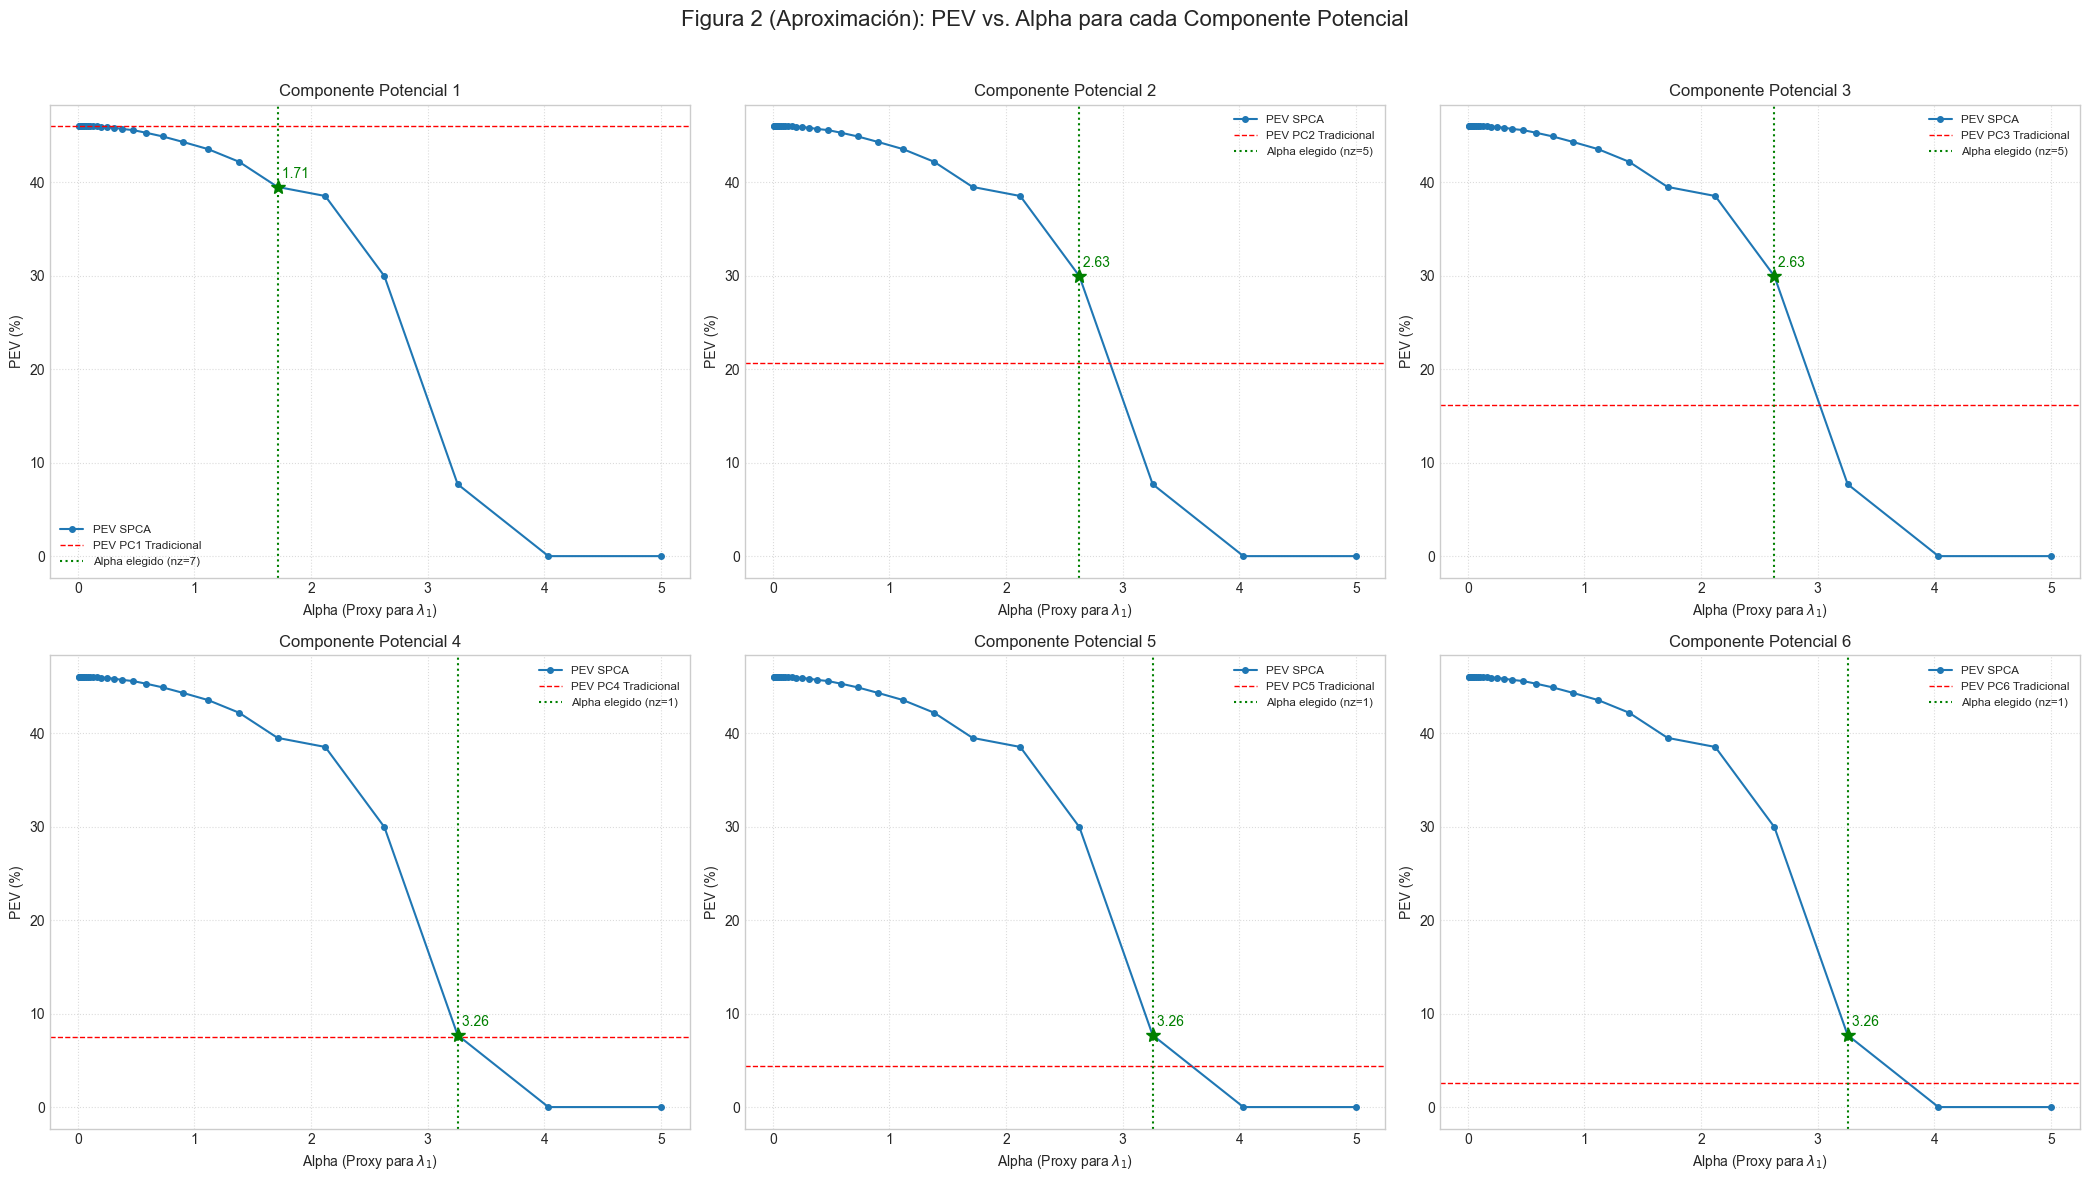

Figuras tipo Figura 2 guardadas en: `./pitprops_figures/pitprops_fig2_approximation.png`


## Construyendo SPCA Final con Alphas Elegidos Individualmente

* Componente 1: Alpha elegido = 1.712 -> PEV = 39.49%, No-ceros = 7

  Componente 2: No se encontró alpha para 4 no-ceros. Eligiendo heurísticamente.


* Componente 2: Alpha elegido = 2.629 -> PEV = 29.95%, No-ceros = 5

  Componente 3: No se encontró alpha para 4 no-ceros. Eligiendo heurísticamente.


* Componente 3: Alpha elegido = 2.629 -> PEV = 29.95%, No-ceros = 5

* Componente 4: Alpha elegido = 3.257 -> PEV = 7.69%, No-ceros = 1

* Componente 5: Alpha elegido = 3.257 -> PEV = 7.69%, No-ceros = 1

* Componente 6: Alpha elegido = 3.257 -> PEV = 7.69%, No-ceros = 1

### Loadings SPCA Final (con Alphas Individuales Elegidos)

SPC1   SPC2   SPC3  SPC4  SPC5  SPC6
topdiam  0.369  0.502  0.502   0.0   0.0   0.0
length   0.392  0.547  0.547   0.0   0.0   0.0
moist    0.000  0.000  0.000   0.0   0.0   0.0
testsg   0.000  0.000  0.000   0.0   0.0   0.0
ovensg   0.000  0.000  0.000   0.0   0.0   0.0
ringtop  0.000  0.000  0.000   0.0   0.0   0.0
ringbut  0.310  0.000  0.000   0.0   0.0   0.0
bowmax   0.389  0.197  0.197   0.0   0.0   0.0
bowdist  0.434  0.513  0.513   0.0   0.0   0.0
whorls   0.460  0.384  0.384   1.0   1.0   1.0
clear    0.000  0.000  0.000   0.0   0.0   0.0
knots   -0.252  0.000  0.000   0.0   0.0   0.0
diaknot  0.000  0.000  0.000   0.0   0.0   0.0


--- Resumen Comparativo Final con Alphas Individuales ---

Componente  Alpha Elegido  No-Ceros (Final)  No-Ceros (Paper)  \
0       SPC1           1.71                 7                 7   
1       SPC2           2.63                 5                 4   
2       SPC3           2.63                 5                 4   
3       SPC4           3.26                 1                 1   
4       SPC5           3.26                 1                 1   
5       SPC6           3.26                 1                 1   

   PEV Individual (Final %)  Varianza Adj. (Final %)  Varianza Adj. (Paper %)  \
0                     39.49                    39.49                     28.0   
1                     29.95                     1.58                     14.0   
2                     29.95                     0.00                     13.3   
3                      7.69                     0.55                      7.4   
4                      7.69                     0.00                      6.8   
5                      7.69                     0.00                      6.2   

   Varianza Adj. Acum. (Final %)  Varianza Adj. Acum. (Paper %)  
0                          39.49                           28.0  
1                          41.07                           42.0  
2                          41.07                           55.3  
3                          41.62                           62.7  
4                          41.62                           69.5  
5                          41.62                           75.7

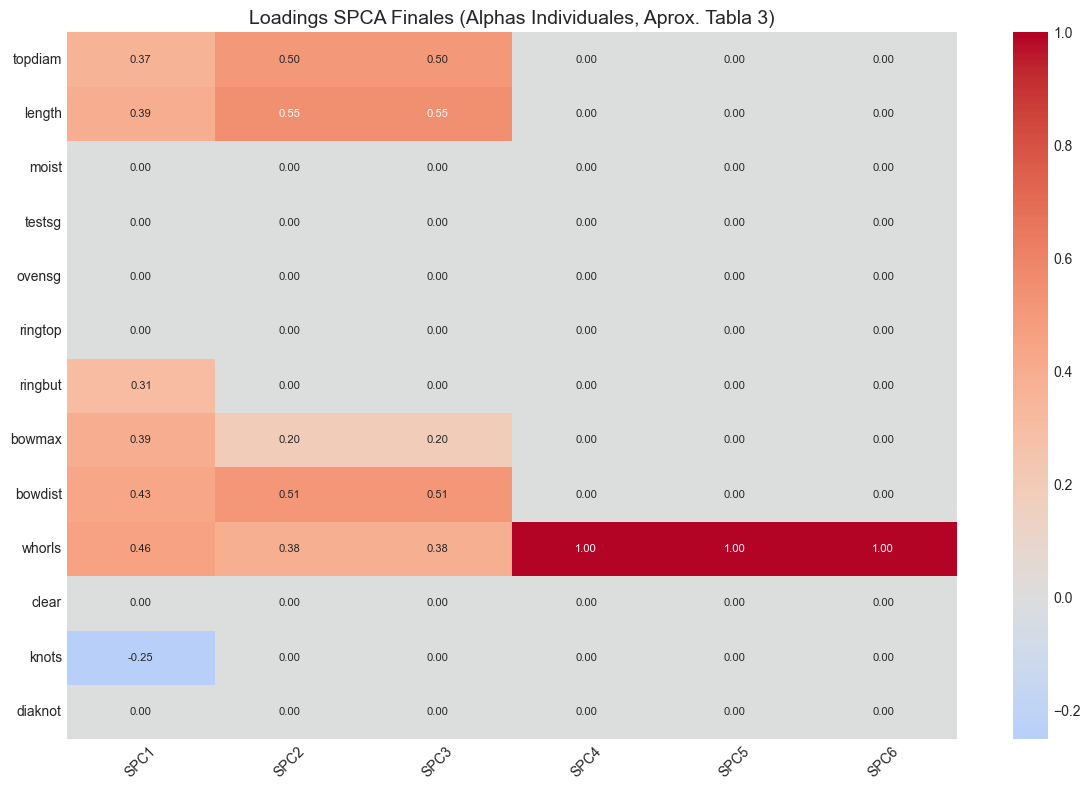

Figura de loadings SPCA finales guardada en: `./pitprops_figures/pitprops_final_spca_loadings.png`

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, SparsePCA
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from IPython.display import display, Markdown
import os

# --- Configuración ---
rda_file_path = "../data/pitprops.rda"
n_components_total = 6 # Vamos a analizar los primeros 6 componentes
random_seed = 42
figure_save_path = "./pitprops_figures/"

if not os.path.exists(figure_save_path):
    os.makedirs(figure_save_path)

# --- Cargar Datos ---
df_pitprops = None
feature_names = []
try:
    result = pyreadr.read_r(rda_file_path)
    if 'pitprops' in result:
        df_pitprops = result['pitprops']
    elif len(result.keys()) == 1:
        df_pitprops = result[list(result.keys())[0]]
    else:
        raise ValueError(f"No se pudo determinar el DataFrame. Objetos: {list(result.keys())}")
    feature_names = list(df_pitprops.columns)
    display(Markdown(f"## Dataset Pitprops Cargado"))
    display(df_pitprops.head())
except Exception as e:
    print(f"Error cargando datos: {e}")
    exit()

# --- Preprocesamiento ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pitprops)
total_variance_original_X = np.sum(np.var(X_scaled, axis=0, ddof=0)) # Varianza total de X normalizada

# --- PCA Tradicional (como referencia para PEV) ---
pca_ref = PCA(n_components=n_components_total, random_state=random_seed)
pca_ref.fit(X_scaled)
pev_pca_reference = pca_ref.explained_variance_ratio_
display(Markdown("### PEV de PCA Tradicional (Referencia para cada componente)"))
for i in range(n_components_total):
    display(Markdown(f"PC{i+1}: {pev_pca_reference[i]*100:.2f}%"))


# --- Generación de Datos para la Figura 2 del Paper ---
# Para cada uno de los primeros 'n_components_total' componentes potenciales:
#   Explorar un rango de 'alpha' (nuestro proxy para lambda_1)
#   Calcular el PEV y el número de no-ceros para un SPCA con n_components=1

# Rango de alphas a probar (ajusta según sea necesario)
# Queremos ver cómo cambia PEV y la dispersión
alphas_to_explore = np.logspace(np.log10(0.01), np.log10(5), 30) # Rango logarítmico para alpha

fig2_data_per_component = []

display(Markdown(f"\n## Generando Datos para Replicar Figura 2"))
display(Markdown(f"Explorando {len(alphas_to_explore)} valores de alpha para cada uno de los {n_components_total} componentes."))

for i_comp in range(n_components_total):
    pevs_for_component = []
    n_nonzeros_for_component = []
    loadings_for_component_alpha = [] # Para inspección si es necesario

    # No vamos a deflacionar los datos secuencialmente aquí, porque la Figura 2
    # parece tratar la búsqueda de lambda_1 para cada PC_k como una aproximación al PC_k original.
    # El paper dice "sequences of sparse approximations TO the first six principal components"
    # No "secuencialmente construidos y ortogonalizados componentes dispersos".
    # Si quisiéramos construir un conjunto ortogonal de SPCA, la deflación sería necesaria.

    print(f"Procesando para el Componente Potencial {i_comp + 1}...")
    for alpha_val in alphas_to_explore:
        # Ajustamos un SPCA con 1 componente sobre los datos originales escalados
        spca_single = SparsePCA(n_components=1,
                                alpha=alpha_val,
                                ridge_alpha=0.01, # Pequeña regularización L2
                                method='lars',
                                max_iter=1000,
                                tol=1e-4,
                                random_state=random_seed)
        try:
            spca_single.fit(X_scaled)
            # Scores: Z_j = X * beta_j
            scores_j = X_scaled @ spca_single.components_.T
            var_j = np.var(scores_j[:, 0], ddof=0)
            pev_j = var_j / total_variance_original_X
            
            num_nonzero = np.sum(np.abs(spca_single.components_[0]) > 1e-5)

            pevs_for_component.append(pev_j)
            n_nonzeros_for_component.append(num_nonzero)
            loadings_for_component_alpha.append(spca_single.components_[0])
        except Exception as e: # Algunas combinaciones de alpha pueden fallar
            print(f"  Advertencia: Falló SPCA para componente {i_comp+1}, alpha={alpha_val:.3f}. Error: {e}")
            pevs_for_component.append(np.nan)
            n_nonzeros_for_component.append(np.nan)
            loadings_for_component_alpha.append(np.full(X_scaled.shape[1], np.nan))


    fig2_data_per_component.append({
        'component_index': i_comp,
        'alphas': alphas_to_explore,
        'pevs': np.array(pevs_for_component),
        'n_nonzeros': np.array(n_nonzeros_for_component),
        'loadings_list': loadings_for_component_alpha
    })

# --- Graficar Figura 2 (PEV vs Alpha) ---
# El paper grafica PEV vs lambda_1. Nosotros graficaremos PEV vs nuestro 'alpha'.
# Y añadiremos el número de no-ceros.

display(Markdown(f"\n## Gráficas tipo Figura 2: PEV vs. Alpha para cada Componente"))
num_cols_plot = 3
num_rows_plot = int(np.ceil(n_components_total / num_cols_plot))
fig_fig2_approx, axes_fig2 = plt.subplots(num_rows_plot, num_cols_plot,
                                         figsize=(7 * num_cols_plot, 6 * num_rows_plot),
                                         sharey=False) # No compartir eje Y para ver mejor rangos
axes_fig2 = axes_fig2.flatten() # Aplanar para fácil indexación

# Valores de alpha_j (lambda_1) que el paper escogió (aproximados de su Figura 2)
# Su lambda_1 no es nuestro alpha. Son para referencia visual de dónde ellos cortaron.
# lambda1_paper_choices = [0.06, 0.16, 0.1, 0.5, 0.5, 0.5] # Estos son lambda_1, no alpha.
# Es difícil mapear directamente estos lambda_1 a nuestros alphas.
# En su lugar, marcaremos el alpha que da un PEV cercano al del PCA original
# y un número de no-ceros cercano a la Tabla 3.

# Para la Tabla 3 del paper, los #no-ceros son: [7, 4, 4, 1, 1, 1]
# Y los PEV ajustados son [28.0, 14.0, 13.3, 7.4, 6.8, 6.2] (en %)
target_non_zeros_paper = [7, 4, 4, 1, 1, 1]
target_pev_paper_percent = [28.0, 14.0, 13.3, 7.4, 6.8, 6.2]

for i_comp in range(n_components_total):
    ax = axes_fig2[i_comp]
    data = fig2_data_per_component[i_comp]
    
    valid_indices = ~np.isnan(data['pevs']) # Usar solo los puntos donde el cálculo fue exitoso
    alphas_plot = data['alphas'][valid_indices]
    pevs_plot = data['pevs'][valid_indices] * 100 # Convertir a porcentaje
    n_nonzeros_plot = data['n_nonzeros'][valid_indices]

    if len(alphas_plot) == 0:
        ax.text(0.5, 0.5, "Cálculo fallido", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f"Componente Potencial {i_comp + 1}")
        continue

    # Graficar PEV vs Alpha
    ax.plot(alphas_plot, pevs_plot, marker='o', linestyle='-', markersize=4, label='PEV SPCA')
    
    # Añadir línea horizontal para el PEV del PCA tradicional como referencia
    ax.axhline(pev_pca_reference[i_comp] * 100, color='red', linestyle='--', linewidth=1, label=f'PEV PC{i_comp+1} Tradicional')

    # Encontrar el alpha que más se acerca al número de no-ceros objetivo
    # O un alpha que de un PEV cercano al del PCA.
    # El paper dice: "lambda1 [...] chosen [...] such that each sparse approximation
    # explained almost the same amount of variance as the ordinary PC did."
    # Y luego mencionan los no-ceros de la Tabla 3.
    
    # Vamos a intentar encontrar un alpha que dé el target_non_zeros_paper
    chosen_alpha_idx = np.argmin(np.abs(n_nonzeros_plot - target_non_zeros_paper[i_comp]))
    if len(n_nonzeros_plot) > 0 and chosen_alpha_idx < len(alphas_plot):
         chosen_alpha_val = alphas_plot[chosen_alpha_idx]
         chosen_pev_val = pevs_plot[chosen_alpha_idx]
         chosen_nz_val = n_nonzeros_plot[chosen_alpha_idx]
         ax.axvline(chosen_alpha_val, color='green', linestyle=':', linewidth=1.5,
                    label=f'Alpha elegido (nz={chosen_nz_val:.0f})')
         ax.plot(chosen_alpha_val, chosen_pev_val, 'g*', markersize=10)
         ax.text(chosen_alpha_val, chosen_pev_val + (ax.get_ylim()[1]*0.02), f' {chosen_alpha_val:.2f}', color='green', ha='left')


    ax.set_xlabel("Alpha (Proxy para $\lambda_1$)")
    ax.set_ylabel("PEV (%)")
    ax.set_title(f"Componente Potencial {i_comp + 1}")
    ax.legend(fontsize='small')
    ax.grid(True, linestyle=':', alpha=0.7)

    # Anotar número de no-ceros en algunos puntos
    #for j_point in range(0, len(alphas_plot), max(1, len(alphas_plot)//5)): # Anotar algunos puntos
    #    ax.text(alphas_plot[j_point], pevs_plot[j_point], f"{n_nonzeros_plot[j_point]:.0f}",
    #            fontsize=8, ha='center', va='bottom')

# Ocultar ejes no utilizados si n_components_total no es múltiplo de num_cols_plot
for i_ax in range(n_components_total, num_rows_plot * num_cols_plot):
    axes_fig2[i_ax].set_visible(False)

fig_fig2_approx.suptitle("Figura 2 (Aproximación): PEV vs. Alpha para cada Componente Potencial", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig2_path = os.path.join(figure_save_path, "pitprops_fig2_approximation.png")
plt.savefig(fig2_path, dpi=300)
plt.show()
display(Markdown(f"Figuras tipo Figura 2 guardadas en: `{fig2_path}`"))

# --- Construcción Final de SPCA con Alphas Elegidos y Comparación ---
# Basado en las gráficas anteriores, ahora DEBERÍAS elegir un 'alpha_j' para cada componente j.
# Estos son los valores de alpha que marcamos con la línea verde en las gráficas.
# Si la línea verde no es ideal, tendrás que inspeccionar `fig2_data_per_component`
# y escoger los alphas manualmente.

chosen_alphas_final = []
final_spca_loadings_list = []
final_spca_scores_list = []
final_spca_pev_list = []
final_spca_non_zeros_list = []

display(Markdown(f"\n## Construyendo SPCA Final con Alphas Elegidos Individualmente"))

for i_comp in range(n_components_total):
    data = fig2_data_per_component[i_comp]
    valid_indices = ~np.isnan(data['pevs'])
    alphas_plot = data['alphas'][valid_indices]
    n_nonzeros_plot = data['n_nonzeros'][valid_indices]
    loadings_list_plot = [data['loadings_list'][i] for i in np.where(valid_indices)[0]]


    if len(alphas_plot) == 0: # Si fallaron todos los alphas para este componente
        chosen_alpha_final_j = alphas_to_explore[len(alphas_to_explore)//2] # un valor por defecto
        print(f"Advertencia: No se pudo determinar un alpha óptimo para el componente {i_comp+1}, usando {chosen_alpha_final_j:.2f}")
    else:
        # Intenta encontrar el alpha que da el número de no-ceros deseado
        desired_nz = target_non_zeros_paper[i_comp]
        idx_matching_nz = np.where(n_nonzeros_plot == desired_nz)[0]
        
        if len(idx_matching_nz) > 0:
            # Si hay múltiples alphas con el mismo #nz, elige el que da mayor PEV
            best_idx_for_nz = -1
            max_pev_for_nz = -1
            for idx_cand in idx_matching_nz:
                pev_cand = data['pevs'][valid_indices][idx_cand]
                if pev_cand > max_pev_for_nz:
                    max_pev_for_nz = pev_cand
                    best_idx_for_nz = idx_cand
            chosen_alpha_final_j = alphas_plot[best_idx_for_nz]
            chosen_loading_j = loadings_list_plot[best_idx_for_nz]
            chosen_pev_j = data['pevs'][valid_indices][best_idx_for_nz]
            chosen_nz_j = n_nonzeros_plot[best_idx_for_nz]

        else:
            # Si no se encuentra el #nz exacto, elige el más cercano
            # O el que maximiza PEV manteniendo nz razonable (esto es heurístico)
            # Por simplicidad, tomaremos el alpha que da el PEV más cercano al del PCA
            # entre los que tienen un número de no-ceros "razonable"
            print(f"  Componente {i_comp+1}: No se encontró alpha para {desired_nz} no-ceros. Eligiendo heurísticamente.")
            # Aquí se podría implementar una lógica más sofisticada o tomar el de la línea verde
            chosen_alpha_idx = np.argmin(np.abs(n_nonzeros_plot - target_non_zeros_paper[i_comp]))
            chosen_alpha_final_j = alphas_plot[chosen_alpha_idx]
            chosen_loading_j = loadings_list_plot[chosen_alpha_idx]
            chosen_pev_j = data['pevs'][valid_indices][chosen_alpha_idx]
            chosen_nz_j = n_nonzeros_plot[chosen_alpha_idx]

    chosen_alphas_final.append(chosen_alpha_final_j)
    
    # Re-ajustar SPCA con el alpha elegido para asegurar consistencia (o tomar el loading ya calculado)
    # spca_final_j = SparsePCA(n_components=1, alpha=chosen_alpha_final_j, ridge_alpha=0.01, method='lars', random_state=random_seed)
    # spca_final_j.fit(X_scaled) # Podríamos necesitar deflacionar aquí para ortogonalidad estricta
    # final_spca_loadings_list.append(spca_final_j.components_[0])
    # scores_final_j = X_scaled @ spca_final_j.components_.T
    # final_spca_scores_list.append(scores_final_j[:,0])
    # final_spca_pev_list.append(np.var(scores_final_j[:,0], ddof=0) / total_variance_original_X)
    # final_spca_non_zeros_list.append(np.sum(np.abs(spca_final_j.components_[0]) > 1e-5))
    
    final_spca_loadings_list.append(chosen_loading_j) # Usar el loading ya calculado
    scores_final_j = X_scaled @ chosen_loading_j.T
    final_spca_scores_list.append(scores_final_j)
    final_spca_pev_list.append(chosen_pev_j)
    final_spca_non_zeros_list.append(chosen_nz_j)


    display(Markdown(f"* Componente {i_comp+1}: Alpha elegido = {chosen_alpha_final_j:.3f} -> "
                     f"PEV = {chosen_pev_j*100:.2f}%, No-ceros = {chosen_nz_j:.0f}"))


# Ensamblar la matriz final de loadings y scores
B_final_spca = np.array(final_spca_loadings_list).T
Z_final_spca = np.array(final_spca_scores_list).T

# Normalizar los loadings B_final_spca (aunque SparsePCA ya los da normalizados si n_features > n_samples)
# for j_col in range(B_final_spca.shape[1]):
# norm_j = np.linalg.norm(B_final_spca[:, j_col])
# if norm_j > 1e-6:
# B_final_spca[:, j_col] /= norm_j

df_final_spca_loadings = pd.DataFrame(B_final_spca,
                                      columns=[f'SPC{i+1}' for i in range(n_components_total)],
                                      index=feature_names)

display(Markdown("### Loadings SPCA Final (con Alphas Individuales Elegidos)"))
display(df_final_spca_loadings.round(3))

# Calcular Varianza Ajustada para este conjunto final de componentes
# ¡Importante! Estos componentes no están garantizados de ser ortogonales porque se construyeron
# "independientemente" (o sobre X_scaled cada vez).
# La varianza ajustada es crucial aquí.
spca_final_explained_adj_ratio, spca_final_variances_adj_num = calculate_adjusted_explained_variance(Z_final_spca, total_variance_original_X)

final_comparison_df = pd.DataFrame({
    'Componente': [f'SPC{i+1}' for i in range(n_components_total)],
    'Alpha Elegido': chosen_alphas_final,
    'No-Ceros (Final)': [int(nz) for nz in final_spca_non_zeros_list],
    'No-Ceros (Paper)': target_non_zeros_paper,
    'PEV Individual (Final %)': np.array(final_spca_pev_list) * 100,
    'Varianza Adj. (Final %)': spca_final_explained_adj_ratio * 100,
    'Varianza Adj. (Paper %)': target_pev_paper_percent
})
final_comparison_df['Varianza Adj. Acum. (Final %)'] = np.cumsum(final_comparison_df['Varianza Adj. (Final %)'])
final_comparison_df['Varianza Adj. Acum. (Paper %)'] = np.cumsum(final_comparison_df['Varianza Adj. (Paper %)'])

display(Markdown(f"\n--- Resumen Comparativo Final con Alphas Individuales ---"))
display(final_comparison_df.round(2))


# Heatmap de los loadings finales de SPCA
fig_final_loadings, ax_final_loadings = plt.subplots(figsize=(12, 8))
sns.heatmap(df_final_spca_loadings.round(3), annot=True, cmap="coolwarm", fmt=".2f", center=0, ax=ax_final_loadings, cbar=True, annot_kws={"size": 8})
ax_final_loadings.set_title(f"Loadings SPCA Finales (Alphas Individuales, Aprox. Tabla 3)", fontsize=14)
ax_final_loadings.tick_params(axis='x', rotation=45, labelsize=10)
ax_final_loadings.tick_params(axis='y', rotation=0, labelsize=10)
plt.tight_layout()
final_loadings_path = os.path.join(figure_save_path, "pitprops_final_spca_loadings.png")
plt.savefig(final_loadings_path, dpi=300)
plt.show()
display(Markdown(f"Figura de loadings SPCA finales guardada en: `{final_loadings_path}`"))

## Car data Cartas de control

### $T^2$

--- INICIO ANÁLISIS DE CONTROL MULTIVARIADO ---
--- Cargando y Preprocesando Datos: cars.csv ---
Datos cargados: 111 filas. Numéricas: 11 cols. Post-NaN: 111 filas.
División datos: Fase I N=77, Fase II N=34

--- FASE I: Establecimiento de Parámetros ---
  Test Normalidad (Fase I-Original N=77): HZ=1.112, p-val=0.000 (Normal: False)

Fase I - Iteración Limpieza 1/25 (N Y_clean: 77)
  Test Normalidad (Iter 1-AntesElim N=77): HZ=1.112, p-val=0.000 (Normal: False)
  Umbral empírico P97.5 (Iter 1): 25.643


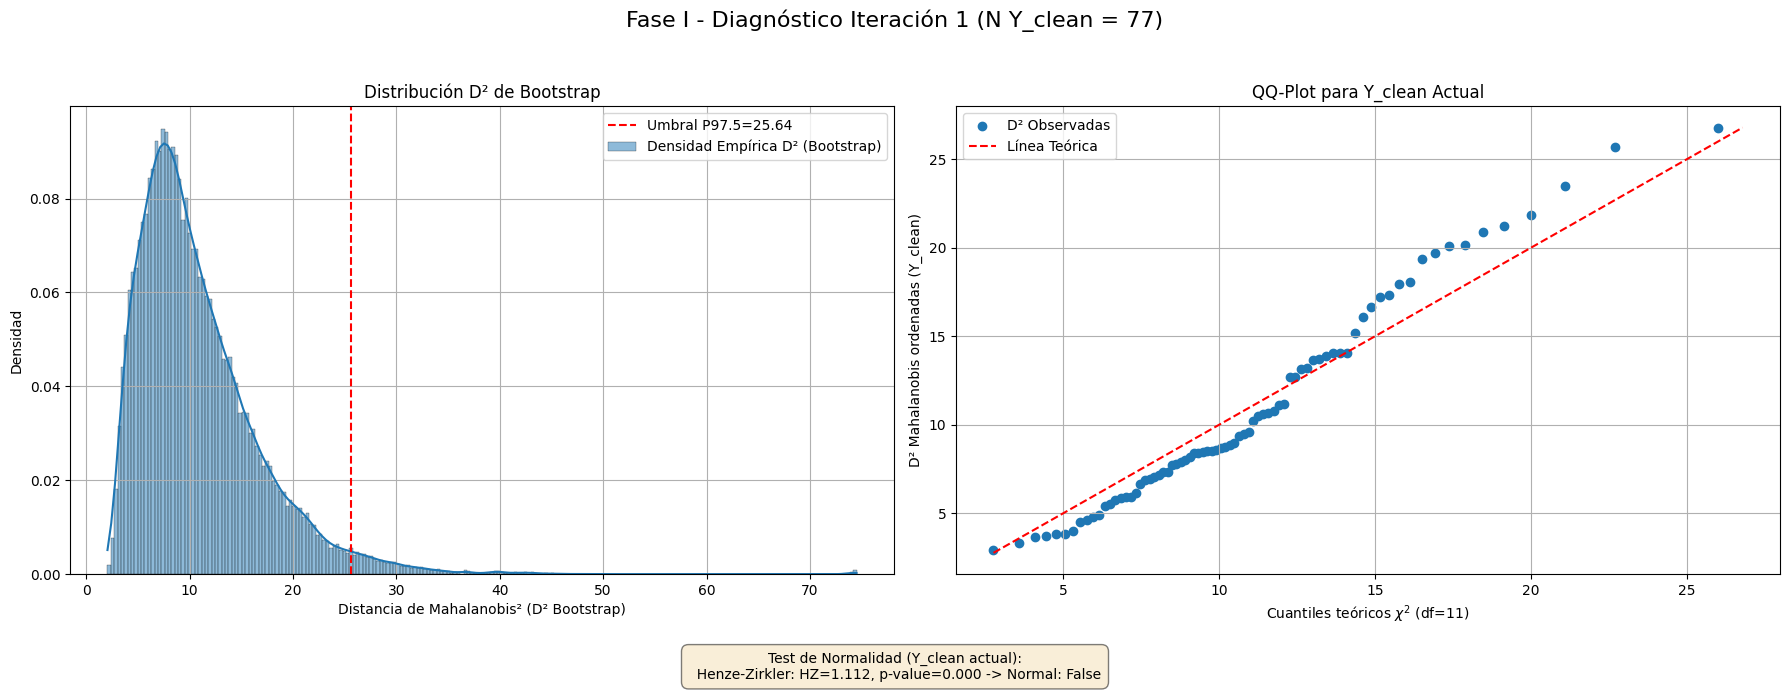

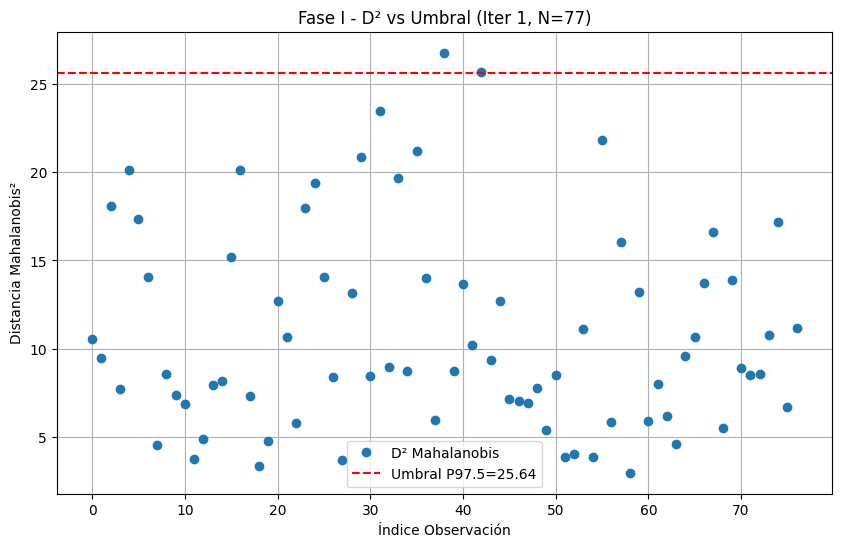

  Outlier detectado: Índice original 38 (D² = 26.79). Eliminando.

Fase I - Iteración Limpieza 2/25 (N Y_clean: 76)
  Test Normalidad (Iter 2-AntesElim N=76): HZ=1.104, p-val=0.000 (Normal: False)
  Umbral empírico P97.5 (Iter 2): 24.937


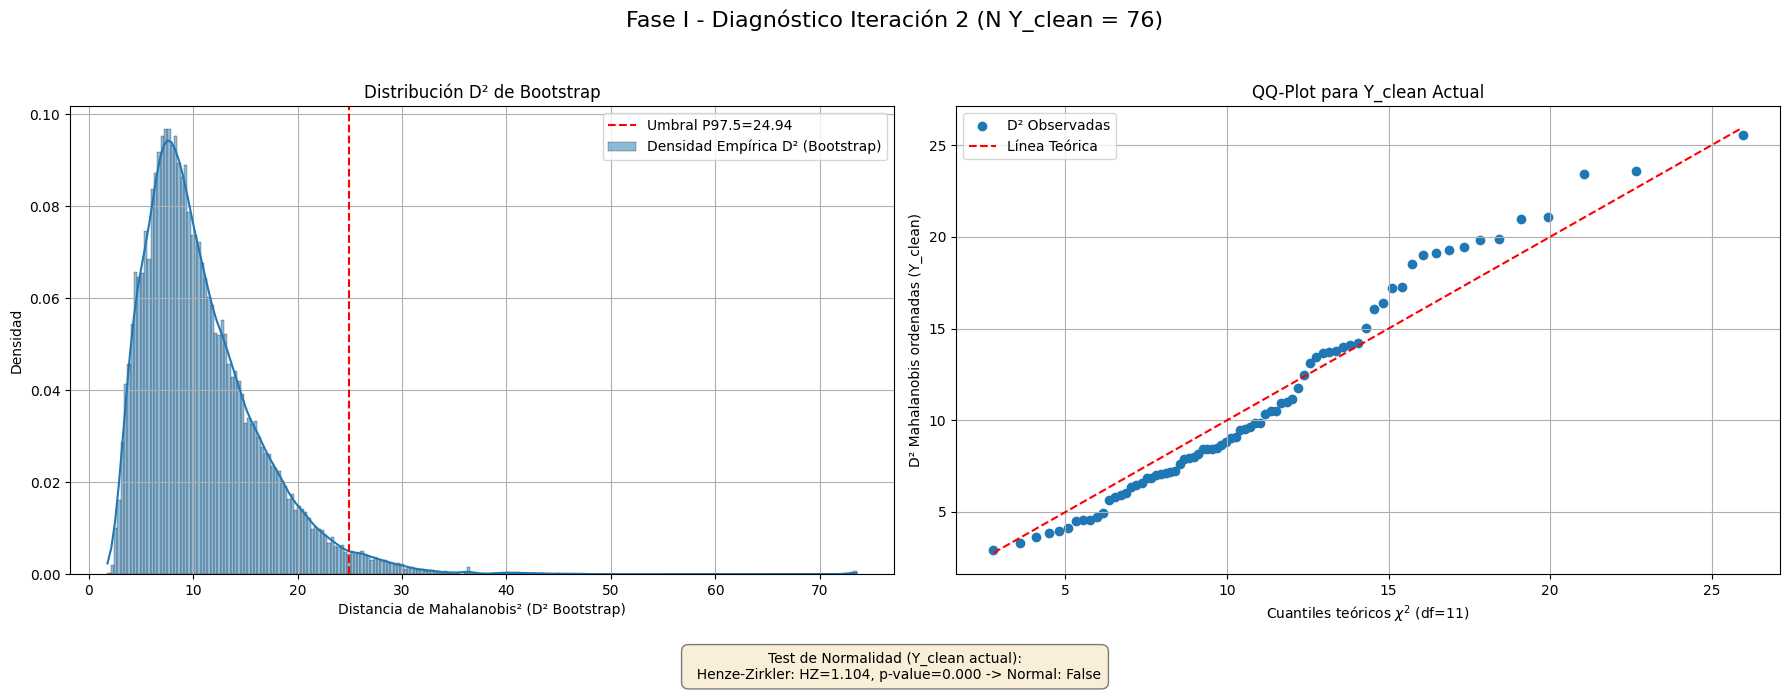

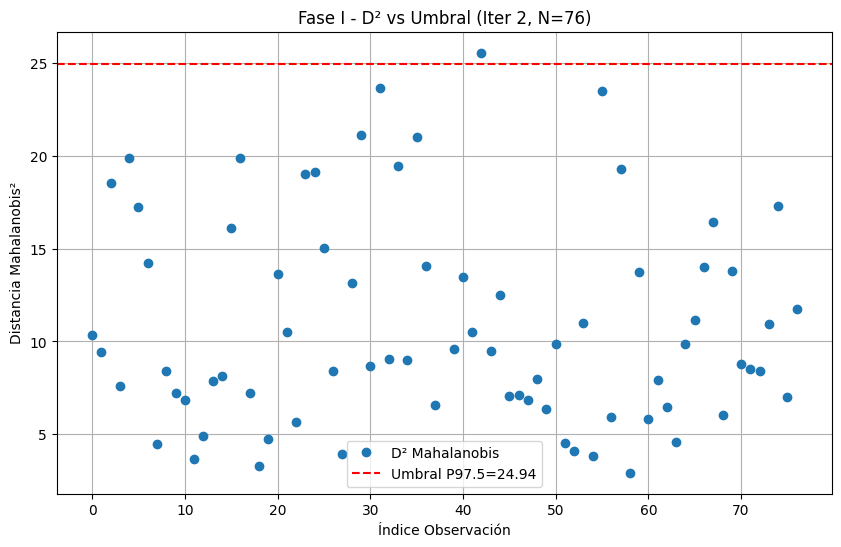

  Outlier detectado: Índice original 42 (D² = 25.53). Eliminando.

Fase I - Iteración Limpieza 3/25 (N Y_clean: 75)
  Test Normalidad (Iter 3-AntesElim N=75): HZ=1.095, p-val=0.000 (Normal: False)
  Umbral empírico P97.5 (Iter 3): 24.405


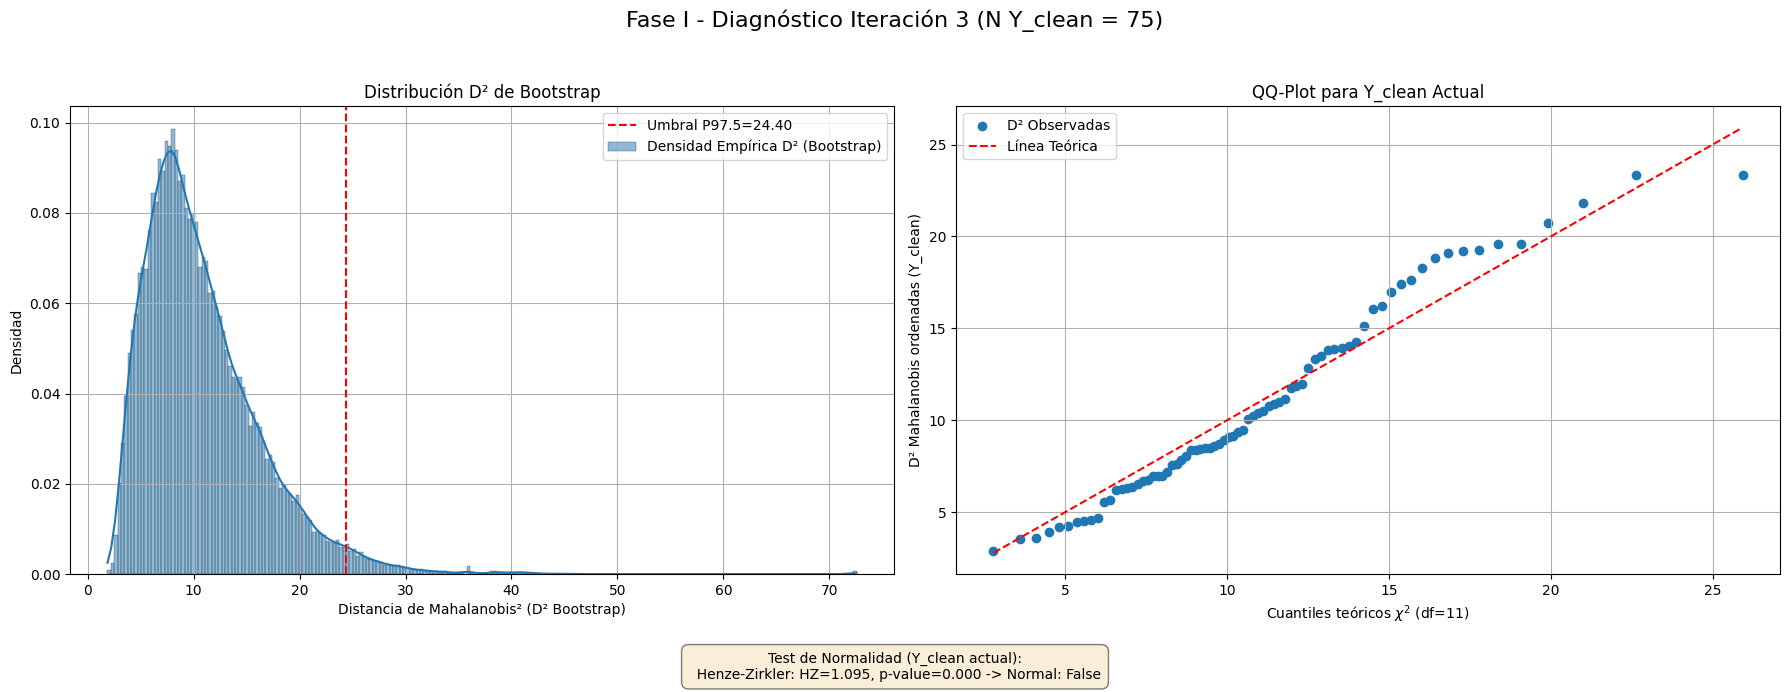

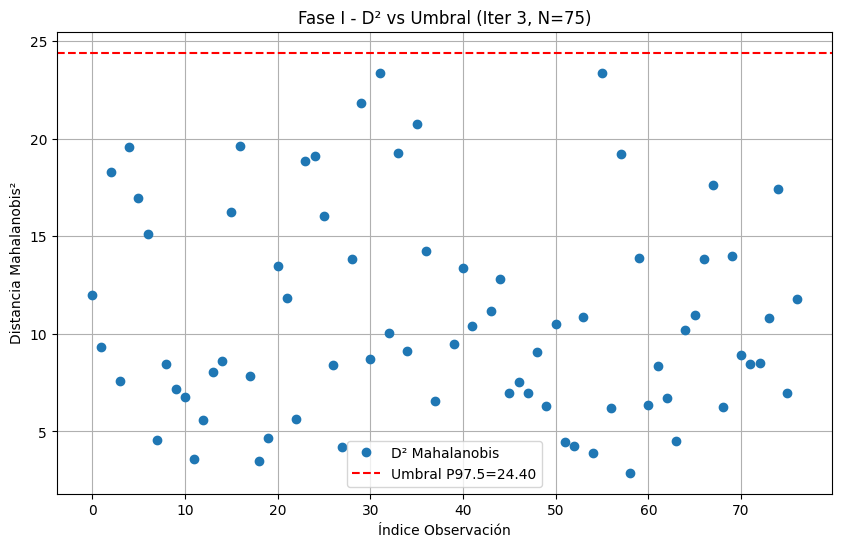

  No se detectaron outliers. Fin limpieza.

Fase I - Finalizada. Índices originales eliminados: [38, np.int64(42)]
Tamaño final Y_clean: (75, 11)
  Test Normalidad (Y_clean-Final N=75): HZ=1.095, p-val=0.000 (Normal: False)
Calculando umbral para Fase II (Bootstrap sobre Y_clean final N=75)...
Umbral P97.5 para Fase II: 24.225

--- FASE II: Monitoreo de Nuevos Datos ---
Datos Fase II N=34


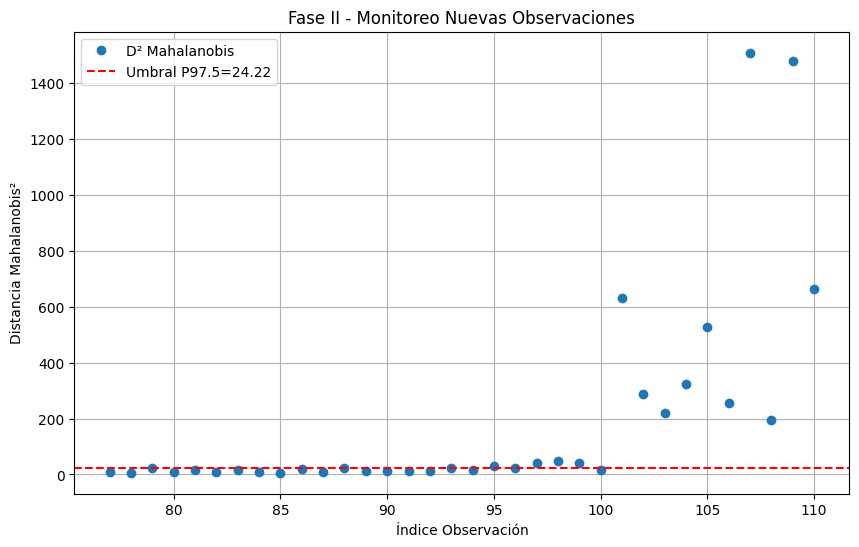

Fase II: 14 de 34 observaciones fuera de control (umbral=24.225).

--- ANÁLISIS COMPLETADO ---


In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

# --- Configuración Global ---
CONFIG = {
    "data_file_path": "../data/cars.csv",
    "train_ratio": 0.7,
    "n_resamples_bootstrap": 1000,
    "target_percentile": 97.5,
    "max_iterations_phase1": 25,
    "min_obs_factor_for_bootstrap": 2,
    "min_obs_plus_for_normality_test": 5
}

# --- Funciones de Cálculo y Análisis Estadístico ---
def calculate_mahalanobis_squared(data_df, mean_vec=None, inv_cov_matrix=None):
    if not isinstance(data_df, pd.DataFrame) or data_df.empty or data_df.shape[1] == 0:
        return np.array([])
    data_values = data_df.values
    num_obs, num_vars = data_values.shape
    if mean_vec is None: mean_vec = np.mean(data_values, axis=0)
    if inv_cov_matrix is None:
        cov_matrix = np.cov(data_values.T)
        if num_obs <= num_vars or np.linalg.matrix_rank(cov_matrix) < num_vars:
            inv_cov_matrix = np.linalg.pinv(cov_matrix)
        elif np.linalg.cond(cov_matrix) < 1/np.finfo(cov_matrix.dtype).eps:
            inv_cov_matrix = np.linalg.inv(cov_matrix)
        else:
            inv_cov_matrix = np.linalg.pinv(cov_matrix)
    diffs = data_values - mean_vec
    if diffs.ndim == 1: diffs = diffs.reshape(1, -1)
    try:
        d_squared = np.diag(diffs @ inv_cov_matrix @ diffs.T)
    except ValueError: return np.array([])
    return d_squared

def get_empirical_threshold_and_distribution(data_df, n_resamples, percentile, num_features):
    if not isinstance(data_df, pd.DataFrame) or data_df.empty: return np.inf, []
    num_obs = data_df.shape[0]
    if num_obs <= num_features or num_features == 0: return np.inf, []
    all_bootstrap_d_squared = []
    data_values = data_df.values
    for _ in range(n_resamples):
        indices = np.random.choice(num_obs, size=num_obs, replace=True)
        bootstrap_sample_df = data_df.iloc[indices]
        if bootstrap_sample_df.shape[0] <= num_features or len(np.unique(indices)) <= num_features: continue
        d_squared_boot = calculate_mahalanobis_squared(bootstrap_sample_df)
        if d_squared_boot.size > 0: all_bootstrap_d_squared.extend(d_squared_boot)
    if not all_bootstrap_d_squared: return np.inf, []
    return np.percentile(all_bootstrap_d_squared, percentile), all_bootstrap_d_squared

def get_multivariate_normality_test_results(data_df, num_features, title_suffix_for_print=""):
    """Calcula y devuelve los resultados del test de normalidad, también los imprime."""
    if data_df.empty or data_df.shape[0] <= num_features or num_features == 0:
        return None
    
    normality_results_obj = None
    try:
        min_samples_needed = num_features + CONFIG["min_obs_plus_for_normality_test"]
        if data_df.shape[0] > min_samples_needed:
            normality_results_obj = pg.multivariate_normality(data_df, alpha=0.05)
            
            pval = normality_results_obj.pval
            is_normal = normality_results_obj.normal
            hz_stat = normality_results_obj.hz
            
            print(f"  Test Normalidad ({title_suffix_for_print} N={len(data_df)}): HZ={hz_stat:.3f}, p-val={pval:.3f} (Normal: {is_normal})")
        # else: print(f"  Pocas muestras ({data_df.shape[0]}) para test normalidad robusto ({title_suffix_for_print}). Req > {min_samples_needed}.")
    except AttributeError as ae:
        print(f"  Test Normalidad ({title_suffix_for_print} N={len(data_df)}): No se pudo obtener resultado del test o error de atributo: {ae}")
        normality_results_obj = None
    except Exception as e:
        print(f"  Error test normalidad ({title_suffix_for_print} N={len(data_df)}): {e}")
        normality_results_obj = None
    return normality_results_obj


# --- Funciones de Visualización ---
def plot_mahalanobis_distances_vs_threshold(distances_squared, threshold, title, data_indices=None, percentile_val=97.5):
    plt.figure(figsize=(10, 6))
    if data_indices is None or len(data_indices) != len(distances_squared):
        data_indices = np.arange(len(distances_squared))
    plt.plot(data_indices, distances_squared, marker='o', linestyle='', label='D² Mahalanobis')
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Umbral P{percentile_val}={threshold:.2f}')
    plt.xlabel("Índice Observación")
    plt.ylabel("Distancia Mahalanobis²")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_phase1_iteration_diagnostics(
    d_squared_Y_clean, all_d_sq_bootstrap, current_empirical_threshold,
    normality_results_obj, num_features, iteration_num, N_current, target_percentile
):
    """Crea una figura combinada para la iteración de Fase I."""
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle(f"Fase I - Diagnóstico Iteración {iteration_num} (N Y_clean = {N_current})", fontsize=16)

    ax_left = axes[0]
    if all_d_sq_bootstrap:
        sns.histplot(all_d_sq_bootstrap, kde=True, stat="density", ax=ax_left, label="Densidad Empírica D² (Bootstrap)")
        ax_left.axhline(y=0, color='black', linewidth=0.5)
        ax_left.axvline(current_empirical_threshold, color='red', linestyle='--',
                        label=f'Umbral P{target_percentile}={current_empirical_threshold:.2f}')
        ax_left.legend()
    ax_left.set_xlabel("Distancia de Mahalanobis² (D² Bootstrap)")
    ax_left.set_ylabel("Densidad")
    ax_left.set_title("Distribución D² de Bootstrap")
    ax_left.grid(True)

    ax_right = axes[1]
    if d_squared_Y_clean is not None and len(d_squared_Y_clean) > 0 and num_features > 0:
        sorted_d_squared = np.sort(d_squared_Y_clean)
        probs = (np.arange(1, len(sorted_d_squared) + 1) - 0.5) / len(sorted_d_squared)
        probs = np.clip(probs, 1e-9, 1 - 1e-9)
        theoretical_quantiles = chi2.ppf(probs, df=num_features)
        
        ax_right.scatter(theoretical_quantiles, sorted_d_squared, label="D² Observadas")
        min_val, max_val = 0, 1
        if len(theoretical_quantiles) > 0 and len(sorted_d_squared) > 0:
            valid_theoretical = theoretical_quantiles[np.isfinite(theoretical_quantiles)]
            valid_sorted_d = sorted_d_squared[np.isfinite(sorted_d_squared)]
            if len(valid_theoretical) > 0 and len(valid_sorted_d) > 0:
                min_val = min(valid_theoretical.min(), valid_sorted_d.min())
                max_val = max(valid_theoretical.max(), valid_sorted_d.max())
            if max_val <= min_val: max_val = min_val + 1
        ax_right.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Línea Teórica")
        ax_right.legend()
    ax_right.set_xlabel(rf"Cuantiles teóricos $\chi^2$ (df={num_features})") # Uso de raw string
    ax_right.set_ylabel("D² Mahalanobis ordenadas (Y_clean)")
    ax_right.set_title(f"QQ-Plot para Y_clean Actual")
    ax_right.grid(True)

    normality_text = "Test de Normalidad (Y_clean actual):\n"
    if normality_results_obj is not None:
        try:
            pval = normality_results_obj.pval
            is_normal = normality_results_obj.normal
            hz_stat = normality_results_obj.hz
            normality_text += f"  Henze-Zirkler: HZ={hz_stat:.3f}, p-value={pval:.3f} -> Normal: {is_normal}"
        except AttributeError:
             normality_text += "  Resultados del test no tienen los atributos esperados (pval, normal, hz)."
    else:
        normality_text += "  No se pudo realizar o resultados no disponibles."
    
    fig.text(0.5, 0.02, normality_text, ha='center', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    plt.tight_layout(rect=[0, 0.08, 1, 0.95])
    plt.show()


# --- Funciones de Lógica Principal del Proceso ---
def load_and_preprocess_data(file_path):
    print(f"--- Cargando y Preprocesando Datos: {file_path.split('/')[-1]} ---")
    try: df_raw = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: Archivo no encontrado en '{file_path}'. Saliendo.")
        return None, []
    df_numeric = df_raw.select_dtypes(include=np.number)
    if df_numeric.empty:
        print("No se encontraron columnas numéricas. Saliendo.")
        return None, []
    features = df_numeric.columns.tolist()
    df_processed = df_numeric.dropna().copy()
    print(f"Datos cargados: {len(df_raw)} filas. Numéricas: {len(features)} cols. Post-NaN: {len(df_processed)} filas.")
    if len(df_processed) < 2 * len(features):
        print(f"Datos insuficientes post-NaN ({len(df_processed)} filas) para {len(features)} variables. Saliendo.")
        return None, []
    return df_processed, features

def split_data_for_phases(df_processed, train_ratio, num_features):
    n_total = len(df_processed)
    n_fase1 = int(n_total * train_ratio)
    n_fase2 = n_total - n_fase1
    if n_fase1 <= num_features or n_fase2 <= 0 :
        print(f"División Fase I/II no ideal (N1:{n_fase1}, N2:{n_fase2}, Feats:{num_features}). Usando todos para Fase I.")
        data_fase1 = df_processed.copy()
        data_fase2 = pd.DataFrame(columns=df_processed.columns)
    else:
        data_fase1 = df_processed.iloc[:n_fase1].copy()
        data_fase2 = df_processed.iloc[n_fase1:].copy()
    print(f"División datos: Fase I N={len(data_fase1)}, Fase II N={len(data_fase2)}")
    return data_fase1, data_fase2

def perform_phase1_iterations(initial_data_fase1, num_features, config):
    print("\n--- FASE I: Establecimiento de Parámetros ---")
    if initial_data_fase1.shape[0] <= num_features:
        print(f"Datos insuficientes en Fase I ({initial_data_fase1.shape[0]} filas) para {num_features} feats.")
        return pd.DataFrame(columns=initial_data_fase1.columns), None, None, np.inf

    _ = get_multivariate_normality_test_results(initial_data_fase1, num_features, "Fase I-Original")
    
    Y_clean = initial_data_fase1.copy()
    removed_indices_log = []

    for i in range(config["max_iterations_phase1"]):
        print(f"\nFase I - Iteración Limpieza {i+1}/{config['max_iterations_phase1']} (N Y_clean: {Y_clean.shape[0]})")
        n_current = Y_clean.shape[0]
        if n_current <= num_features:
            print(f"  Datos insuficientes (N={n_current} <= Feats={num_features}). Fin limpieza.")
            break
        
        normality_results_obj_iter = get_multivariate_normality_test_results(Y_clean, num_features, f"Iter {i+1}-AntesElim")

        d_squared_for_comparison = calculate_mahalanobis_squared(Y_clean)
        if d_squared_for_comparison.size == 0:
            print(f"  Error calculando D² para comparación. Fin limpieza.")
            break
        
        if n_current <= num_features * config["min_obs_factor_for_bootstrap"]:
            print(f"  Pocos datos (N={n_current}) para bootstrap fiable. Fin limpieza.")
            break
            
        current_empirical_threshold, all_d_sq_bootstrap = get_empirical_threshold_and_distribution(
            Y_clean, config["n_resamples_bootstrap"], config["target_percentile"], num_features
        )
        if not all_d_sq_bootstrap or current_empirical_threshold == np.inf:
            print(f"  Error generando umbral bootstrap. Fin limpieza.")
            break
        print(f"  Umbral empírico P{config['target_percentile']} (Iter {i+1}): {current_empirical_threshold:.3f}")

        plot_phase1_iteration_diagnostics(
            d_squared_Y_clean=d_squared_for_comparison,
            all_d_sq_bootstrap=all_d_sq_bootstrap,
            current_empirical_threshold=current_empirical_threshold,
            normality_results_obj=normality_results_obj_iter, # Pasando el objeto HZResults
            num_features=num_features,
            iteration_num=i + 1,
            N_current=n_current,
            target_percentile=config['target_percentile']
        )
        
        plot_mahalanobis_distances_vs_threshold(d_squared_for_comparison, current_empirical_threshold,
            f"Fase I - D² vs Umbral (Iter {i+1}, N={n_current})", data_indices=Y_clean.index, percentile_val=config['target_percentile'])

        outliers_mask = d_squared_for_comparison > current_empirical_threshold
        if not np.any(outliers_mask):
            print(f"  No se detectaron outliers. Fin limpieza.")
            break
        else:
            outlier_indices_in_Y_clean = np.where(outliers_mask)[0]
            d_squared_of_outliers = d_squared_for_comparison[outliers_mask]
            idx_max_d_squared_local = np.argmax(d_squared_of_outliers)
            idx_in_Y_clean_to_remove = outlier_indices_in_Y_clean[idx_max_d_squared_local]
            original_index_to_remove = Y_clean.index[idx_in_Y_clean_to_remove]
            print(f"  Outlier detectado: Índice original {original_index_to_remove} (D² = {d_squared_for_comparison[idx_in_Y_clean_to_remove]:.2f}). Eliminando.")
            Y_clean = Y_clean.drop(index=original_index_to_remove)
            removed_indices_log.append(original_index_to_remove)
    else: 
        print(f"Se alcanzó el máximo de iteraciones ({config['max_iterations_phase1']}).")
        if 'd_squared_for_comparison' in locals() and 'current_empirical_threshold' in locals() and \
            d_squared_for_comparison.size > 0 and current_empirical_threshold != np.inf:
            if np.any(d_squared_for_comparison > current_empirical_threshold):
                print("Advertencia: Podrían quedar outliers.")

    print(f"\nFase I - Finalizada. Índices originales eliminados: {removed_indices_log if removed_indices_log else 'Ninguno'}")
    print(f"Tamaño final Y_clean: {Y_clean.shape}")

    if Y_clean.empty or Y_clean.shape[0] <= num_features:
        print("Y_clean final sin datos suficientes para Fase II.")
        return Y_clean, None, None, np.inf

    _ = get_multivariate_normality_test_results(Y_clean, num_features, "Y_clean-Final")
    
    mean_Y_clean_final = np.mean(Y_clean.values, axis=0)
    cov_Y_clean_final = np.cov(Y_clean.values.T)
    inv_cov_Y_clean_final = None
    if Y_clean.shape[0] <= num_features or np.linalg.matrix_rank(cov_Y_clean_final) < num_features:
        inv_cov_Y_clean_final = np.linalg.pinv(cov_Y_clean_final)
    elif np.linalg.cond(cov_Y_clean_final) < 1/np.finfo(cov_Y_clean_final.dtype).eps:
        inv_cov_Y_clean_final = np.linalg.inv(cov_Y_clean_final)
    else:
        inv_cov_Y_clean_final = np.linalg.pinv(cov_Y_clean_final)

    print(f"Calculando umbral para Fase II (Bootstrap sobre Y_clean final N={len(Y_clean)})...")
    final_threshold_fase2, all_d_sq_final_bootstrap = get_empirical_threshold_and_distribution(
        Y_clean, config["n_resamples_bootstrap"], config["target_percentile"], num_features
    )
    if not all_d_sq_final_bootstrap or final_threshold_fase2 == np.inf:
        print("Error: No se pudo generar umbral para Fase II. Usando umbral infinito.")
        final_threshold_fase2 = np.inf
    else:
        print(f"Umbral P{config['target_percentile']} para Fase II: {final_threshold_fase2:.3f}")
    return Y_clean, mean_Y_clean_final, inv_cov_Y_clean_final, final_threshold_fase2


def perform_phase2_monitoring(data_fase2, mean_fase1, inv_cov_fase1, threshold_fase1, config):
    print("\n--- FASE II: Monitoreo de Nuevos Datos ---")
    print(f"Datos Fase II N={data_fase2.shape[0]}")
    if data_fase2.empty:
        print("No hay datos para monitorear en Fase II.")
        return
    if mean_fase1 is None or inv_cov_fase1 is None or threshold_fase1 == np.inf:
        print("Parámetros de Fase I no disponibles. No se puede monitorear.")
        return

    d_squared_Z = calculate_mahalanobis_squared(data_fase2, mean_fase1, inv_cov_fase1)
    if d_squared_Z.size == 0:
        print("No se pudieron calcular D² para datos Fase II.")
        return
    outliers_Z_count = 0
    for i, d2_val in enumerate(d_squared_Z):
        if d2_val > threshold_fase1: outliers_Z_count += 1
    plot_mahalanobis_distances_vs_threshold(d_squared_Z, threshold_fase1,
        "Fase II - Monitoreo Nuevas Observaciones", data_indices=data_fase2.index, percentile_val=config['target_percentile'])
    print(f"Fase II: {outliers_Z_count} de {len(data_fase2)} observaciones fuera de control (umbral={threshold_fase1:.3f}).")


def main():
    print("--- INICIO ANÁLISIS DE CONTROL MULTIVARIADO ---")
    df_processed, features_list = load_and_preprocess_data(CONFIG["data_file_path"])
    if df_processed is None or not features_list:
        print("Proceso terminado: problemas carga/preprocesamiento.")
        return

    num_features = len(features_list)
    data_fase1_initial, data_fase2 = split_data_for_phases(df_processed, CONFIG["train_ratio"], num_features)

    Y_clean_final, mean_Y_clean, inv_cov_Y_clean, threshold_for_fase2 = perform_phase1_iterations(
        data_fase1_initial, num_features, CONFIG
    )
    perform_phase2_monitoring(data_fase2, mean_Y_clean, inv_cov_Y_clean, threshold_for_fase2, CONFIG)
    print("\n--- ANÁLISIS COMPLETADO ---")

if __name__ == "__main__":
    main()

### PCA

--- INICIO ANÁLISIS DE CONTROL MULTIVARIADO (CPs y ERRORES) ---
--- Cargando y Preprocesando Datos: cars.csv ---
Datos cargados: 111 filas. Numéricas originales: 11 cols. Post-NaN: 111 filas.

--- FASE 0: PCA Clásico Exploratorio ---
  Varianza explicada por cada componente (PCA Clásico):
    PC1: 0.4344 (Acumulada: 0.4344)
    PC2: 0.1982 (Acumulada: 0.6326)
    PC3: 0.1737 (Acumulada: 0.8063)
    PC4: 0.0622 (Acumulada: 0.8684)
    PC5: 0.0495 (Acumulada: 0.9179)
    PC6: 0.0276 (Acumulada: 0.9456)
    PC7: 0.0182 (Acumulada: 0.9638)
    PC8: 0.0156 (Acumulada: 0.9794)
    PC9: 0.0087 (Acumulada: 0.9880)
    PC10: 0.0066 (Acumulada: 0.9946)
    PC11: 0.0054 (Acumulada: 1.0000)


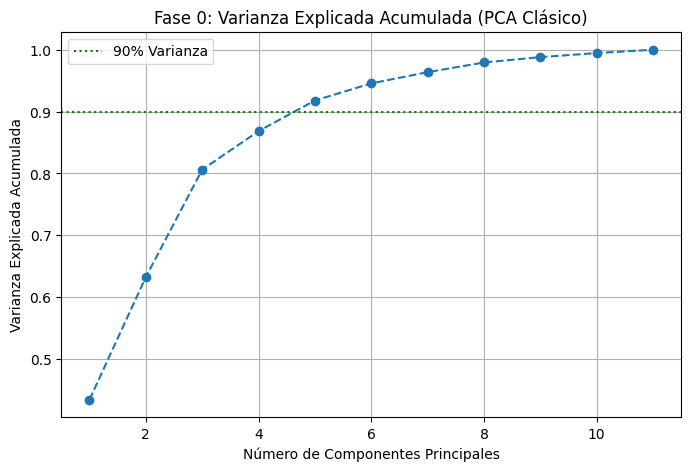

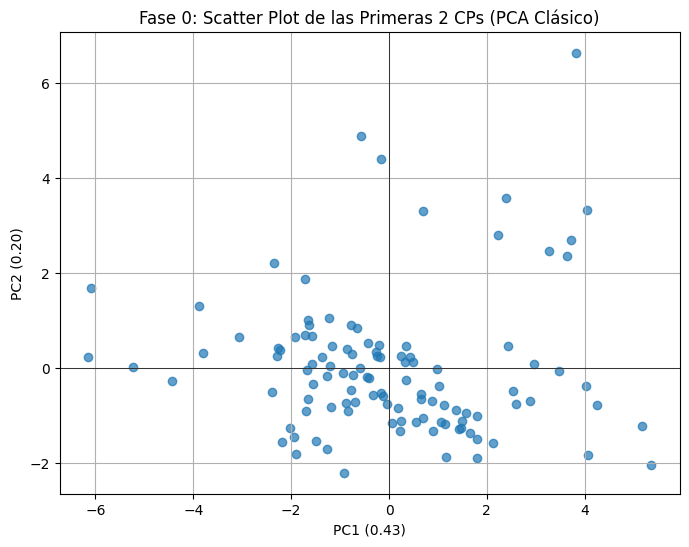


--- Selección de CPs y Cálculo de Error de Reconstrucción ---
  Umbral de varianza: 90%. CPs seleccionadas: 5 (explican 0.9179)
  Dimensiones DataFrame CPs seleccionadas: (111, 5)
  Dimensiones DataFrame Errores reconstrucción: (111, 11)
División datos (CPs y Errores): Fase I N=77, Fase II N=34

--- FASE I: Establecimiento de Parámetros (sobre 5 CPs y 11 Errores) ---
  Alfa global objetivo: 0.0500, Alfa individual por prueba (Bonferroni): 0.0250
  Percentil objetivo individual para umbrales bootstrap: 97.500%
  Test Normalidad (FaseI-Orig-CPs N=77, Vars=5): HZ=1.999, p-val=0.000 (Normal: False)
  Test Normalidad (FaseI-Orig-Errs N=77, Vars=11): HZ=308.000, p-val=0.000 (Normal: False)

Fase I - Iter Limpieza 1 (N Y_clean CPs: 77, N Y_clean Errs: 77)
  Test Normalidad (Iter1-CPs N=77, Vars=5): HZ=1.999, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 17.859
  Test Normalidad (Iter1-Errores N=77, Vars=11): HZ=308.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 15.049


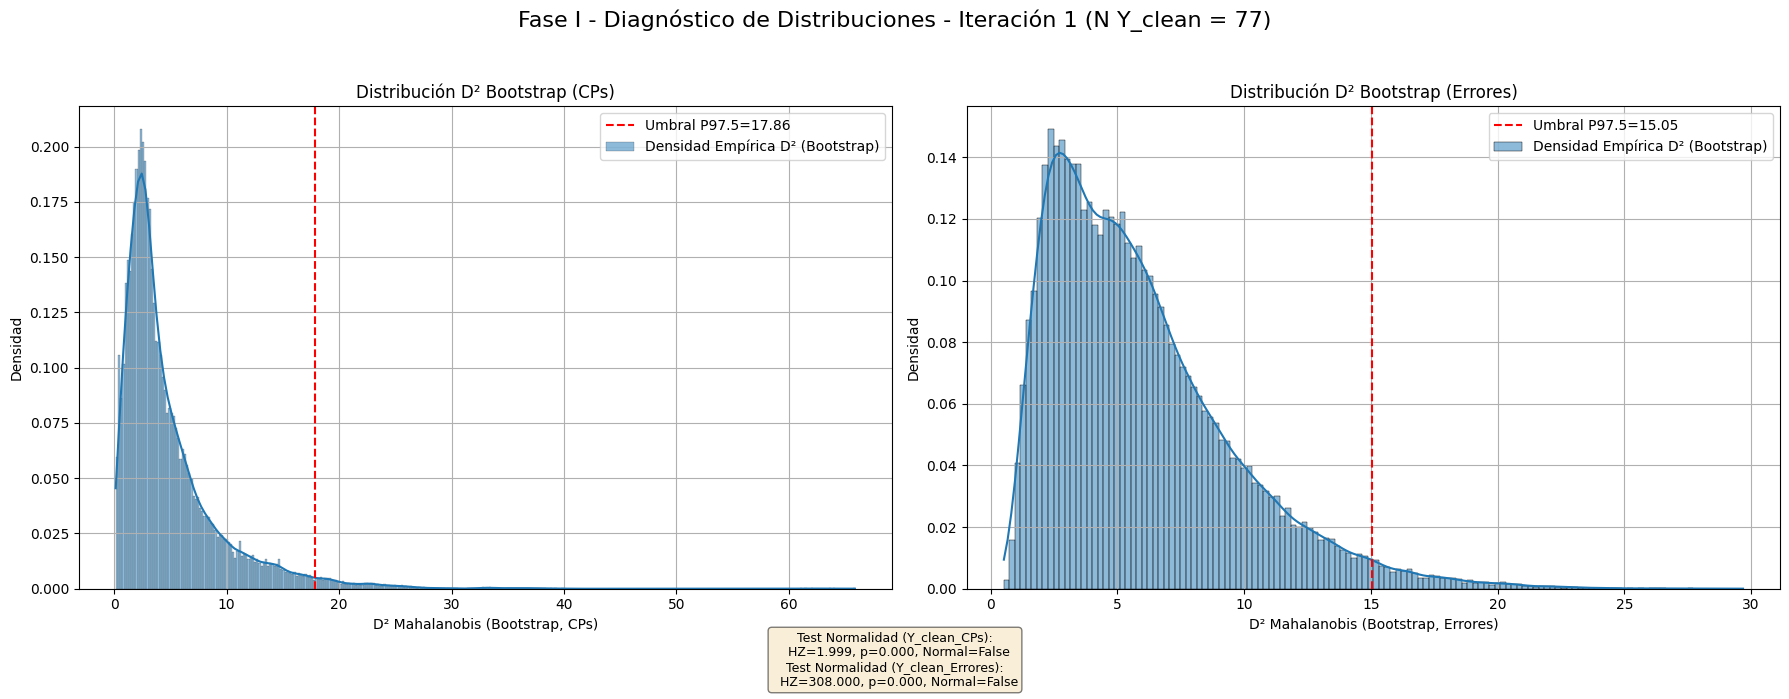

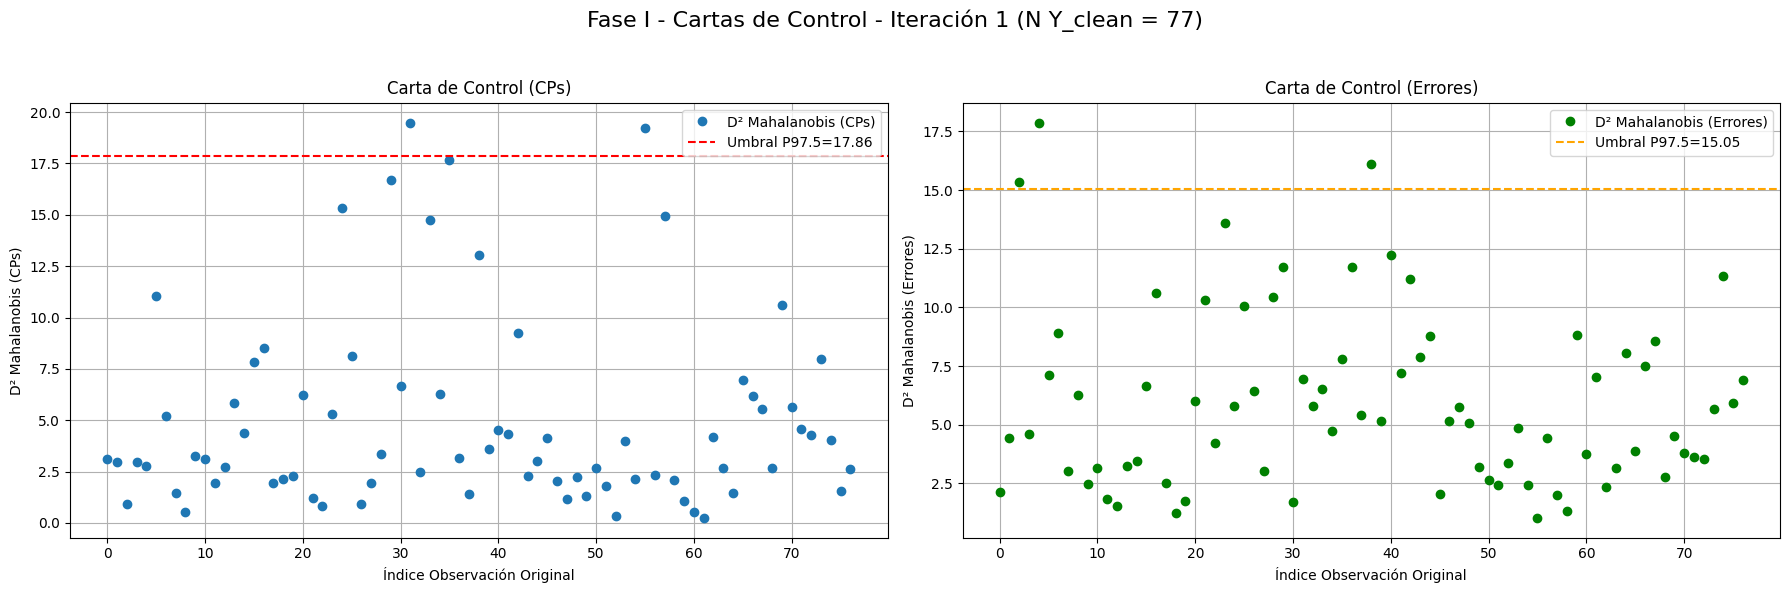

  Outlier combinado detectado: Índice original 4 (D²_CPs=2.78, D²_Errs=17.87). Eliminando.

Fase I - Iter Limpieza 2 (N Y_clean CPs: 76, N Y_clean Errs: 76)
  Test Normalidad (Iter2-CPs N=76, Vars=5): HZ=1.993, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 17.928
  Test Normalidad (Iter2-Errores N=76, Vars=11): HZ=304.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.691


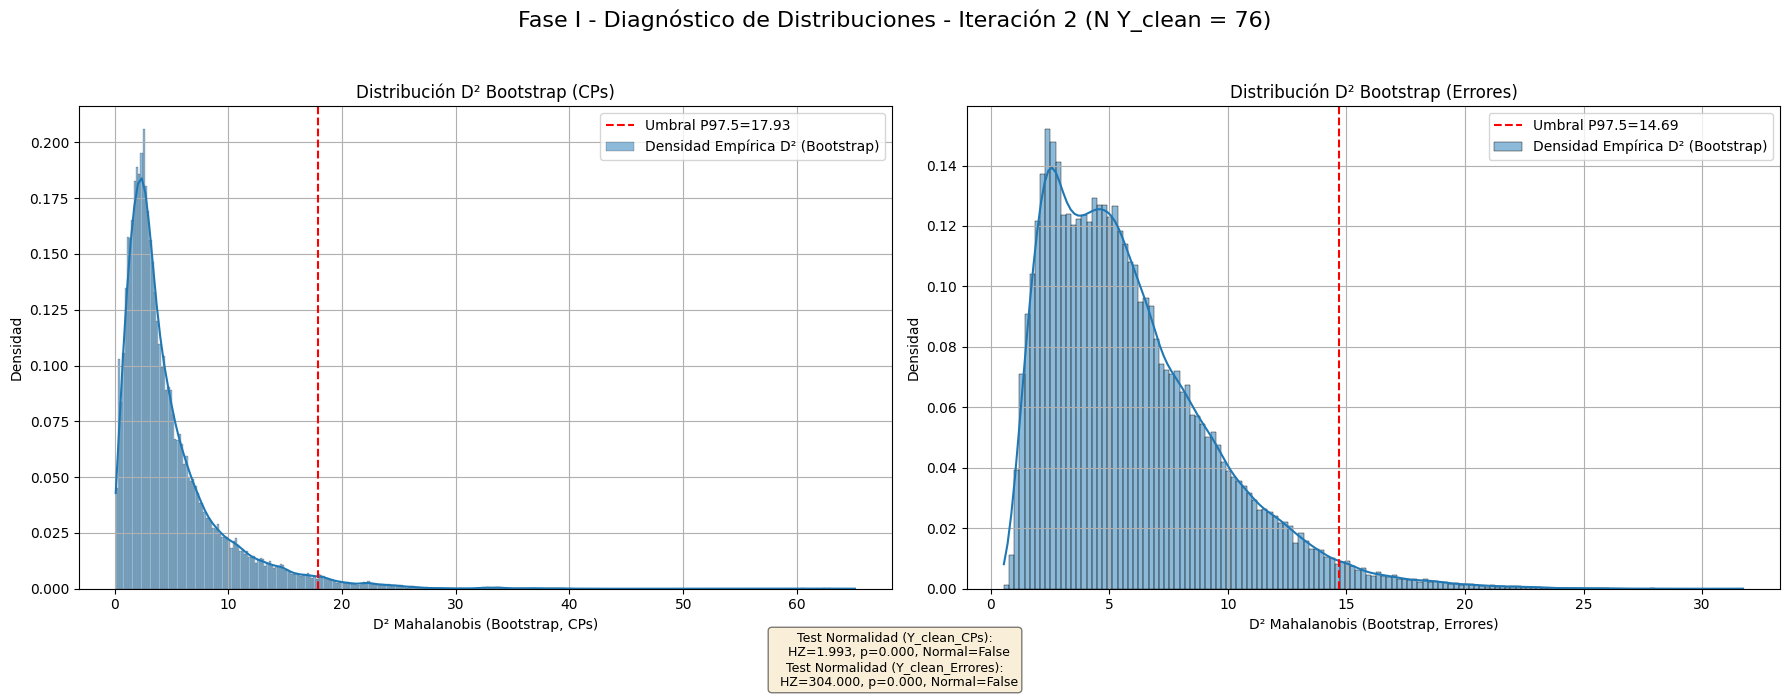

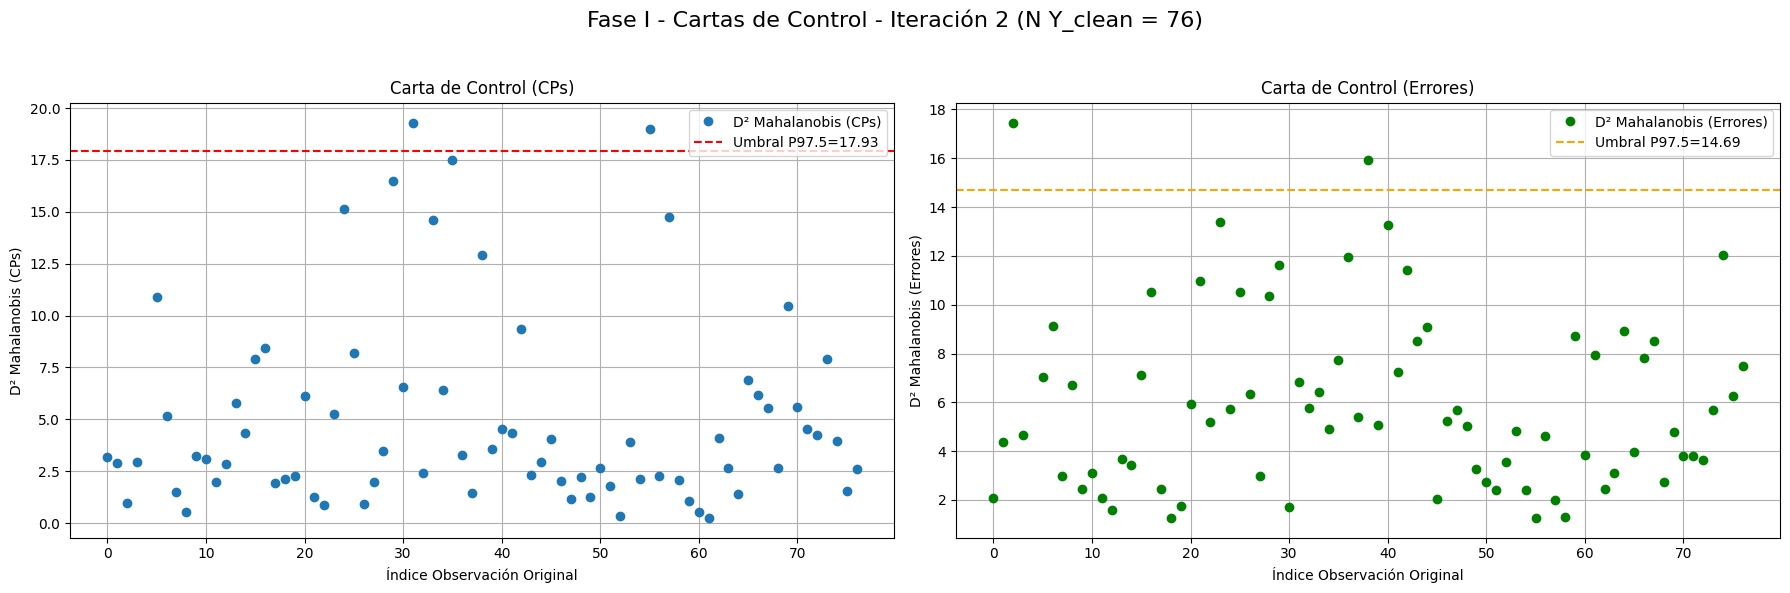

  Outlier combinado detectado: Índice original 2 (D²_CPs=0.99, D²_Errs=17.46). Eliminando.

Fase I - Iter Limpieza 3 (N Y_clean CPs: 75, N Y_clean Errs: 75)
  Test Normalidad (Iter3-CPs N=75, Vars=5): HZ=1.963, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 17.448
  Test Normalidad (Iter3-Errores N=75, Vars=11): HZ=300.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.477


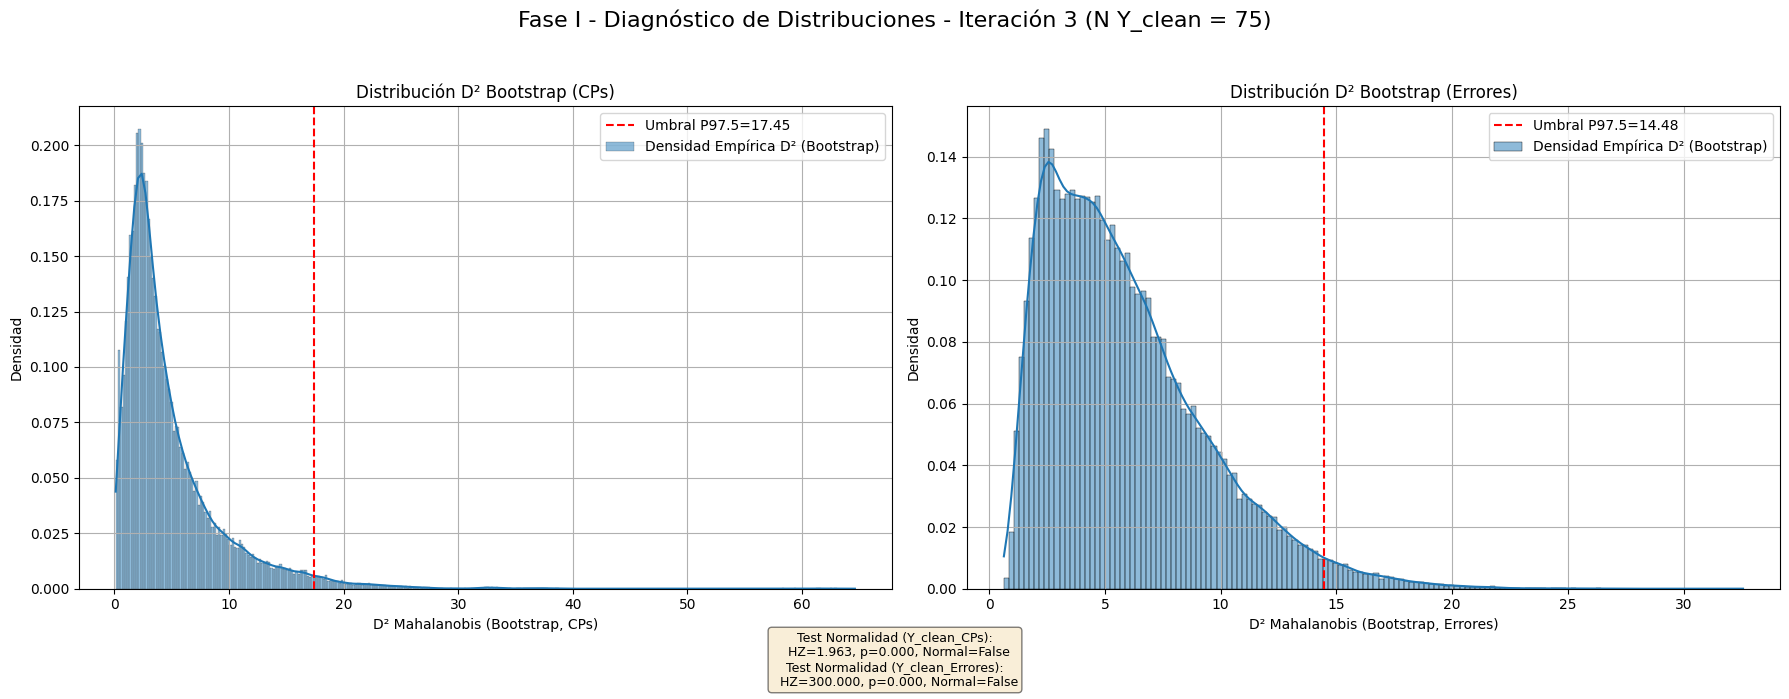

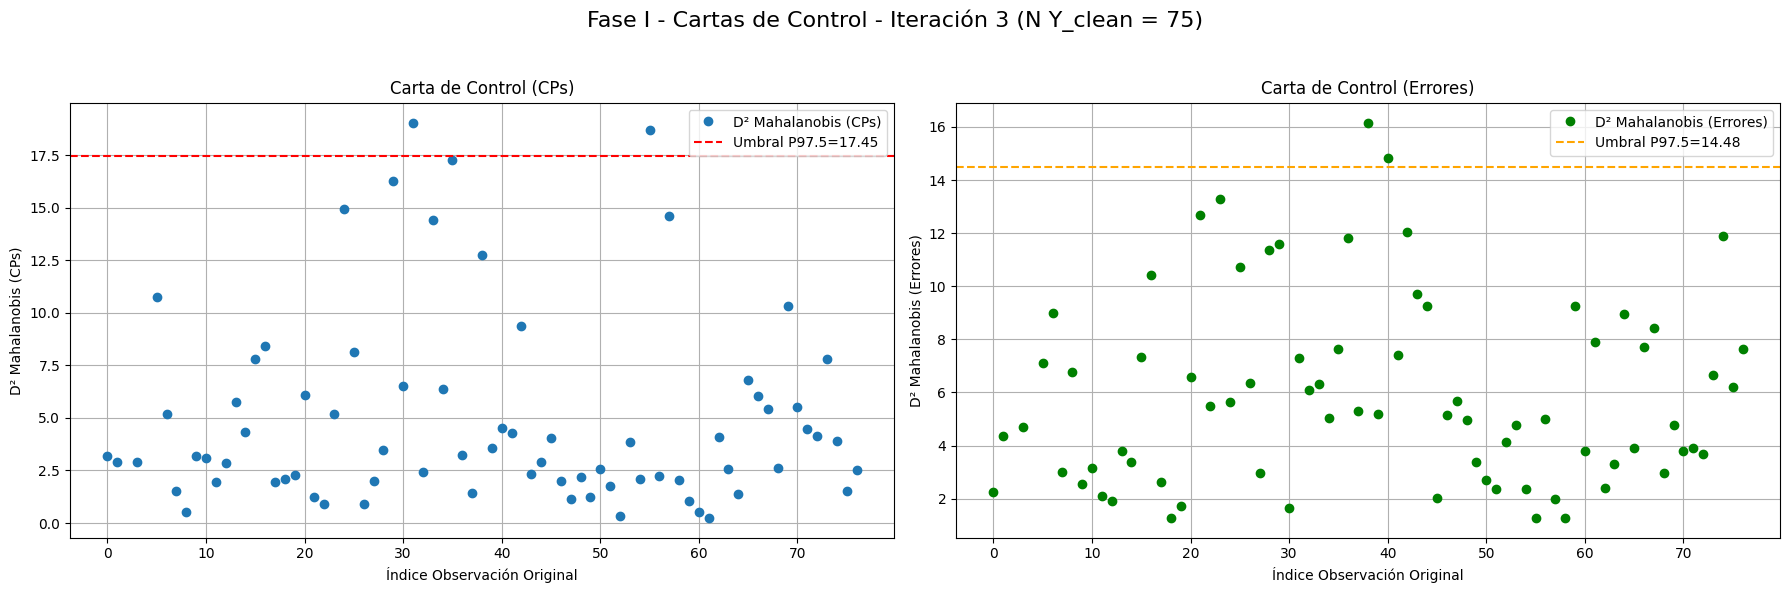

  Outlier combinado detectado: Índice original 38 (D²_CPs=12.73, D²_Errs=16.17). Eliminando.

Fase I - Iter Limpieza 4 (N Y_clean CPs: 74, N Y_clean Errs: 74)
  Test Normalidad (Iter4-CPs N=74, Vars=5): HZ=1.902, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 17.730
  Test Normalidad (Iter4-Errores N=74, Vars=11): HZ=296.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.032


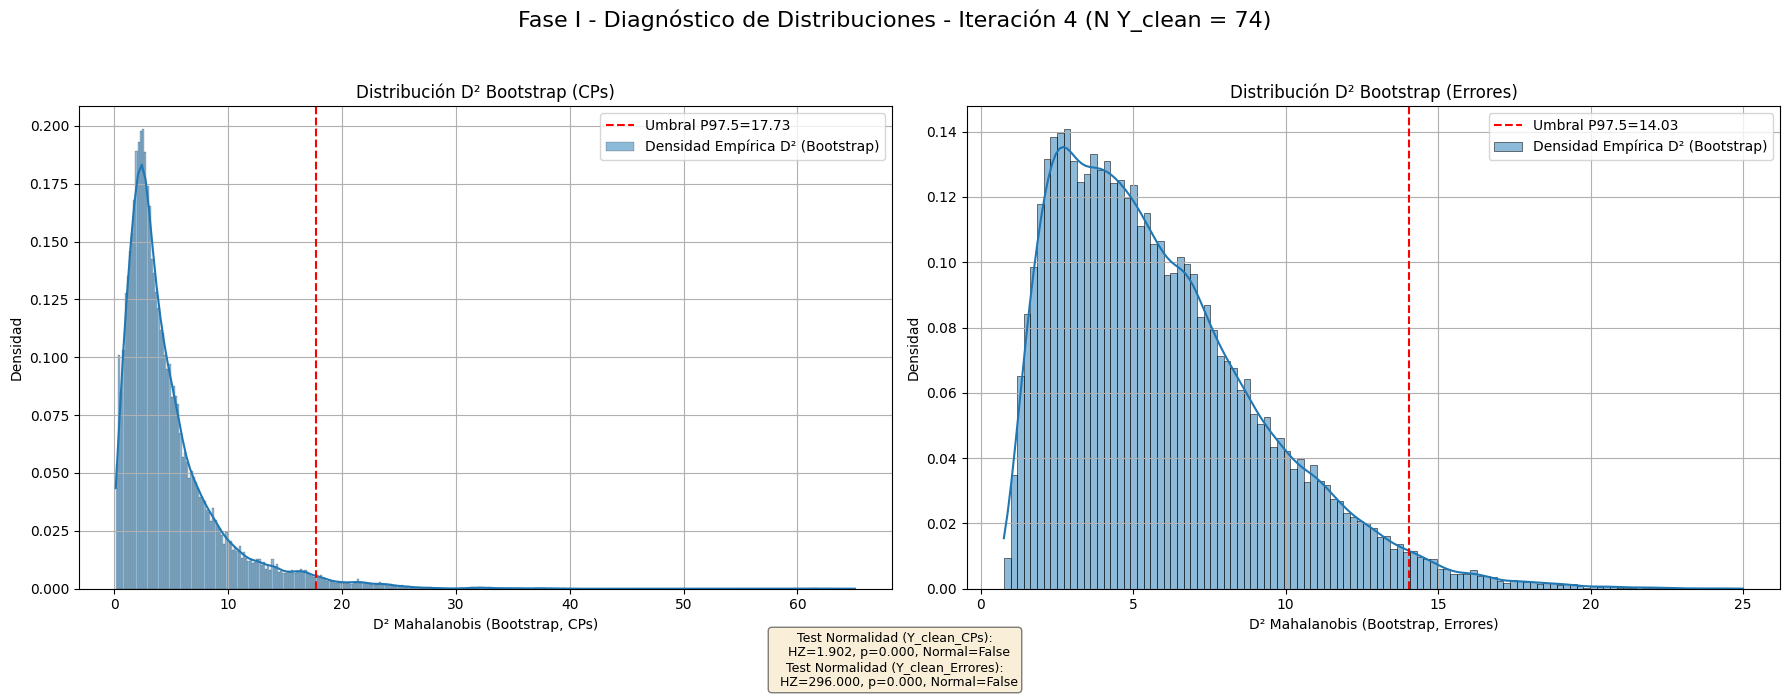

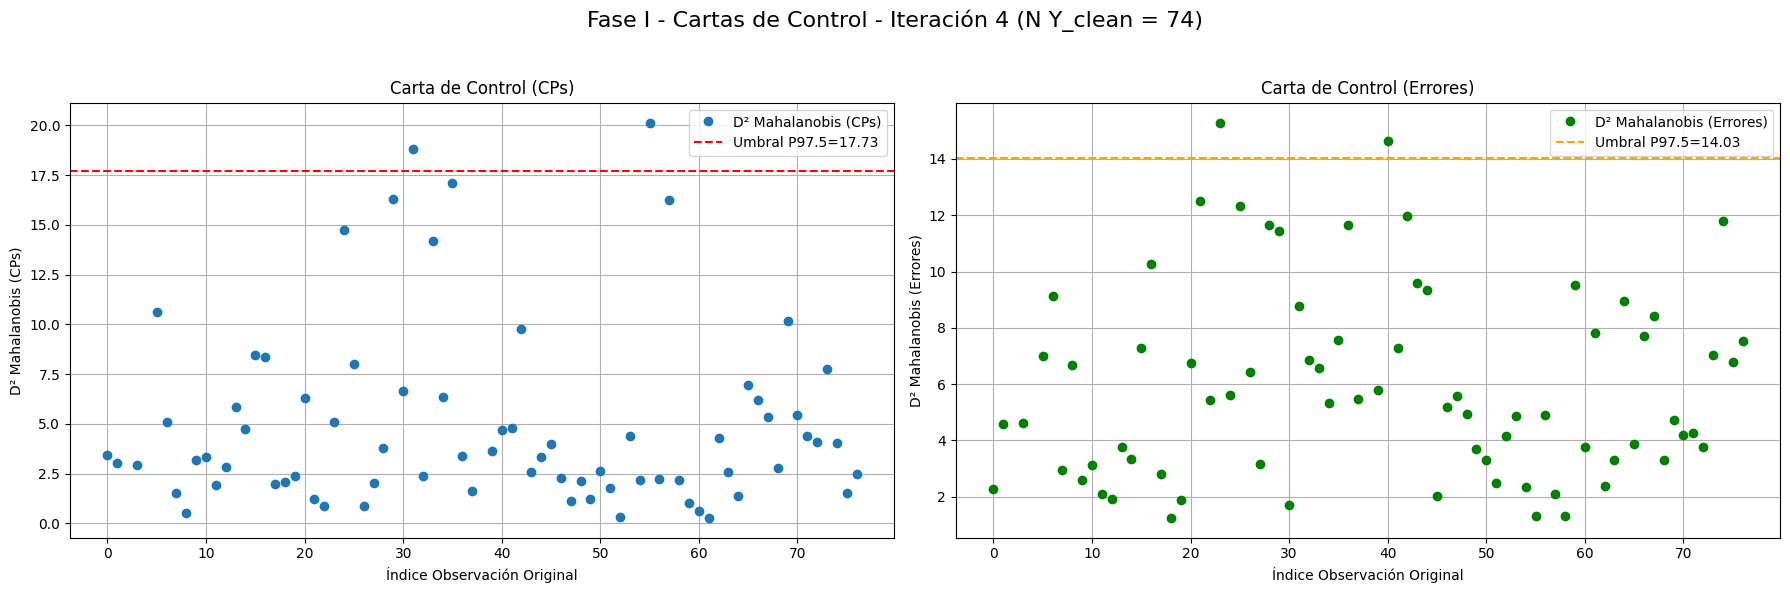

  Outlier combinado detectado: Índice original 55 (D²_CPs=20.14, D²_Errs=1.30). Eliminando.

Fase I - Iter Limpieza 5 (N Y_clean CPs: 73, N Y_clean Errs: 73)
  Test Normalidad (Iter5-CPs N=73, Vars=5): HZ=1.767, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 16.996
  Test Normalidad (Iter5-Errores N=73, Vars=11): HZ=292.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.072


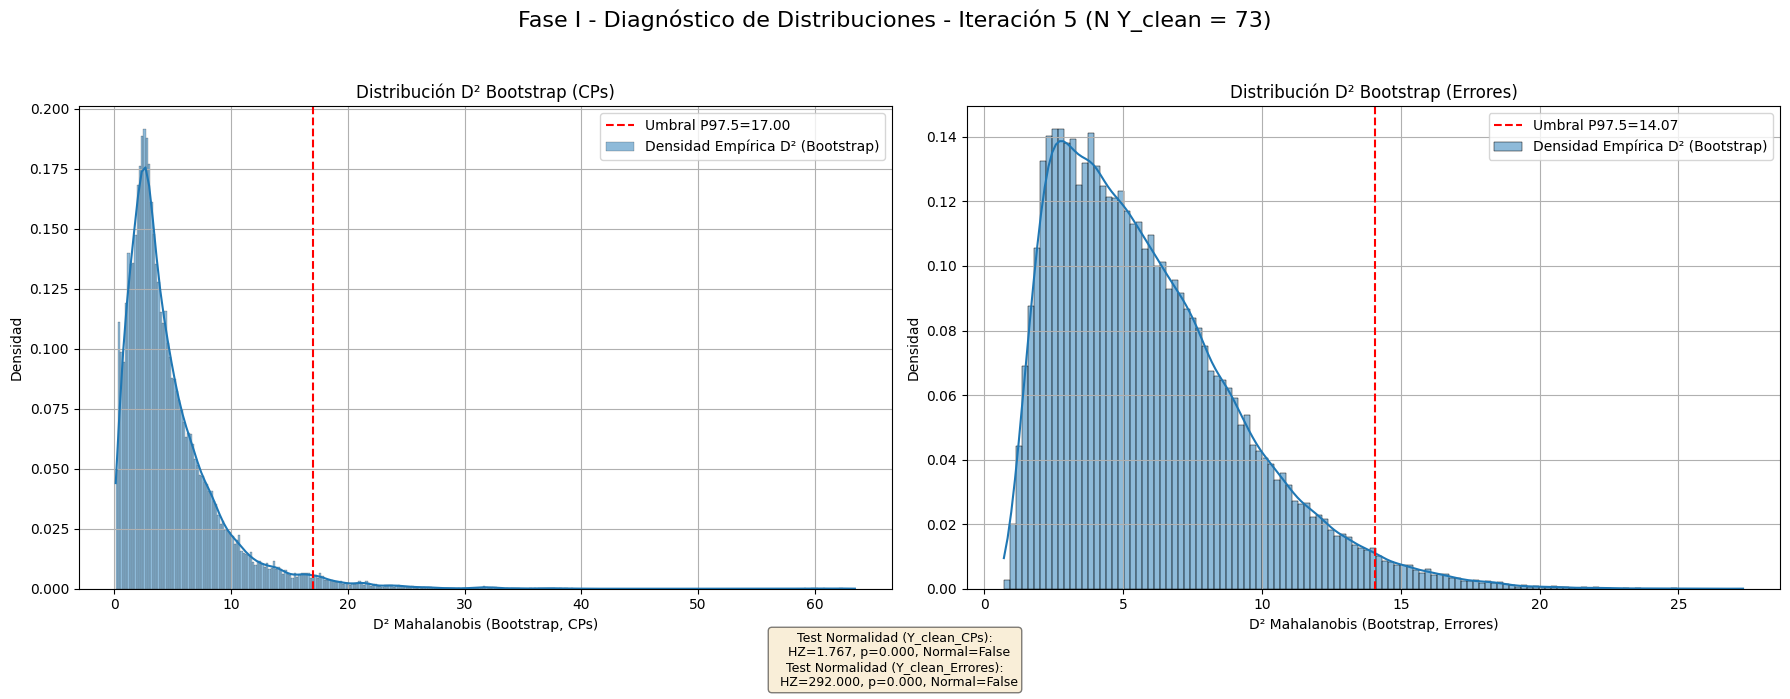

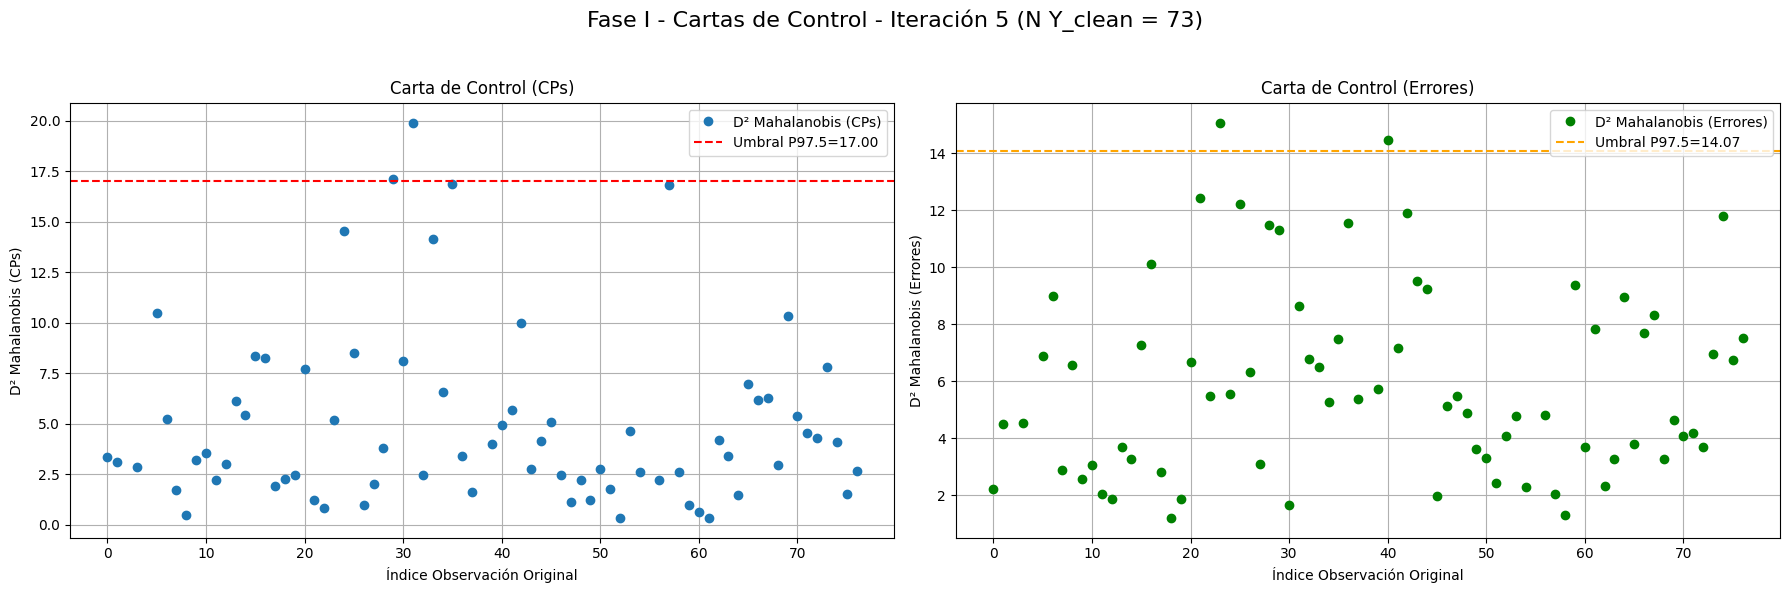

  Outlier combinado detectado: Índice original 31 (D²_CPs=19.91, D²_Errs=8.64). Eliminando.

Fase I - Iter Limpieza 6 (N Y_clean CPs: 72, N Y_clean Errs: 72)
  Test Normalidad (Iter6-CPs N=72, Vars=5): HZ=1.711, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 16.720
  Test Normalidad (Iter6-Errores N=72, Vars=11): HZ=288.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.221


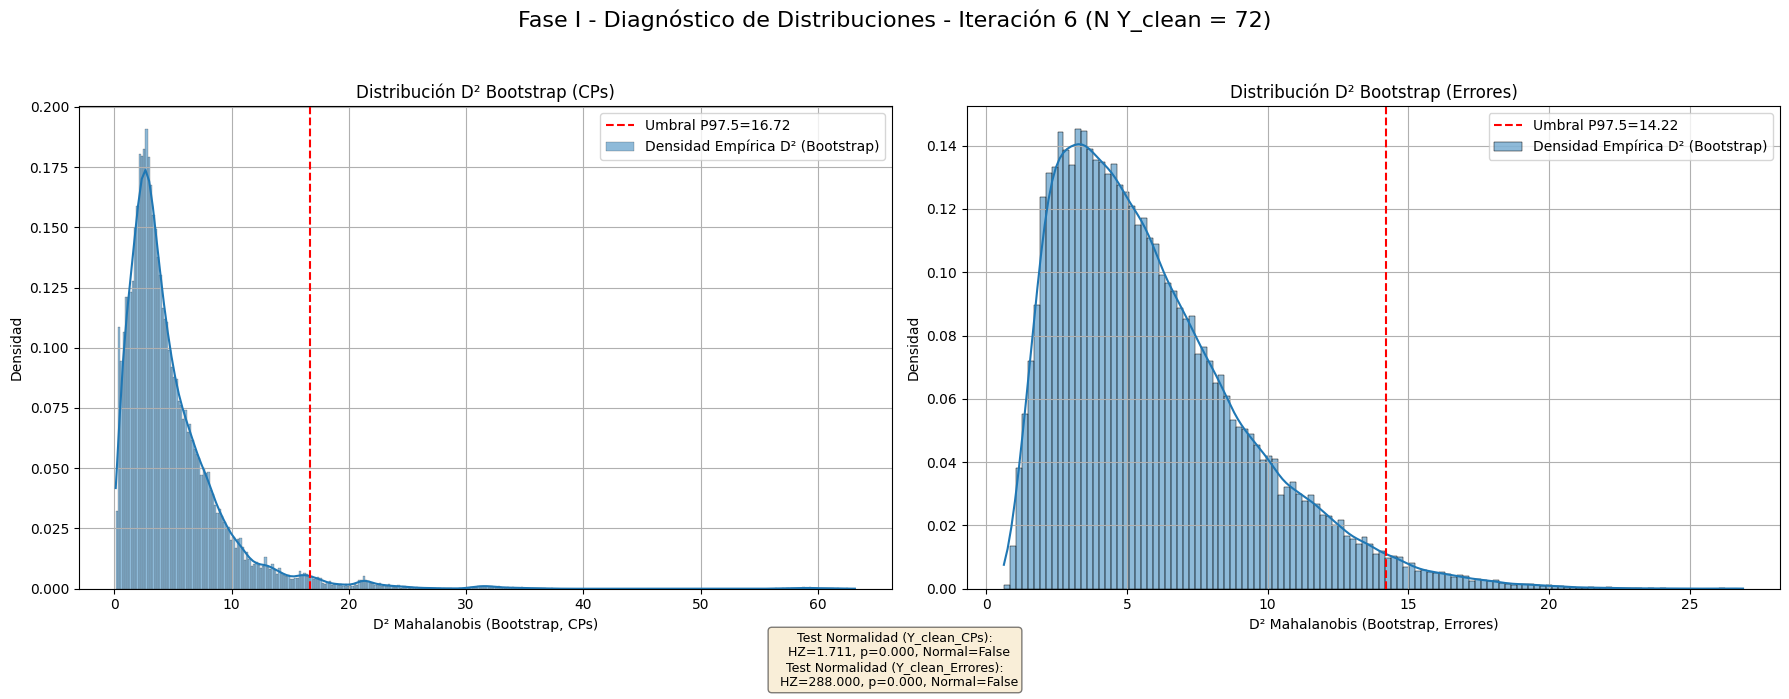

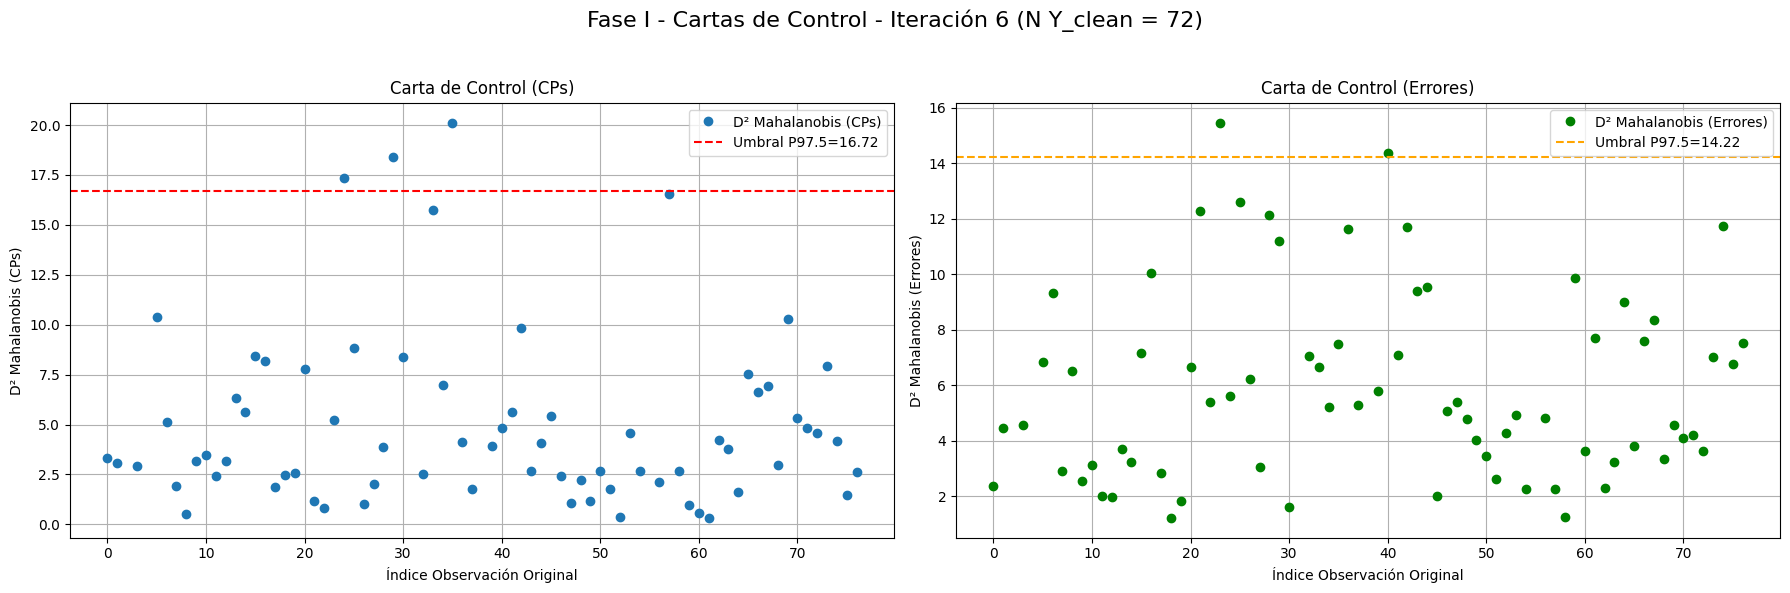

  Outlier combinado detectado: Índice original 35 (D²_CPs=20.12, D²_Errs=7.48). Eliminando.

Fase I - Iter Limpieza 7 (N Y_clean CPs: 71, N Y_clean Errs: 71)
  Test Normalidad (Iter7-CPs N=71, Vars=5): HZ=1.664, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 17.038
  Test Normalidad (Iter7-Errores N=71, Vars=11): HZ=284.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.263


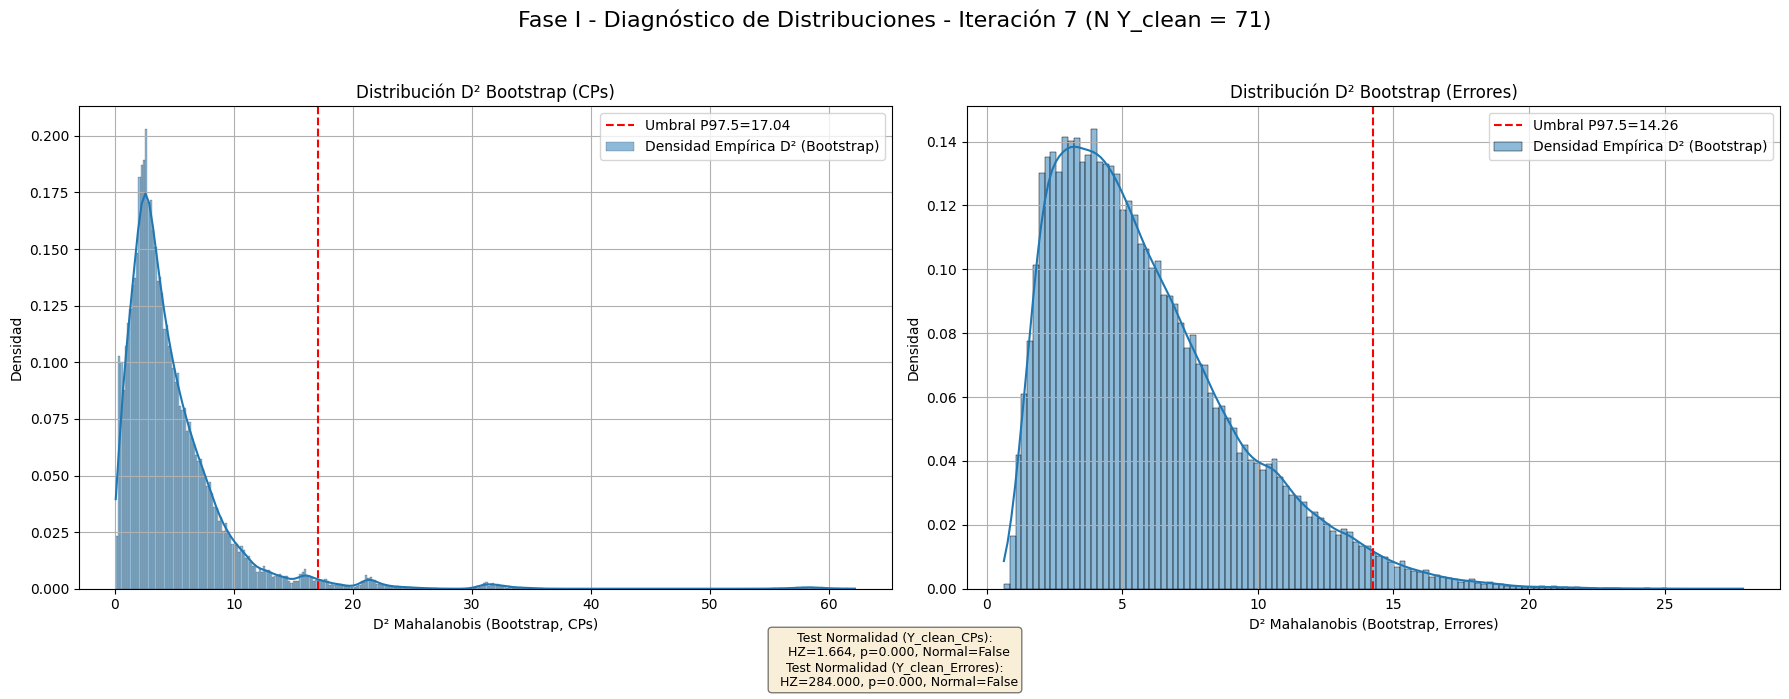

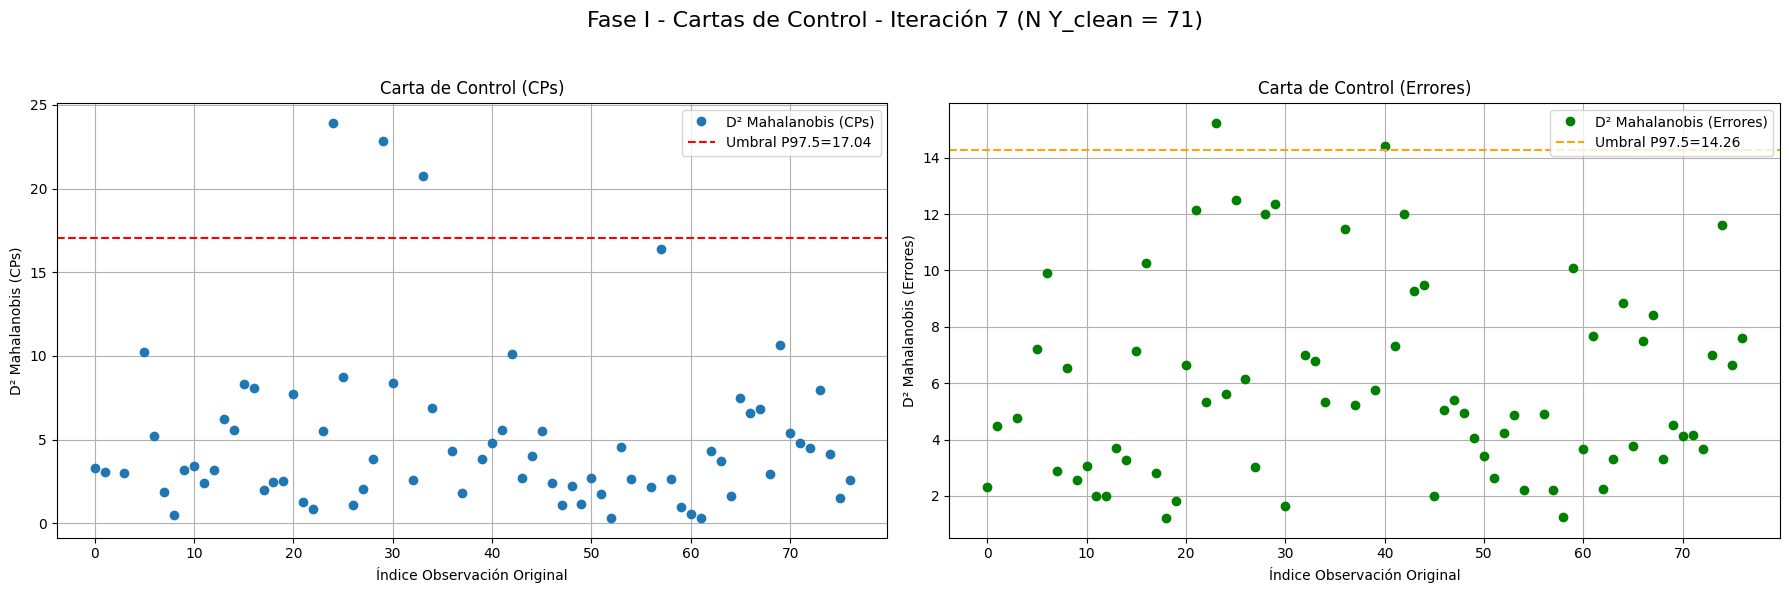

  Outlier combinado detectado: Índice original 24 (D²_CPs=23.94, D²_Errs=5.62). Eliminando.

Fase I - Iter Limpieza 8 (N Y_clean CPs: 70, N Y_clean Errs: 70)
  Test Normalidad (Iter8-CPs N=70, Vars=5): HZ=1.591, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 16.493
  Test Normalidad (Iter8-Errores N=70, Vars=11): HZ=280.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.216


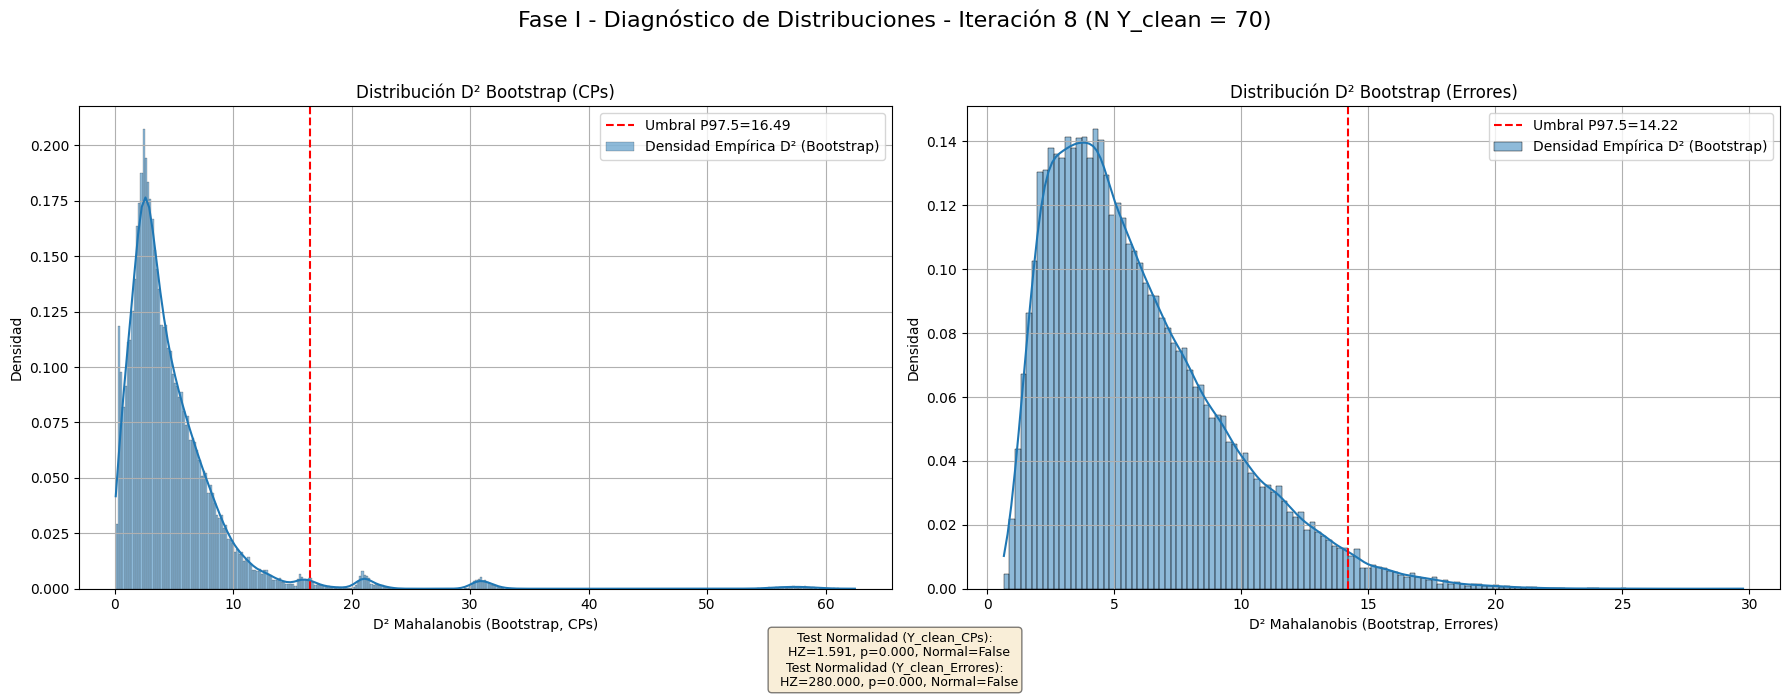

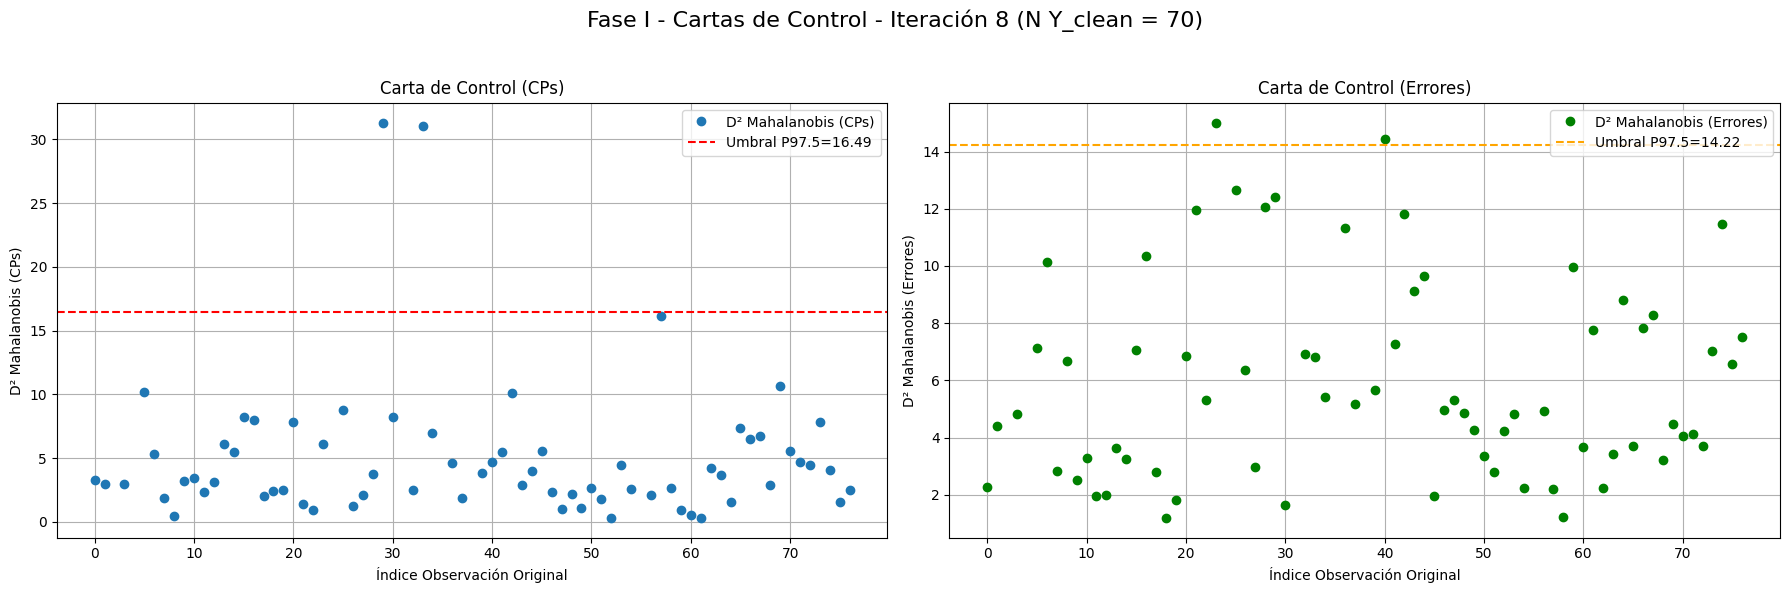

  Outlier combinado detectado: Índice original 29 (D²_CPs=31.32, D²_Errs=12.40). Eliminando.

Fase I - Iter Limpieza 9 (N Y_clean CPs: 69, N Y_clean Errs: 69)
  Test Normalidad (Iter9-CPs N=69, Vars=5): HZ=1.451, p-val=0.000 (Normal: False)
  Umbral CPs P97.500: 13.804
  Test Normalidad (Iter9-Errores N=69, Vars=11): HZ=276.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.330


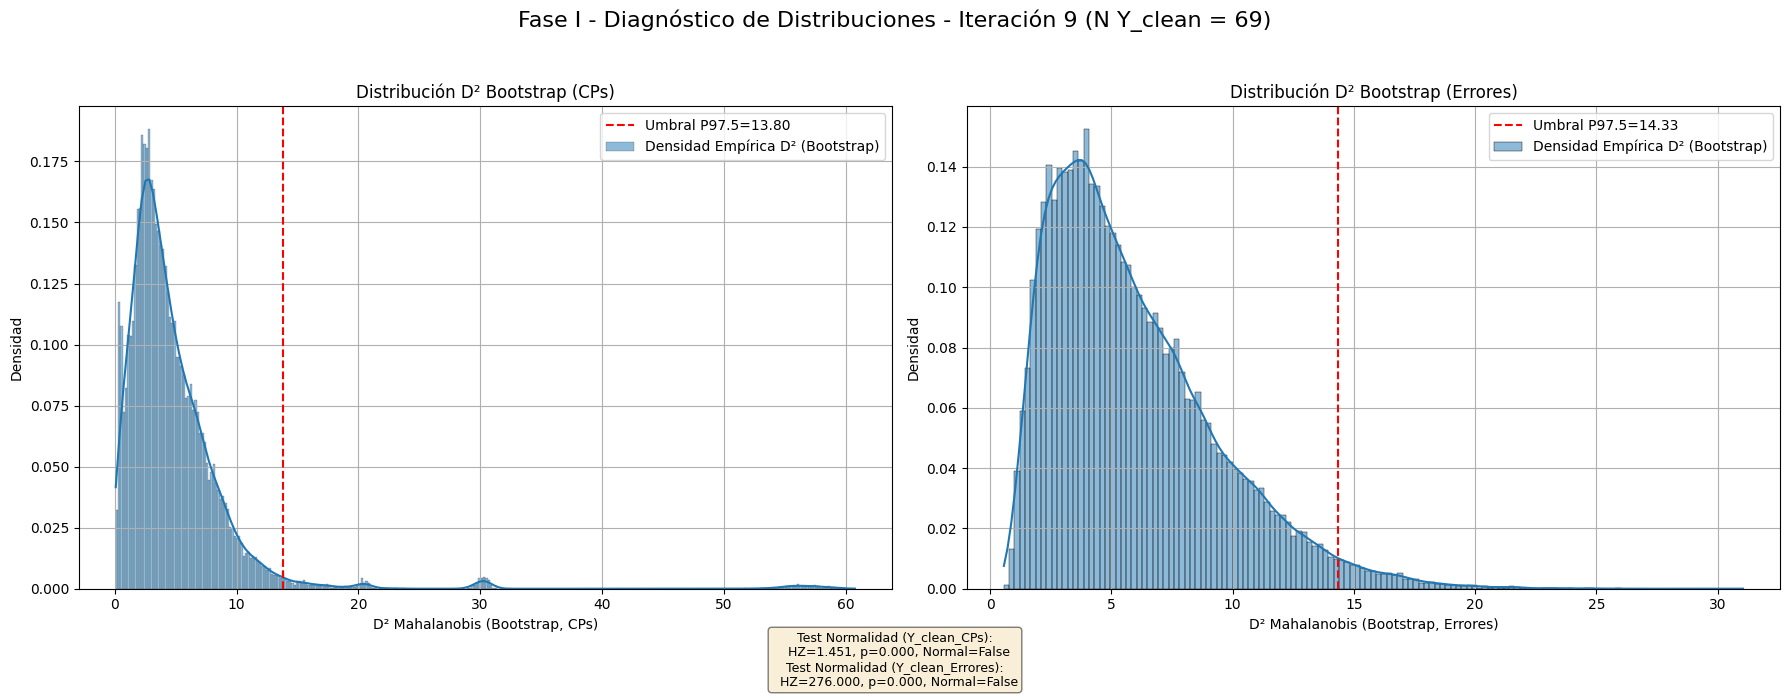

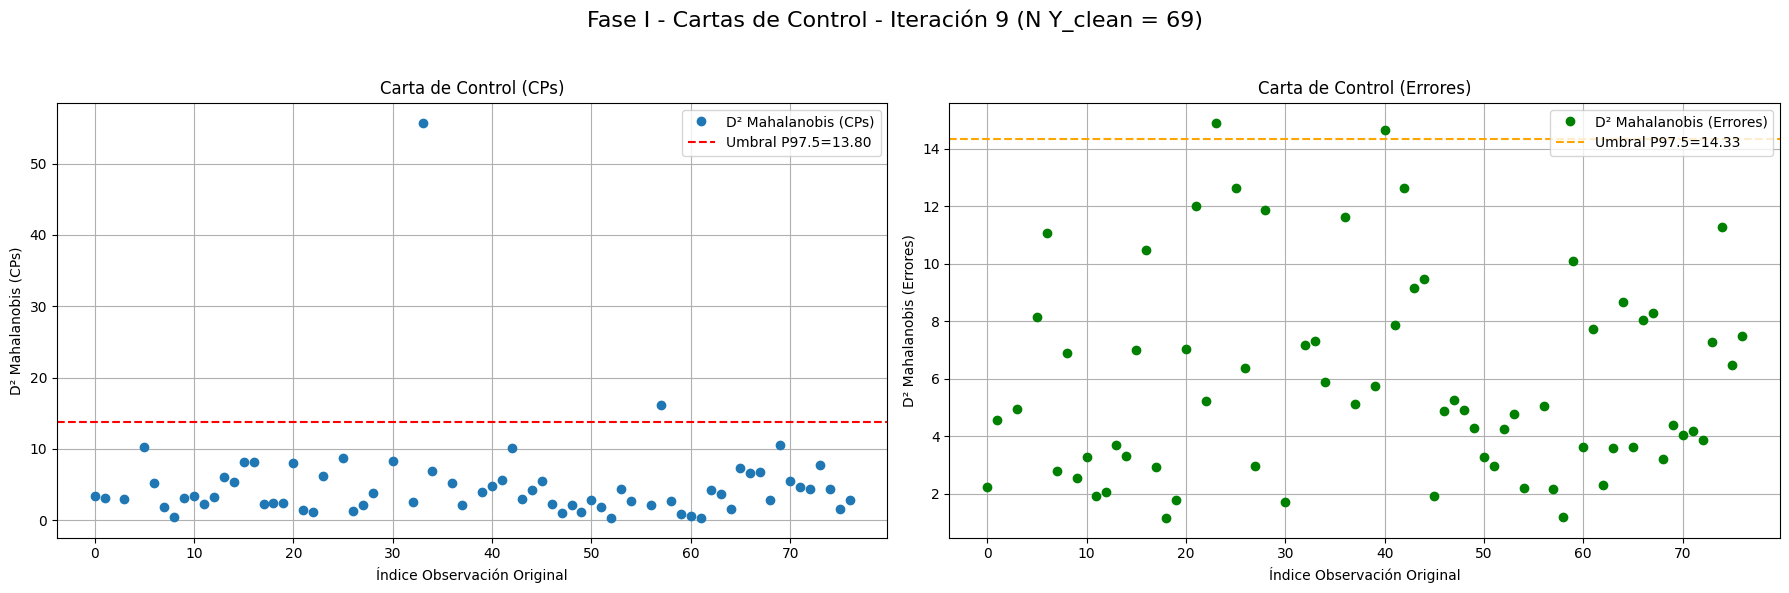

  Outlier combinado detectado: Índice original 33 (D²_CPs=55.77, D²_Errs=7.31). Eliminando.

Fase I - Iter Limpieza 10 (N Y_clean CPs: 68, N Y_clean Errs: 68)
  Test Normalidad (Iter10-CPs N=68, Vars=5): HZ=1.059, p-val=0.005 (Normal: False)
  Umbral CPs P97.500: 12.504
  Test Normalidad (Iter10-Errores N=68, Vars=11): HZ=272.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.486


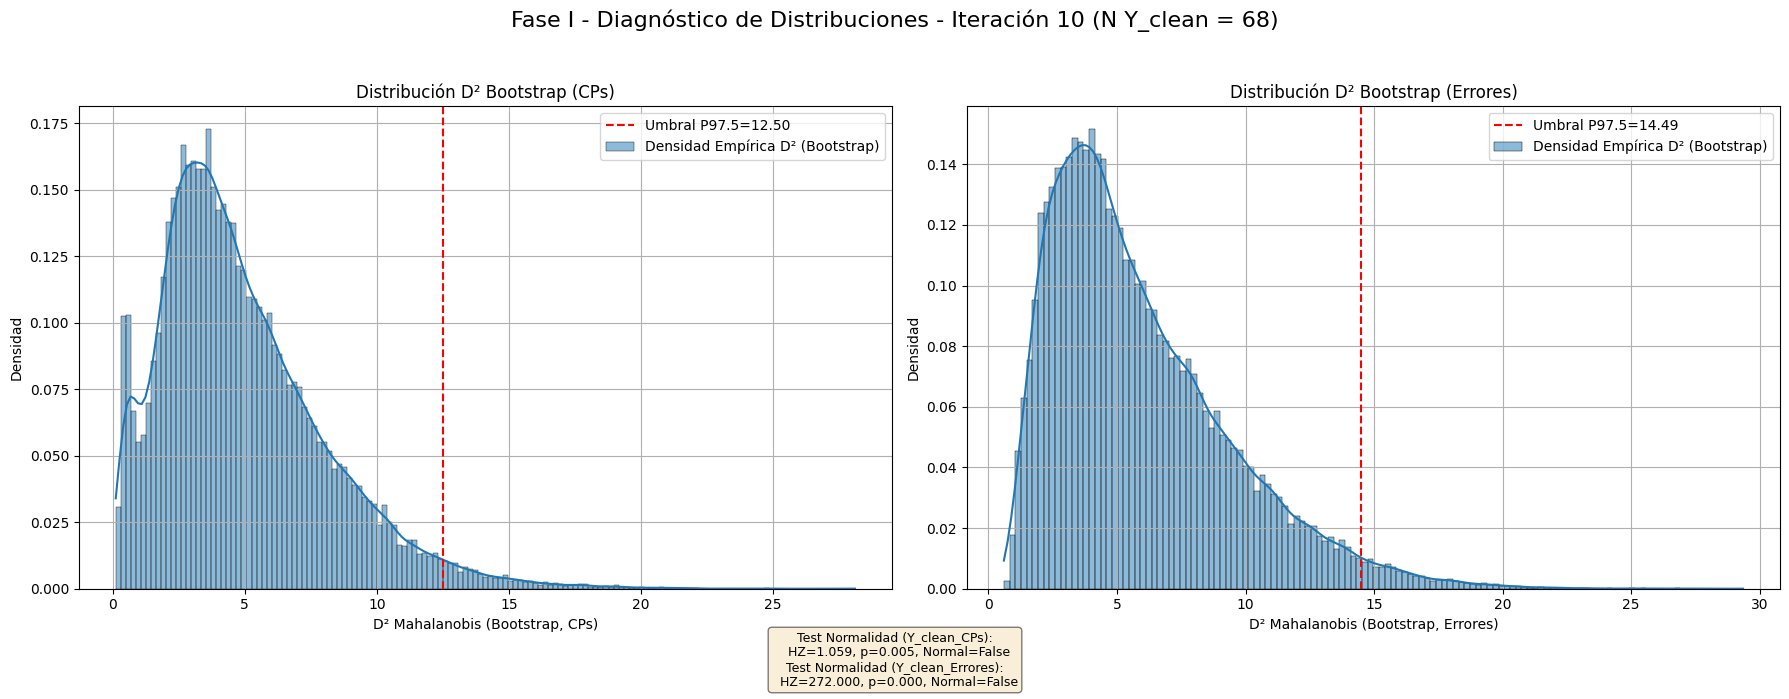

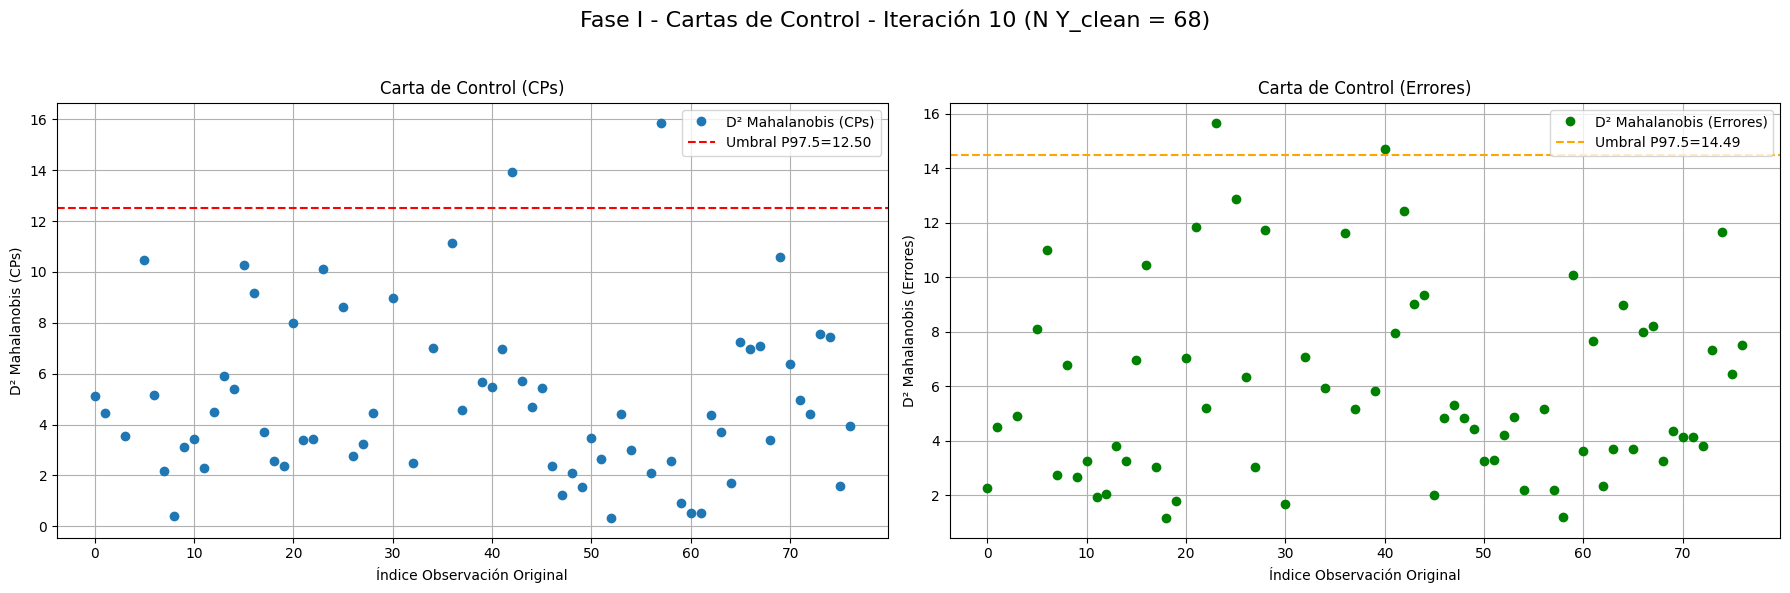

  Outlier combinado detectado: Índice original 57 (D²_CPs=15.88, D²_Errs=2.21). Eliminando.

Fase I - Iter Limpieza 11 (N Y_clean CPs: 67, N Y_clean Errs: 67)
  Test Normalidad (Iter11-CPs N=67, Vars=5): HZ=1.050, p-val=0.006 (Normal: False)
  Umbral CPs P97.500: 11.947
  Test Normalidad (Iter11-Errores N=67, Vars=11): HZ=268.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.380


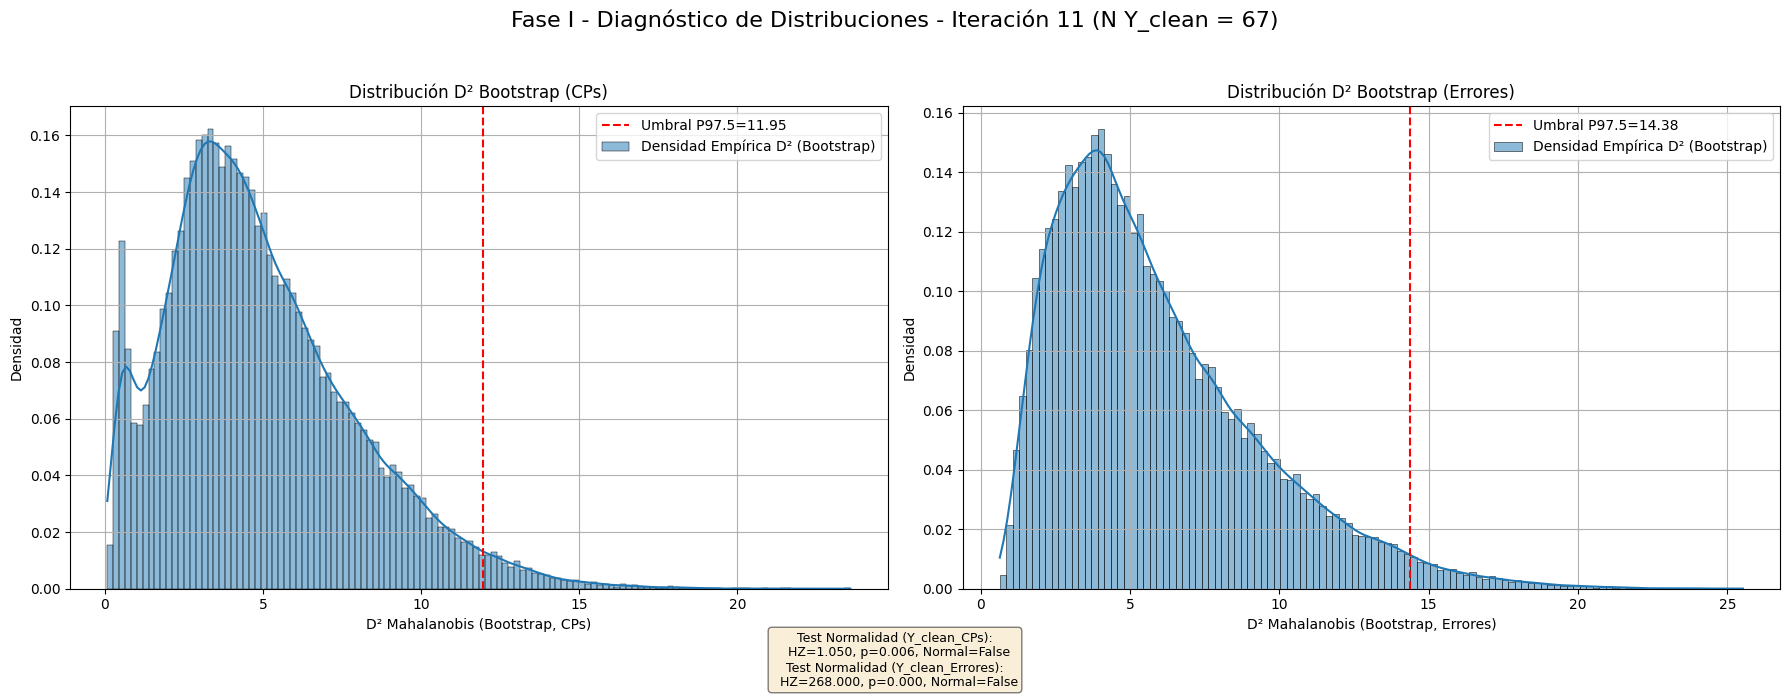

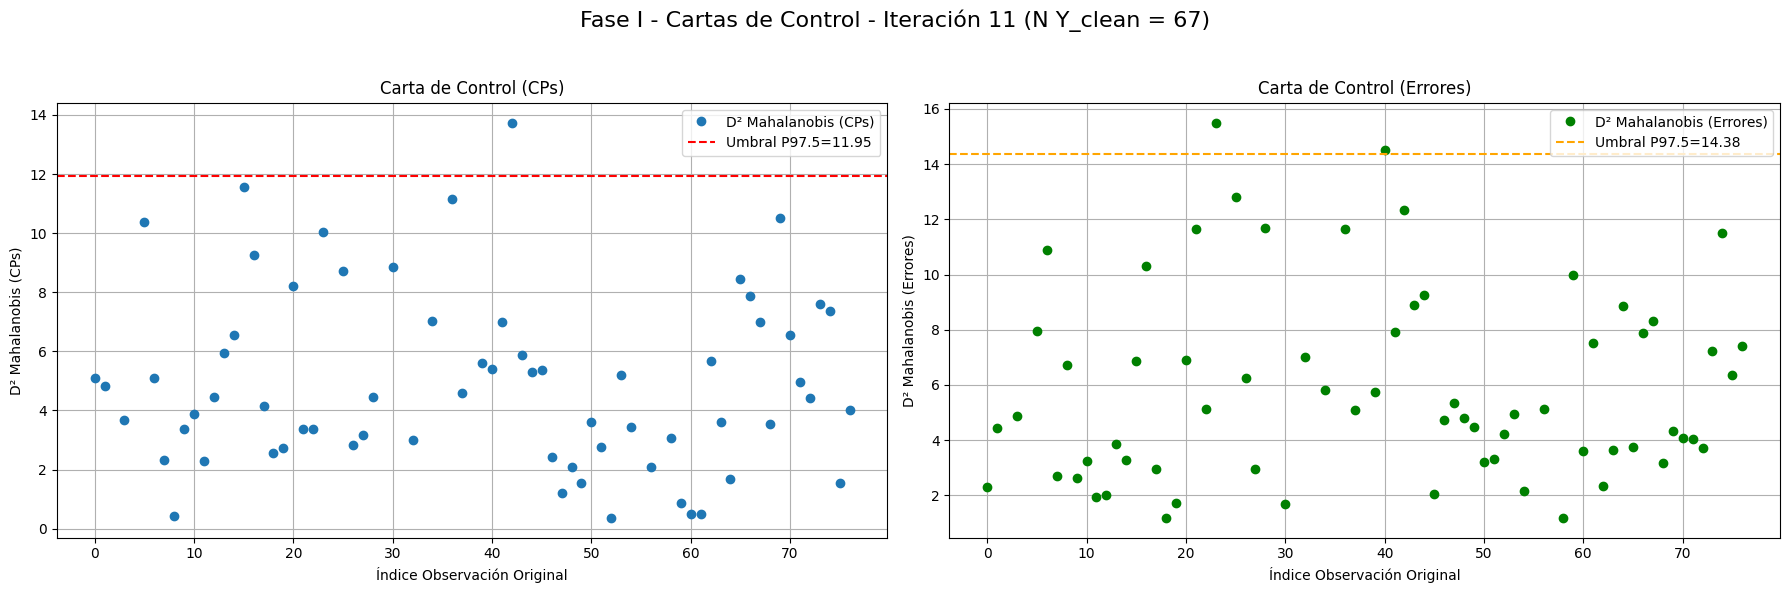

  Outlier combinado detectado: Índice original 42 (D²_CPs=13.74, D²_Errs=12.32). Eliminando.

Fase I - Iter Limpieza 12 (N Y_clean CPs: 66, N Y_clean Errs: 66)
  Test Normalidad (Iter12-CPs N=66, Vars=5): HZ=1.031, p-val=0.011 (Normal: False)
  Umbral CPs P97.500: 11.650
  Test Normalidad (Iter12-Errores N=66, Vars=11): HZ=264.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.589


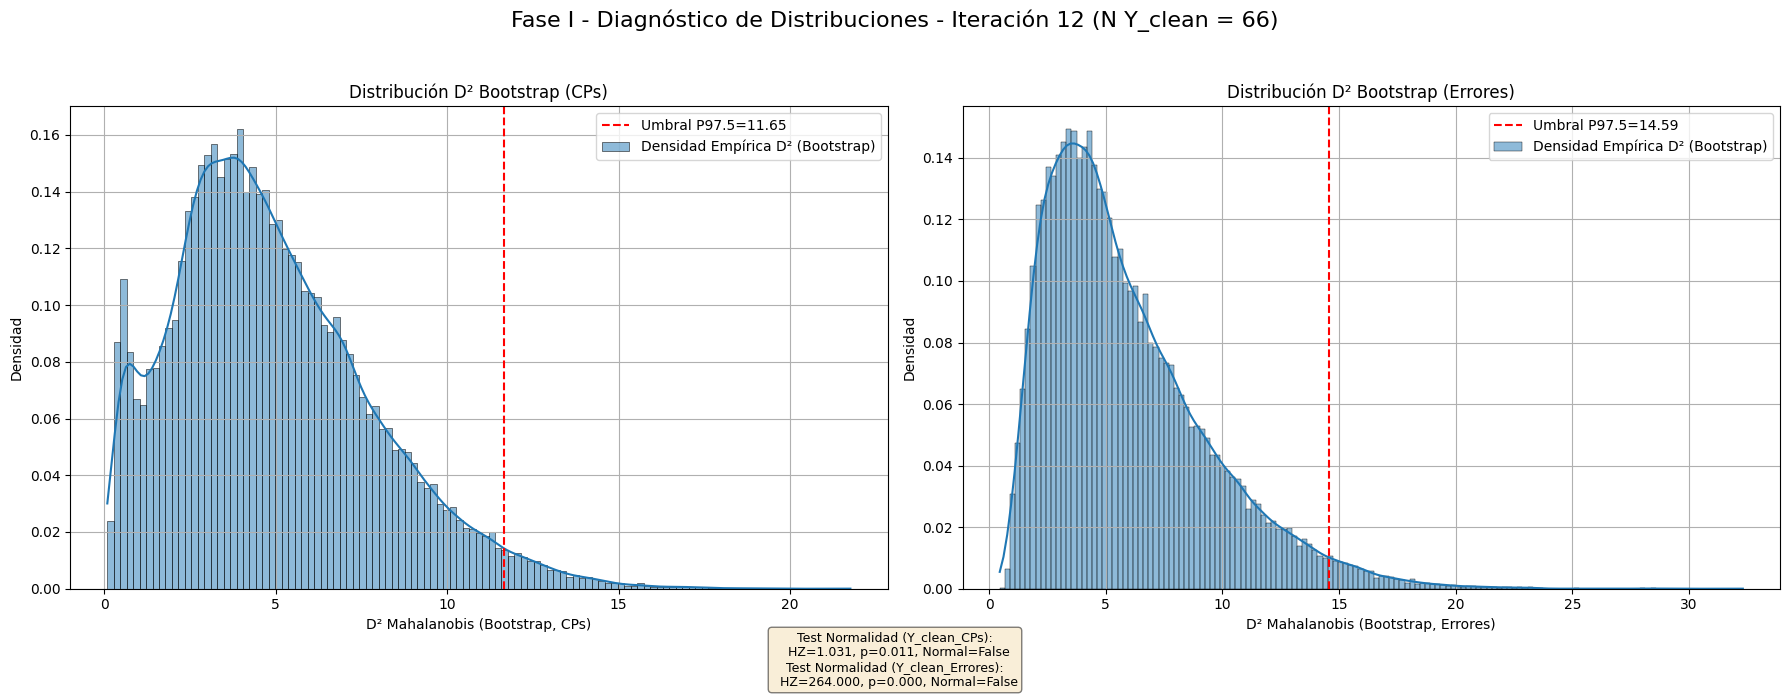

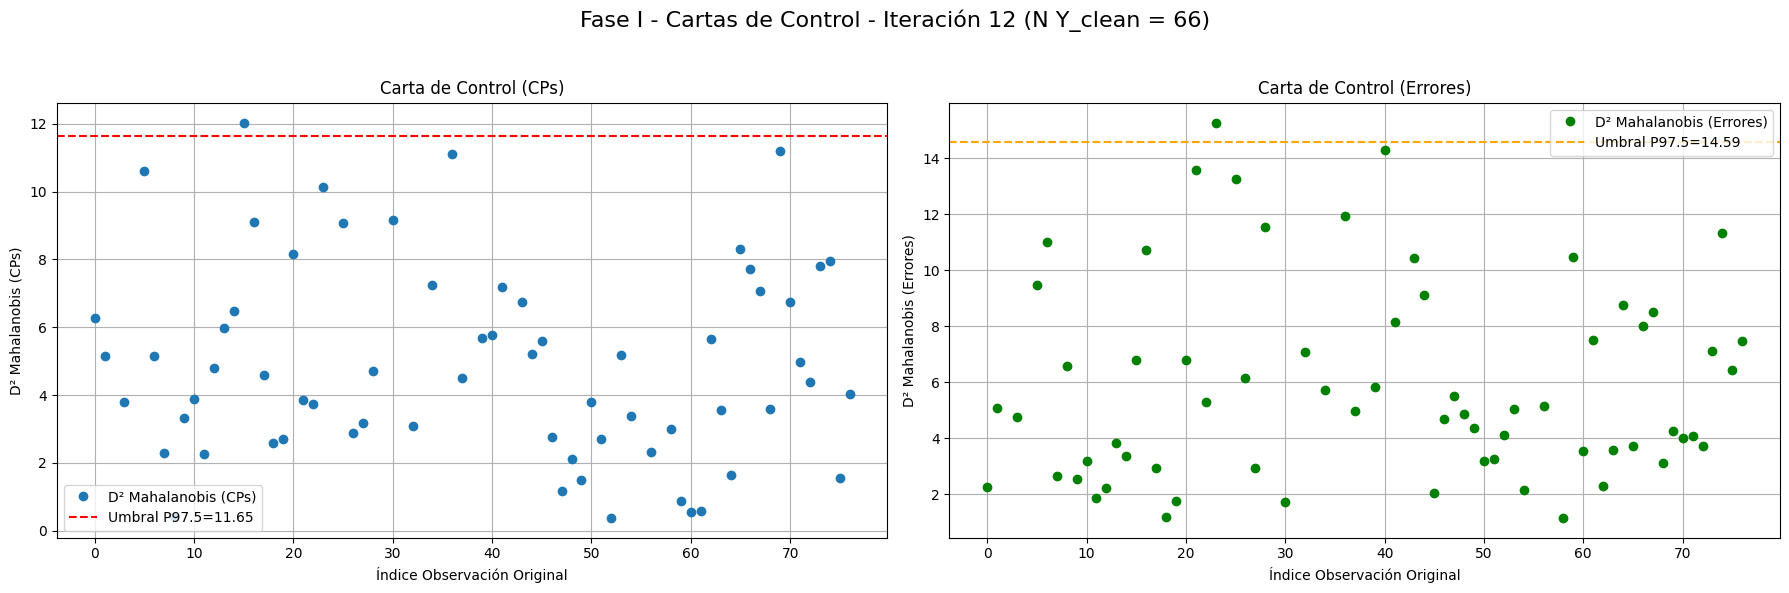

  Outlier combinado detectado: Índice original 23 (D²_CPs=10.13, D²_Errs=15.27). Eliminando.

Fase I - Iter Limpieza 13 (N Y_clean CPs: 65, N Y_clean Errs: 65)
  Test Normalidad (Iter13-CPs N=65, Vars=5): HZ=1.030, p-val=0.011 (Normal: False)
  Umbral CPs P97.500: 11.658
  Test Normalidad (Iter13-Errores N=65, Vars=11): HZ=260.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.233


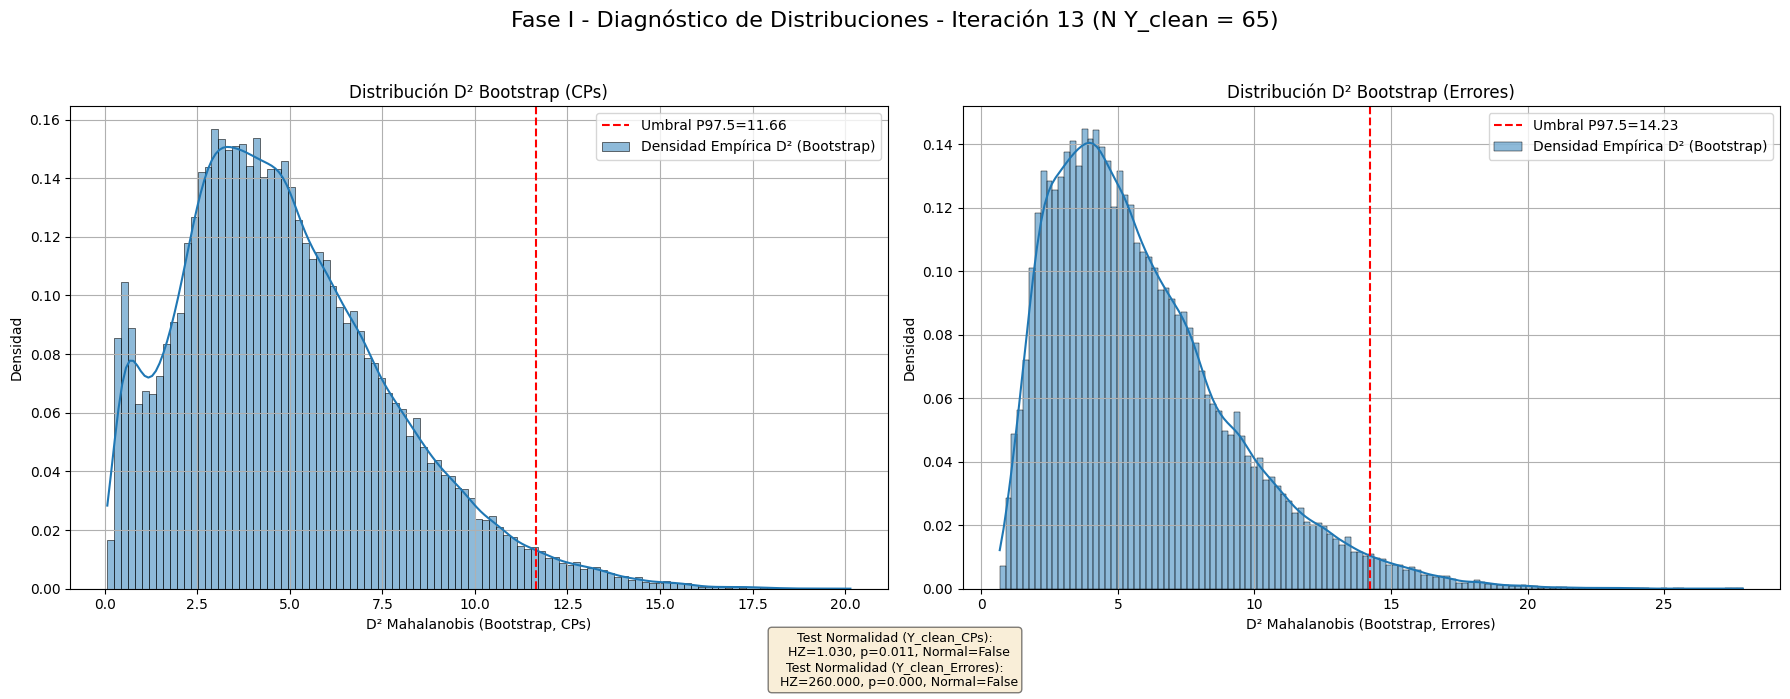

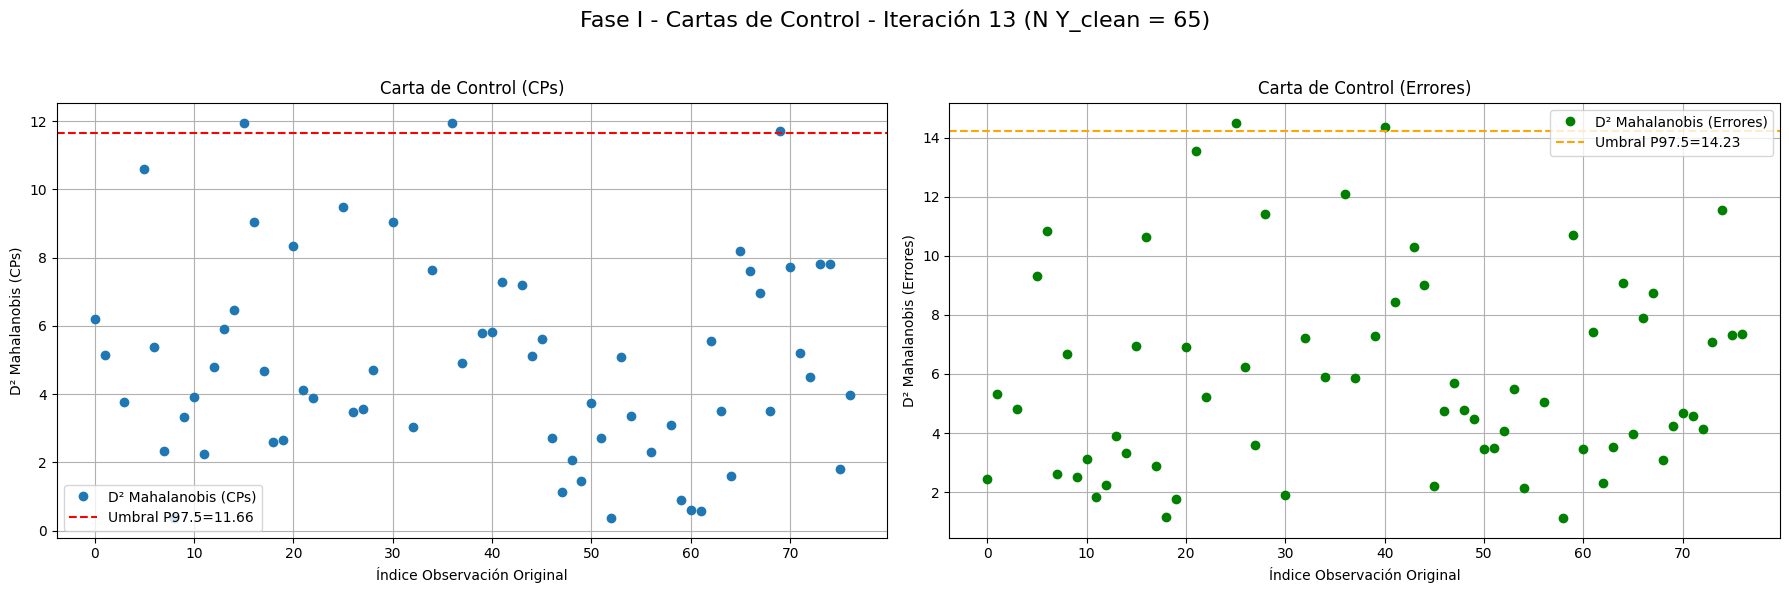

  Outlier combinado detectado: Índice original 15 (D²_CPs=11.96, D²_Errs=6.96). Eliminando.

Fase I - Iter Limpieza 14 (N Y_clean CPs: 64, N Y_clean Errs: 64)
  Test Normalidad (Iter14-CPs N=64, Vars=5): HZ=1.037, p-val=0.009 (Normal: False)
  Umbral CPs P97.500: 11.344
  Test Normalidad (Iter14-Errores N=64, Vars=11): HZ=256.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.222


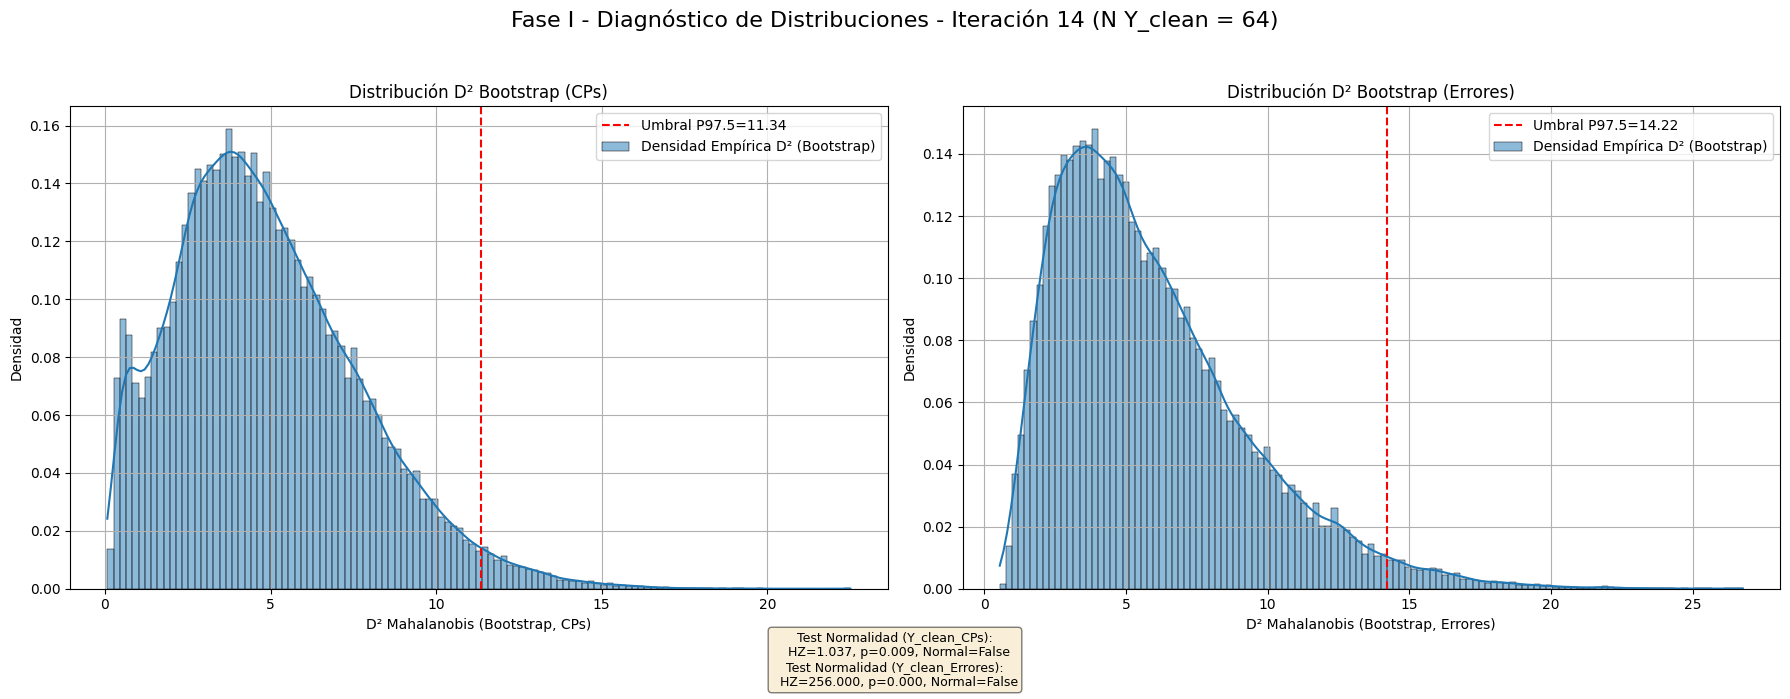

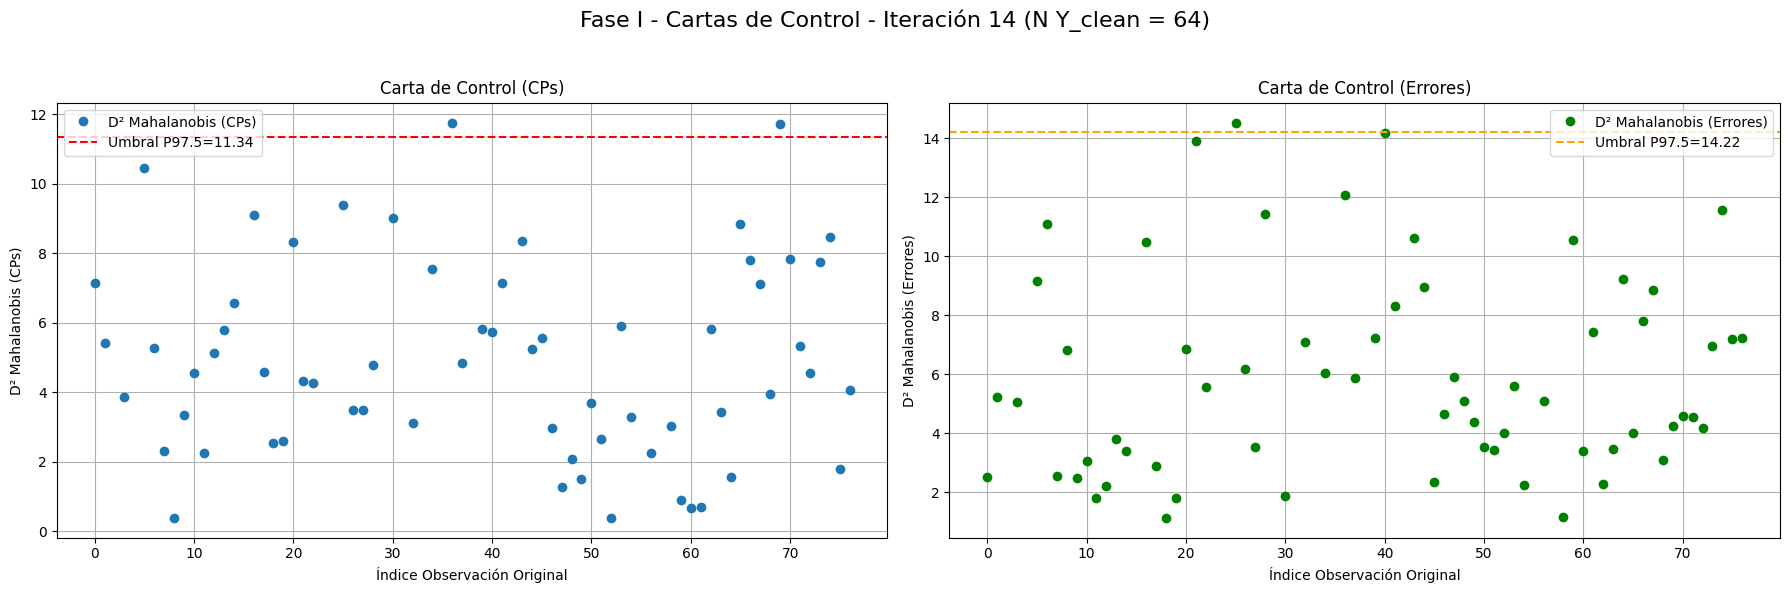

  Outlier combinado detectado: Índice original 36 (D²_CPs=11.75, D²_Errs=12.08). Eliminando.

Fase I - Iter Limpieza 15 (N Y_clean CPs: 63, N Y_clean Errs: 63)
  Test Normalidad (Iter15-CPs N=63, Vars=5): HZ=1.033, p-val=0.010 (Normal: False)
  Umbral CPs P97.500: 11.097
  Test Normalidad (Iter15-Errores N=63, Vars=11): HZ=252.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.280


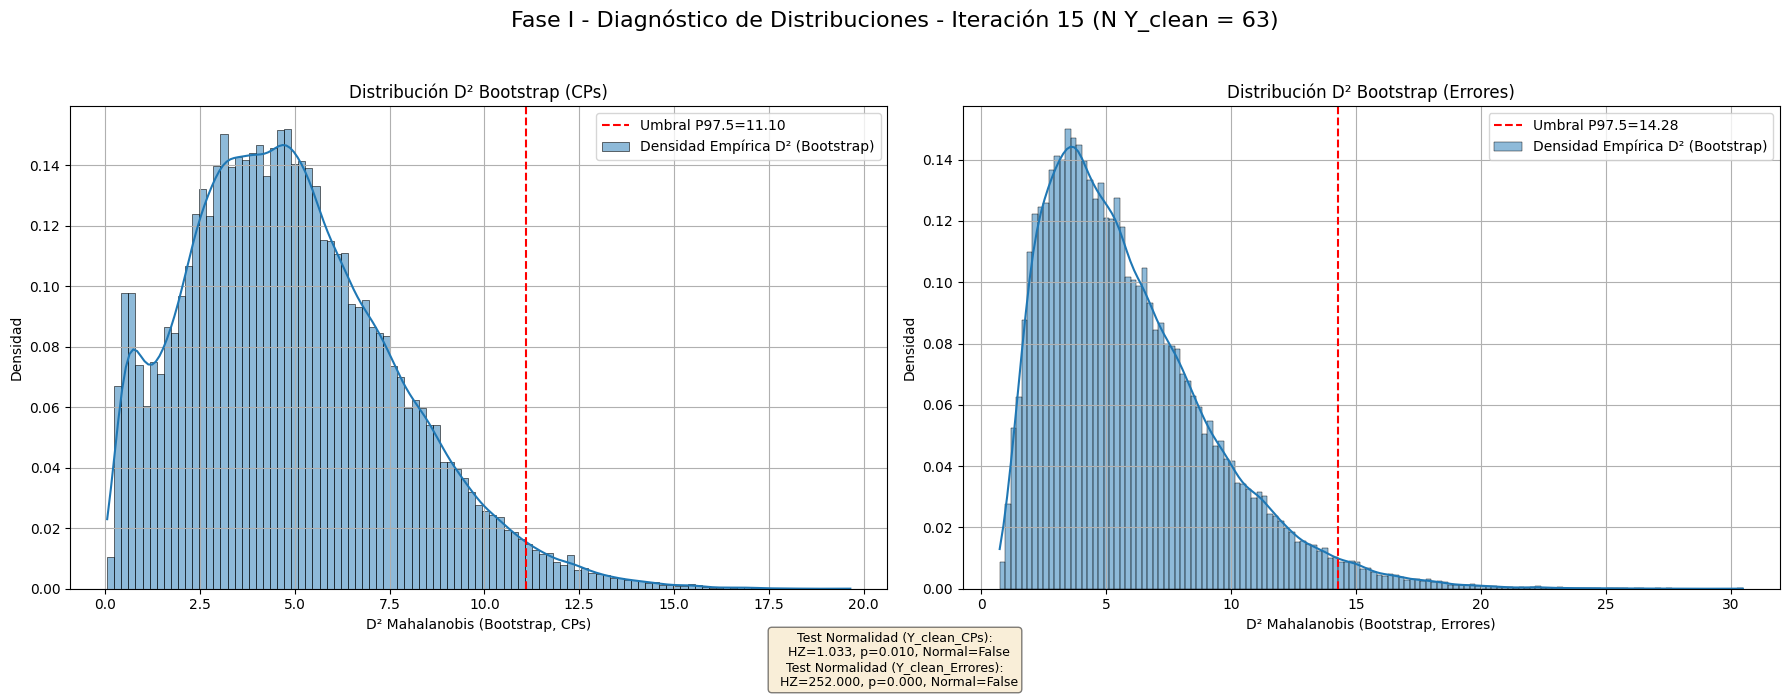

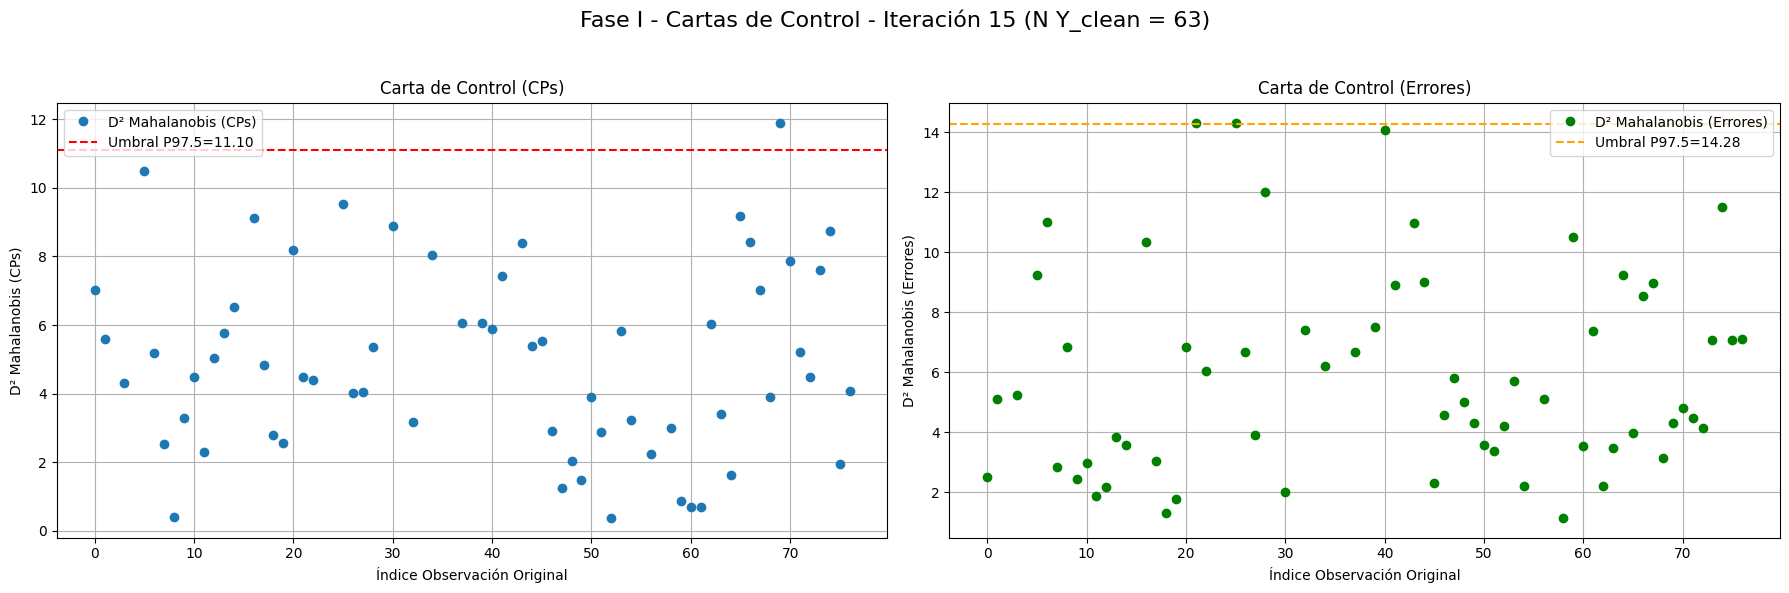

  Outlier combinado detectado: Índice original 69 (D²_CPs=11.90, D²_Errs=4.30). Eliminando.

Fase I - Iter Limpieza 16 (N Y_clean CPs: 62, N Y_clean Errs: 62)
  Test Normalidad (Iter16-CPs N=62, Vars=5): HZ=1.072, p-val=0.003 (Normal: False)
  Umbral CPs P97.500: 10.740
  Test Normalidad (Iter16-Errores N=62, Vars=11): HZ=248.000, p-val=0.000 (Normal: False)
  Umbral Errores P97.500: 14.136


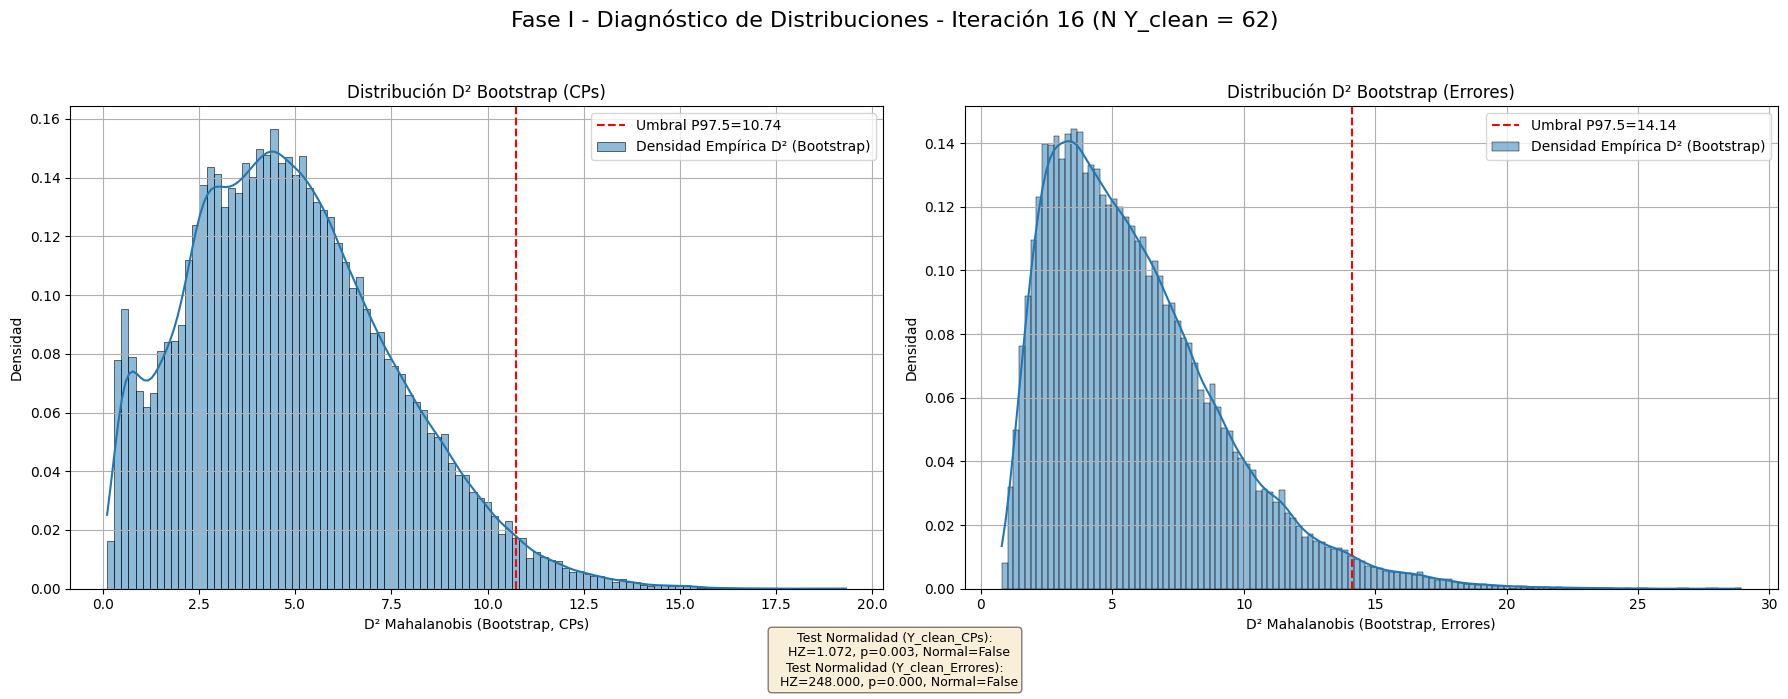

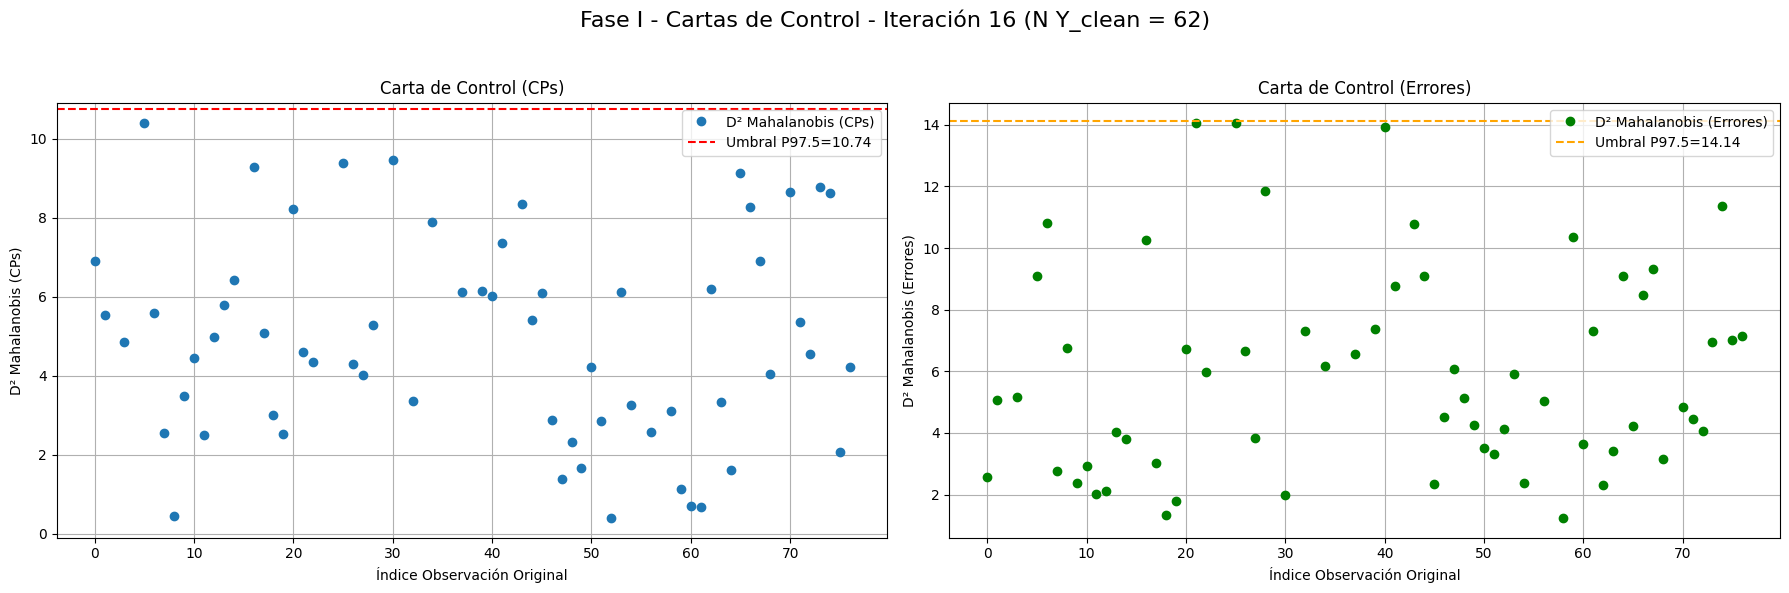

  No se detectaron outliers combinados. Fin limpieza.

Fase I - Finalizada. Índices eliminados: [4, np.int64(2), np.int64(38), np.int64(55), np.int64(31), np.int64(35), np.int64(24), np.int64(29), np.int64(33), np.int64(57), np.int64(42), np.int64(23), np.int64(15), np.int64(36), np.int64(69)]
Tamaños finales: Y_clean_cps: (62, 5), Y_clean_errors: (62, 11)
  Test Normalidad (Y_clean_CPs-Final N=62, Vars=5): HZ=1.072, p-val=0.003 (Normal: False)
Umbral Final CPs P97.500: 10.797
  Test Normalidad (Y_clean_Errs-Final N=62, Vars=11): HZ=248.000, p-val=0.000 (Normal: False)
Umbral Final Errores P97.500: 14.176

--- FASE II: Monitoreo Combinado (CPs y Errores) ---


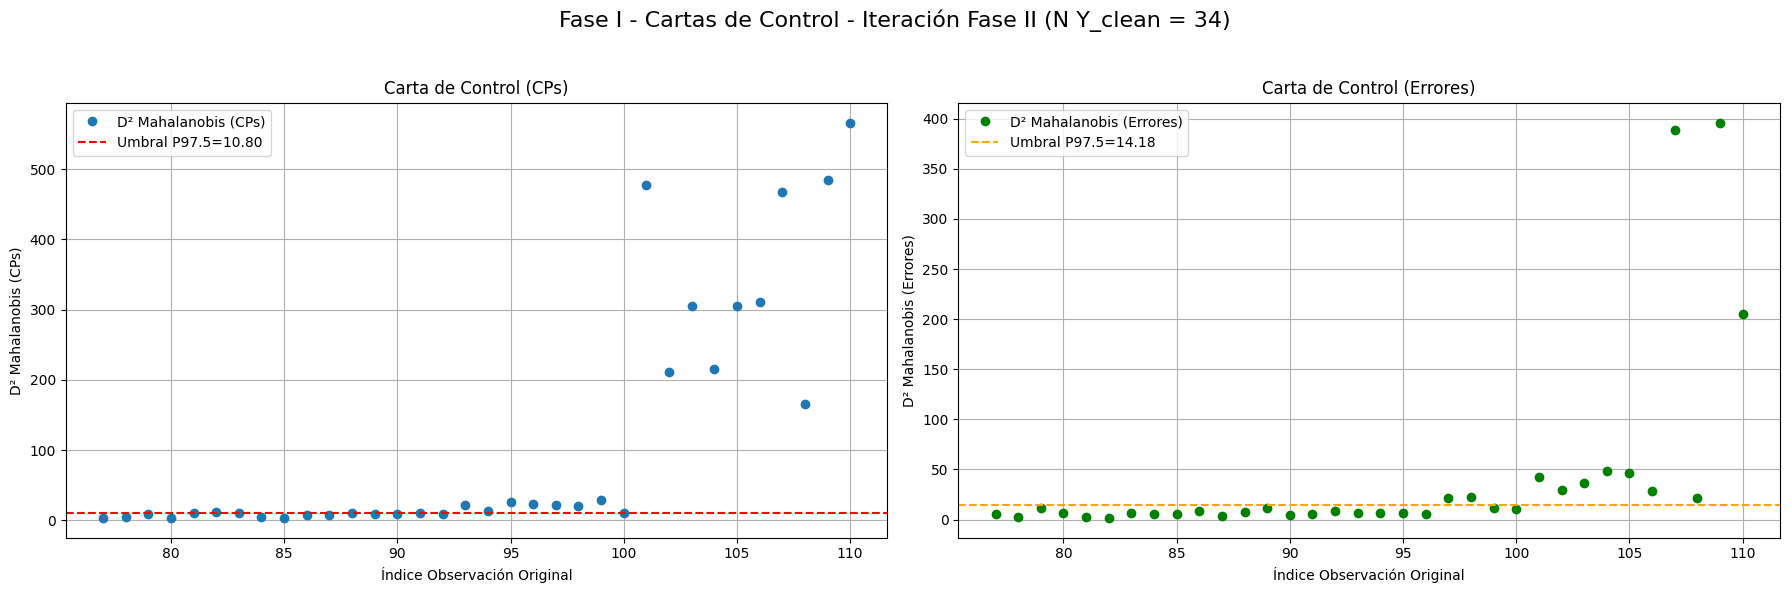

Resultados Monitoreo Fase II Combinado:
  Obs Z (idx 77): D²_CPs=3.90(IC), D²_Errs=6.02(IC) -> BAJO CONTROL
  Obs Z (idx 78): D²_CPs=4.36(IC), D²_Errs=3.05(IC) -> BAJO CONTROL
  Obs Z (idx 79): D²_CPs=8.70(IC), D²_Errs=11.05(IC) -> BAJO CONTROL
  Obs Z (idx 80): D²_CPs=3.41(IC), D²_Errs=6.41(IC) -> BAJO CONTROL
  Obs Z (idx 81): D²_CPs=10.65(IC), D²_Errs=2.91(IC) -> BAJO CONTROL
  Obs Z (idx 82): D²_CPs=11.27(OC), D²_Errs=1.60(IC) -> FUERA DE CONTROL
  Obs Z (idx 83): D²_CPs=10.92(OC), D²_Errs=6.66(IC) -> FUERA DE CONTROL
  Obs Z (idx 84): D²_CPs=5.09(IC), D²_Errs=5.48(IC) -> BAJO CONTROL
  Obs Z (idx 85): D²_CPs=3.88(IC), D²_Errs=5.12(IC) -> BAJO CONTROL
  Obs Z (idx 86): D²_CPs=7.00(IC), D²_Errs=8.39(IC) -> BAJO CONTROL
  Obs Z (idx 87): D²_CPs=7.06(IC), D²_Errs=3.66(IC) -> BAJO CONTROL
  Obs Z (idx 88): D²_CPs=9.84(IC), D²_Errs=7.99(IC) -> BAJO CONTROL
  Obs Z (idx 89): D²_CPs=9.41(IC), D²_Errs=11.56(IC) -> BAJO CONTROL
  Obs Z (idx 90): D²_CPs=8.84(IC), D²_Errs=4.83(IC) -> BAJO CON

In [22]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Configuración Global ---
CONFIG = {
    "data_file_path": "../data/cars.csv",
    "train_ratio": 0.7,
    "n_resamples_bootstrap": 1000, # Aumentar para percentiles más extremos
    "global_alpha_target": 0.05, # Alfa global deseado para el sistema combinado
    "max_iterations_phase1": 25,
    "min_obs_factor_for_bootstrap": 2,
    "min_obs_plus_for_normality_test": 5,
    "n_components_pca_plot": 2,
    "pca_variance_threshold": 0.90
}

# --- Funciones de Cálculo y Análisis Estadístico (sin cambios) ---
def calculate_mahalanobis_squared(data_df, mean_vec=None, inv_cov_matrix=None):
    # ... (código sin cambios)
    if not isinstance(data_df, pd.DataFrame) or data_df.empty or data_df.shape[1] == 0:
        return np.array([])
    data_values = data_df.values
    num_obs, num_vars = data_values.shape
    if mean_vec is None: mean_vec = np.mean(data_values, axis=0)
    if inv_cov_matrix is None:
        cov_matrix = np.cov(data_values.T)
        if num_obs <= num_vars or np.linalg.matrix_rank(cov_matrix) < num_vars or np.isclose(np.linalg.det(cov_matrix), 0):
            inv_cov_matrix = np.linalg.pinv(cov_matrix)
        elif np.linalg.cond(cov_matrix) < 1/np.finfo(cov_matrix.dtype).eps:
            inv_cov_matrix = np.linalg.inv(cov_matrix)
        else:
            inv_cov_matrix = np.linalg.pinv(cov_matrix)
    diffs = data_values - mean_vec
    if diffs.ndim == 1: diffs = diffs.reshape(1, -1)
    try:
        d_squared = np.diag(diffs @ inv_cov_matrix @ diffs.T)
    except ValueError as e:
        return np.array([])
    return d_squared

def get_empirical_threshold_and_distribution(data_df, n_resamples, percentile, num_features):
    # ... (código sin cambios)
    if not isinstance(data_df, pd.DataFrame) or data_df.empty: return np.inf, []
    num_obs = data_df.shape[0]
    if num_obs <= num_features or num_features == 0: return np.inf, []
    all_bootstrap_d_squared = []
    data_values = data_df.values
    for _ in range(n_resamples):
        indices = np.random.choice(num_obs, size=num_obs, replace=True)
        if len(np.unique(indices)) <= num_features : continue
        bootstrap_sample_df = data_df.iloc[indices]
        d_squared_boot = calculate_mahalanobis_squared(bootstrap_sample_df)
        if d_squared_boot.size > 0: all_bootstrap_d_squared.extend(d_squared_boot)
    if not all_bootstrap_d_squared: return np.inf, []
    return np.percentile(all_bootstrap_d_squared, percentile), all_bootstrap_d_squared

def get_multivariate_normality_test_results(data_df, num_features, title_suffix_for_print=""):
    # ... (código sin cambios)
    if data_df.empty or data_df.shape[0] <= num_features or num_features == 0:
        return None
    normality_results_obj = None
    try:
        min_samples_needed = num_features + CONFIG["min_obs_plus_for_normality_test"]
        if data_df.shape[0] > min_samples_needed:
            normality_results_obj = pg.multivariate_normality(data_df, alpha=0.05)
            pval = normality_results_obj.pval
            is_normal = normality_results_obj.normal
            hz_stat = normality_results_obj.hz
            print(f"  Test Normalidad ({title_suffix_for_print} N={len(data_df)}, Vars={num_features}): HZ={hz_stat:.3f}, p-val={pval:.3f} (Normal: {is_normal})")
    except AttributeError as ae:
        print(f"  Test Normalidad ({title_suffix_for_print} N={len(data_df)}): No se pudo obtener resultado o error de atributo: {ae}")
        normality_results_obj = None
    except Exception as e:
        print(f"  Error test normalidad ({title_suffix_for_print} N={len(data_df)}): {e}")
        normality_results_obj = None
    return normality_results_obj

# --- Funciones de Visualización MODIFICADAS/NUEVAS para Fase I ---
def plot_phase1_iteration_diagnostics_distributions(
    bootstrap_cps_data, threshold_cps, normality_cps_obj,
    bootstrap_errors_data, threshold_errors, normality_errors_obj,
    iteration_num, N_current, target_percentile
):
    """Muestra las dos distribuciones de bootstrap (CPs y Errores) y tests de normalidad."""
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle(f"Fase I - Diagnóstico de Distribuciones - Iteración {iteration_num} (N Y_clean = {N_current})", fontsize=16)

    # Subplot Izquierdo: CPs
    ax_left = axes[0]
    if bootstrap_cps_data:
        sns.histplot(bootstrap_cps_data, kde=True, stat="density", ax=ax_left, label="Densidad Empírica D² (Bootstrap)")
        ax_left.axhline(y=0, color='black', linewidth=0.5)
        ax_left.axvline(threshold_cps, color='red', linestyle='--',
                        label=f'Umbral P{target_percentile}={threshold_cps:.2f}')
        ax_left.legend()
    ax_left.set_xlabel("D² Mahalanobis (Bootstrap, CPs)")
    ax_left.set_ylabel("Densidad")
    ax_left.set_title("Distribución D² Bootstrap (CPs)")
    ax_left.grid(True)

    # Subplot Derecho: Errores
    ax_right = axes[1]
    if bootstrap_errors_data:
        sns.histplot(bootstrap_errors_data, kde=True, stat="density", ax=ax_right, label="Densidad Empírica D² (Bootstrap)")
        ax_right.axhline(y=0, color='black', linewidth=0.5)
        ax_right.axvline(threshold_errors, color='red', linestyle='--',
                         label=f'Umbral P{target_percentile}={threshold_errors:.2f}')
        ax_right.legend()
    ax_right.set_xlabel("D² Mahalanobis (Bootstrap, Errores)")
    ax_right.set_ylabel("Densidad")
    ax_right.set_title("Distribución D² Bootstrap (Errores)")
    ax_right.grid(True)

    # Texto con resultados de Tests de Normalidad
    normality_text_cps = "Test Normalidad (Y_clean_CPs):\n"
    if normality_cps_obj:
        try:
            normality_text_cps += f"  HZ={normality_cps_obj.hz:.3f}, p={normality_cps_obj.pval:.3f}, Normal={normality_cps_obj.normal}"
        except AttributeError: normality_text_cps += "  Error al acceder a atributos."
    else: normality_text_cps += "  No realizado/disponible."

    normality_text_err = "Test Normalidad (Y_clean_Errores):\n"
    if normality_errors_obj:
        try:
            normality_text_err += f"  HZ={normality_errors_obj.hz:.3f}, p={normality_errors_obj.pval:.3f}, Normal={normality_errors_obj.normal}"
        except AttributeError: normality_text_err += "  Error al acceder a atributos."
    else: normality_text_err += "  No realizado/disponible."

    combined_text = normality_text_cps + "\n" + normality_text_err
    fig.text(0.5, 0.01, combined_text, ha='center', va='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))

    plt.tight_layout(rect=[0, 0.07, 1, 0.95]) # Ajustar para texto
    plt.show()

def plot_phase1_control_charts(
    d_sq_cps, threshold_cps, indices_cps,
    d_sq_errs, threshold_errors, indices_errors,
    iteration_num, N_current, target_percentile
):
    """Muestra las dos cartas de control (D² vs umbral para CPs y Errores)."""
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f"Fase I - Cartas de Control - Iteración {iteration_num} (N Y_clean = {N_current})", fontsize=16)

    # Subplot Izquierdo: CPs
    ax_left = axes[0]
    ax_left.plot(indices_cps, d_sq_cps, marker='o', linestyle='', label='D² Mahalanobis (CPs)')
    ax_left.axhline(y=threshold_cps, color='red', linestyle='--', label=f'Umbral P{target_percentile}={threshold_cps:.2f}')
    ax_left.set_xlabel("Índice Observación Original")
    ax_left.set_ylabel("D² Mahalanobis (CPs)")
    ax_left.set_title("Carta de Control (CPs)")
    ax_left.legend(); ax_left.grid(True)

    # Subplot Derecho: Errores
    ax_right = axes[1]
    ax_right.plot(indices_errors, d_sq_errs, marker='o', linestyle='', label='D² Mahalanobis (Errores)', color='green')
    ax_right.axhline(y=threshold_errors, color='orange', linestyle='--', label=f'Umbral P{target_percentile}={threshold_errors:.2f}')
    ax_right.set_xlabel("Índice Observación Original")
    ax_right.set_ylabel("D² Mahalanobis (Errores)")
    ax_right.set_title("Carta de Control (Errores)")
    ax_right.legend(); ax_right.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# --- FASE 0 y Selección de CP (sin cambios) ---
# ... (perform_phase0_classical_pca, select_pca_components_and_calculate_error)
def perform_phase0_classical_pca(df_data, num_features_to_plot=2):
    print("\n--- FASE 0: PCA Clásico Exploratorio ---")
    if df_data.empty or df_data.shape[1] == 0: return None, None, None
    original_indices = df_data.index
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df_data) 
    pca_input_df = pd.DataFrame(data_scaled, index=original_indices, columns=df_data.columns)
    pca = PCA(n_components=None) 
    pca_scores_all_components_array = pca.fit_transform(pca_input_df)
    pca_scores_df = pd.DataFrame(pca_scores_all_components_array, 
                                 columns=[f'PC{i+1}' for i in range(pca_scores_all_components_array.shape[1])],
                                 index=original_indices)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    print(f"  Varianza explicada por cada componente (PCA Clásico):")
    for i, ratio in enumerate(explained_variance_ratio):
        print(f"    PC{i+1}: {ratio:.4f} (Acumulada: {cumulative_explained_variance[i]:.4f})")
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.title('Fase 0: Varianza Explicada Acumulada (PCA Clásico)')
    plt.xlabel('Número de Componentes Principales'); plt.ylabel('Varianza Explicada Acumulada')
    plt.grid(True); plt.axhline(y=CONFIG["pca_variance_threshold"], color='g', linestyle=':', label=f'{CONFIG["pca_variance_threshold"]*100:.0f}% Varianza'); plt.legend(); plt.show()
    if pca_scores_df.shape[1] >= num_features_to_plot and num_features_to_plot >= 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_scores_df.iloc[:, 0], pca_scores_df.iloc[:, 1], alpha=0.7)
        plt.xlabel(f'{pca_scores_df.columns[0]} ({explained_variance_ratio[0]:.2f})'); plt.ylabel(f'{pca_scores_df.columns[1]} ({explained_variance_ratio[1]:.2f})')
        plt.title(f'Fase 0: Scatter Plot de las Primeras 2 CPs (PCA Clásico)'); plt.grid(True); plt.axhline(0, color='black', lw=0.5); plt.axvline(0, color='black', lw=0.5); plt.show()
    return pca, pca_scores_df, data_scaled 

def select_pca_components_and_calculate_error(pca_object, pca_scores_all_df, data_scaled_original, variance_threshold):
    # ... (código sin cambios, ya corregido antes)
    if pca_object is None or pca_scores_all_df is None or data_scaled_original is None:
        return None, [], None, []
    cumulative_explained_variance = np.cumsum(pca_object.explained_variance_ratio_)
    n_components_to_select = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
    print(f"\n--- Selección de CPs y Cálculo de Error de Reconstrucción ---")
    print(f"  Umbral de varianza: {variance_threshold*100:.0f}%. CPs seleccionadas: {n_components_to_select} (explican {cumulative_explained_variance[n_components_to_select-1]:.4f})")
    selected_pc_columns = pca_scores_all_df.columns[:n_components_to_select]
    df_pca_selected = pca_scores_all_df[selected_pc_columns].copy()
    if n_components_to_select <= pca_object.components_.shape[0] :
        scores_subset = pca_scores_all_df.iloc[:, :n_components_to_select].values
        loadings_subset = pca_object.components_[:n_components_to_select, :]
        X_hat_scaled = np.dot(scores_subset, loadings_subset)
    else: 
        X_hat_scaled = pca_object.inverse_transform(pca_scores_all_df.values)
    error_matrix_array = data_scaled_original - X_hat_scaled
    original_feature_names = None
    if hasattr(pca_object, 'feature_names_in_') and pca_object.feature_names_in_ is not None:
        original_feature_names = pca_object.feature_names_in_
    elif hasattr(pca_object, 'n_features_in_'):
        original_feature_names = [f'OrigFeat{i+1}' for i in range(pca_object.n_features_in_)]
    else:
        original_feature_names = [f'OrigFeat{i+1}' for i in range(data_scaled_original.shape[1])]
    if error_matrix_array.shape[1] == len(original_feature_names):
        error_column_names = [f'Err_{col}' for col in original_feature_names]
    else:
        print(f"Advertencia: Discrepancia en nro feat orig ({len(original_feature_names)}) y cols error ({error_matrix_array.shape[1]}). Nombres genéricos para error.")
        error_column_names = [f'Err_Var{i+1}' for i in range(error_matrix_array.shape[1])]
    df_errors = pd.DataFrame(error_matrix_array, columns=error_column_names, index=pca_scores_all_df.index)
    print(f"  Dimensiones DataFrame CPs seleccionadas: {df_pca_selected.shape}")
    print(f"  Dimensiones DataFrame Errores reconstrucción: {df_errors.shape}")
    return df_pca_selected, df_pca_selected.columns.tolist(), df_errors, df_errors.columns.tolist()

# --- Funciones de Lógica Principal (load_and_preprocess_data, split_data_for_two_dfs sin cambios) ---
# ... (load_and_preprocess_data, split_data_for_two_dfs)
def load_and_preprocess_data(file_path):
    print(f"--- Cargando y Preprocesando Datos: {file_path.split('/')[-1]} ---")
    try: df_raw = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: Archivo no encontrado en '{file_path}'. Saliendo.")
        return None, []
    df_numeric = df_raw.select_dtypes(include=np.number)
    if df_numeric.empty: print("No se encontraron columnas numéricas. Saliendo."); return None, []
    features = df_numeric.columns.tolist()
    df_processed = df_numeric.dropna().copy()
    print(f"Datos cargados: {len(df_raw)} filas. Numéricas originales: {len(features)} cols. Post-NaN: {len(df_processed)} filas.")
    if len(df_processed) < 2 * len(features):
        print(f"Datos insuficientes post-NaN ({len(df_processed)} filas) para {len(features)} var. orig. Saliendo."); return None, []
    return df_processed, features

def split_data_for_two_dfs(df1, df2, train_ratio, num_features_df1, num_features_df2):
    n_total = len(df1)
    if len(df1) != len(df2):
        raise ValueError("Los DataFrames para dividir deben tener la misma longitud.")
    n_fase1 = int(n_total * train_ratio)
    n_fase2 = n_total - n_fase1
    if n_fase1 <= num_features_df1 or n_fase1 <= num_features_df2 or n_fase2 <= 0:
        print(f"División Fase I/II no ideal (N1:{n_fase1}, N2:{n_fase2}, Feats1:{num_features_df1}, Feats2:{num_features_df2}). Usando todos para Fase I.")
        df1_fase1, df1_fase2 = df1.copy(), pd.DataFrame(columns=df1.columns)
        df2_fase1, df2_fase2 = df2.copy(), pd.DataFrame(columns=df2.columns)
    else:
        df1_fase1, df1_fase2 = df1.iloc[:n_fase1].copy(), df1.iloc[n_fase1:].copy()
        df2_fase1, df2_fase2 = df2.iloc[:n_fase1].copy(), df2.iloc[n_fase1:].copy()
    print(f"División datos (CPs y Errores): Fase I N={len(df1_fase1)}, Fase II N={len(df1_fase2)}")
    return df1_fase1, df1_fase2, df2_fase1, df2_fase2

# --- FASE 1 MODIFICADA ---
def perform_phase1_iterations_combined(
    initial_data_cps, initial_data_errors, 
    num_selected_cps, num_error_features, 
    config
):
    print(f"\n--- FASE I: Establecimiento de Parámetros (sobre {num_selected_cps} CPs y {num_error_features} Errores) ---")
    if initial_data_cps.shape[0] <= num_selected_cps or initial_data_errors.shape[0] <= num_error_features:
        print(f"  Datos insuficientes para CPs (N={initial_data_cps.shape[0]}) o Errores (N={initial_data_errors.shape[0]}).")
        return initial_data_cps, initial_data_errors, None, None, None, None, np.inf, np.inf

    # Calcular el percentil individual basado en el alfa global y el número de "pruebas" (k=2)
    k_tests = 2 # Una para CPs, una para Errores
    individual_alpha = config["global_alpha_target"] / k_tests
    individual_target_percentile = (1 - individual_alpha) * 100 # Convertir a porcentaje
    
    print(f"  Alfa global objetivo: {config['global_alpha_target']:.4f}, Alfa individual por prueba (Bonferroni): {individual_alpha:.4f}")
    print(f"  Percentil objetivo individual para umbrales bootstrap: {individual_target_percentile:.3f}%")


    norm_cps_initial = get_multivariate_normality_test_results(initial_data_cps, num_selected_cps, "FaseI-Orig-CPs")
    norm_errs_initial = get_multivariate_normality_test_results(initial_data_errors, num_error_features, "FaseI-Orig-Errs")
    
    Y_clean_cps = initial_data_cps.copy()
    Y_clean_errors = initial_data_errors.copy()
    removed_indices_log = []

    for i in range(config["max_iterations_phase1"]):
        print(f"\nFase I - Iter Limpieza {i+1} (N Y_clean CPs: {Y_clean_cps.shape[0]}, N Y_clean Errs: {Y_clean_errors.shape[0]})")
        n_current = Y_clean_cps.shape[0]

        if n_current <= num_selected_cps or n_current <= num_error_features :
            print(f"  Datos insuficientes (N={n_current}). Fin limpieza.")
            break
        
        norm_cps_iter = get_multivariate_normality_test_results(Y_clean_cps, num_selected_cps, f"Iter{i+1}-CPs")
        d_sq_cps = calculate_mahalanobis_squared(Y_clean_cps)
        if d_sq_cps.size == 0: print(f"  Error D² CPs. Fin limpieza."); break
        if n_current <= num_selected_cps * config["min_obs_factor_for_bootstrap"]: print(f"  Pocos datos CPs para bootstrap. Fin."); break
        # Usar el percentil individual calculado
        thresh_cps, bootstrap_cps_data = get_empirical_threshold_and_distribution(
            Y_clean_cps, config["n_resamples_bootstrap"], individual_target_percentile, num_selected_cps
        )
        if not bootstrap_cps_data or thresh_cps == np.inf: print(f"  Error bootstrap CPs. Fin."); break
        print(f"  Umbral CPs P{individual_target_percentile:.3f}: {thresh_cps:.3f}")

        norm_errs_iter = get_multivariate_normality_test_results(Y_clean_errors, num_error_features, f"Iter{i+1}-Errores")
        d_sq_errs = calculate_mahalanobis_squared(Y_clean_errors)
        if d_sq_errs.size == 0: print(f"  Error D² Errores. Fin limpieza."); break
        if n_current <= num_error_features * config["min_obs_factor_for_bootstrap"]: print(f"  Pocos datos Errores para bootstrap. Fin."); break
        # Usar el percentil individual calculado
        thresh_errs, bootstrap_errors_data = get_empirical_threshold_and_distribution(
            Y_clean_errors, config["n_resamples_bootstrap"], individual_target_percentile, num_error_features
        )
        if not bootstrap_errors_data or thresh_errs == np.inf: print(f"  Error bootstrap Errores. Fin."); break
        print(f"  Umbral Errores P{individual_target_percentile:.3f}: {thresh_errs:.3f}")

        plot_phase1_iteration_diagnostics_distributions(
            bootstrap_cps_data, thresh_cps, norm_cps_iter,
            bootstrap_errors_data, thresh_errs, norm_errs_iter,
            i+1, n_current, individual_target_percentile # Usar percentil individual para el plot
        )
        plot_phase1_control_charts(
            d_sq_cps, thresh_cps, Y_clean_cps.index,
            d_sq_errs, thresh_errs, Y_clean_errors.index,
            i+1, n_current, individual_target_percentile # Usar percentil individual para el plot
        )
        
        # ... (resto de la lógica de outliers y fin de bucle sin cambios) ...
        outliers_cps_mask = d_sq_cps > thresh_cps
        outliers_errs_mask = d_sq_errs > thresh_errs
        combined_outliers_mask = outliers_cps_mask | outliers_errs_mask

        if not np.any(combined_outliers_mask):
            print(f"  No se detectaron outliers combinados. Fin limpieza.")
            break
        else:
            candidate_indices_in_current_set = np.where(combined_outliers_mask)[0]
            relative_deviations = np.zeros(len(candidate_indices_in_current_set))
            for k_idx, local_idx_of_candidate in enumerate(candidate_indices_in_current_set):
                dev_cps = (d_sq_cps[local_idx_of_candidate] / thresh_cps) if outliers_cps_mask[local_idx_of_candidate] and thresh_cps > 0 and thresh_cps != np.inf else 0
                dev_errs = (d_sq_errs[local_idx_of_candidate] / thresh_errs) if outliers_errs_mask[local_idx_of_candidate] and thresh_errs > 0 and thresh_errs != np.inf else 0
                relative_deviations[k_idx] = max(dev_cps, dev_errs)
            
            idx_max_relative_deviation = np.argmax(relative_deviations)
            idx_in_current_set_to_remove = candidate_indices_in_current_set[idx_max_relative_deviation]
            original_index_to_remove = Y_clean_cps.index[idx_in_current_set_to_remove]

            print(f"  Outlier combinado detectado: Índice original {original_index_to_remove} (D²_CPs={d_sq_cps[idx_in_current_set_to_remove]:.2f}, D²_Errs={d_sq_errs[idx_in_current_set_to_remove]:.2f}). Eliminando.")
            Y_clean_cps = Y_clean_cps.drop(index=original_index_to_remove)
            Y_clean_errors = Y_clean_errors.drop(index=original_index_to_remove)
            removed_indices_log.append(original_index_to_remove)
    else: 
        print(f"Se alcanzó el máximo de iteraciones ({config['max_iterations_phase1']}).")
        if 'd_sq_cps' in locals() and 'thresh_cps' in locals() and 'd_sq_errs' in locals() and 'thresh_errs' in locals():
             if np.any((d_sq_cps > thresh_cps) | (d_sq_errs > thresh_errs)): print("Advertencia: Podrían quedar outliers.")

    print(f"\nFase I - Finalizada. Índices eliminados: {removed_indices_log if removed_indices_log else 'Ninguno'}")
    print(f"Tamaños finales: Y_clean_cps: {Y_clean_cps.shape}, Y_clean_errors: {Y_clean_errors.shape}")


    # Calcular parámetros finales para CPs
    mean_cps, inv_cov_cps, final_thresh_cps = None, None, np.inf
    if not Y_clean_cps.empty and Y_clean_cps.shape[0] > num_selected_cps:
        _ = get_multivariate_normality_test_results(Y_clean_cps, num_selected_cps, "Y_clean_CPs-Final")
        mean_cps = np.mean(Y_clean_cps.values, axis=0)
        cov_cps = np.cov(Y_clean_cps.values.T)
        if Y_clean_cps.shape[0] <= num_selected_cps or np.linalg.matrix_rank(cov_cps) < num_selected_cps or np.isclose(np.linalg.det(cov_cps),0): inv_cov_cps = np.linalg.pinv(cov_cps)
        elif np.linalg.cond(cov_cps) < 1/np.finfo(cov_cps.dtype).eps: inv_cov_cps = np.linalg.inv(cov_cps)
        else: inv_cov_cps = np.linalg.pinv(cov_cps)
        # Usar el percentil individual calculado para el umbral final también
        final_thresh_cps, _ = get_empirical_threshold_and_distribution(
            Y_clean_cps, config["n_resamples_bootstrap"], individual_target_percentile, num_selected_cps
        )
        cps_thresh_str = f"{final_thresh_cps:.3f}" if final_thresh_cps != np.inf else "Inf"
        print(f"Umbral Final CPs P{individual_target_percentile:.3f}: {cps_thresh_str}")
    else: print("Y_clean_cps final sin datos suficientes.")

    # Calcular parámetros finales para Errores
    mean_errs, inv_cov_errs, final_thresh_errs = None, None, np.inf
    if not Y_clean_errors.empty and Y_clean_errors.shape[0] > num_error_features:
        _ = get_multivariate_normality_test_results(Y_clean_errors, num_error_features, "Y_clean_Errs-Final")
        mean_errs = np.mean(Y_clean_errors.values, axis=0)
        cov_errs = np.cov(Y_clean_errors.values.T)
        if Y_clean_errors.shape[0] <= num_error_features or np.linalg.matrix_rank(cov_errs) < num_error_features or np.isclose(np.linalg.det(cov_errs),0) : inv_cov_errs = np.linalg.pinv(cov_errs)
        elif np.linalg.cond(cov_errs) < 1/np.finfo(cov_errs.dtype).eps: inv_cov_errs = np.linalg.inv(cov_errs)
        else: inv_cov_errs = np.linalg.pinv(cov_errs)
        # Usar el percentil individual calculado para el umbral final también
        final_thresh_errs, _ = get_empirical_threshold_and_distribution(
            Y_clean_errors, config["n_resamples_bootstrap"], individual_target_percentile, num_error_features
        )
        errs_thresh_str = f"{final_thresh_errs:.3f}" if final_thresh_errs != np.inf else "Inf"
        print(f"Umbral Final Errores P{individual_target_percentile:.3f}: {errs_thresh_str}")
    else: print("Y_clean_errors final sin datos suficientes.")
        
    return Y_clean_cps, Y_clean_errors, mean_cps, inv_cov_cps, mean_errs, inv_cov_errs, final_thresh_cps, final_thresh_errs


# --- FASE 2 MODIFICADA (sin cambios estructurales, solo nombres de variables para claridad) ---
# --- FASE 2 MODIFICADA ---
def perform_phase2_monitoring_combined(
    data_fase2_cps, data_fase2_errors,
    mean_cps, inv_cov_cps, thresh_cps,
    mean_errs, inv_cov_errs, thresh_errs,
    config # config se pasa aquí
):
    print(f"\n--- FASE II: Monitoreo Combinado (CPs y Errores) ---")
    if data_fase2_cps.empty or data_fase2_errors.empty: print("No hay datos Fase II."); return
    if mean_cps is None or mean_errs is None or thresh_cps == np.inf or thresh_errs == np.inf : 
        print("Parámetros Fase I no disponibles o umbrales infinitos. No se puede monitorear.")
        return

    d_sq_Z_cps = calculate_mahalanobis_squared(data_fase2_cps, mean_cps, inv_cov_cps)
    d_sq_Z_errs = calculate_mahalanobis_squared(data_fase2_errors, mean_errs, inv_cov_errs)

    if d_sq_Z_cps.size == 0 or d_sq_Z_errs.size == 0: print("Error D² Fase II."); return

    # Calcular el percentil individual para los plots de Fase II, basado en el alfa global
    # Esto asegura que los plots usen el mismo criterio de percentil que los umbrales de Fase I
    k_tests = 2 
    individual_alpha_phase2 = config["global_alpha_target"] / k_tests
    individual_target_percentile_phase2 = (1 - individual_alpha_phase2) * 100

    plot_phase1_control_charts( # Reutilizamos esta función para mostrar las cartas de control
        d_sq_Z_cps, thresh_cps, data_fase2_cps.index,
        d_sq_Z_errs, thresh_errs, data_fase2_errors.index,
        iteration_num="Fase II", 
        N_current=len(data_fase2_cps), 
        target_percentile=individual_target_percentile_phase2 # Usar el percentil calculado
    )
    outliers_Z_count = 0
    print("Resultados Monitoreo Fase II Combinado:")
    for i in range(len(data_fase2_cps)):
        idx = data_fase2_cps.index[i]
        status_cps = "OC" if d_sq_Z_cps[i] > thresh_cps else "IC"
        status_errs = "OC" if d_sq_Z_errs[i] > thresh_errs else "IC"
        final_status = "FUERA DE CONTROL" if (status_cps == "OC" or status_errs == "OC") else "BAJO CONTROL"
        if final_status == "FUERA DE CONTROL": outliers_Z_count +=1
        print(f"  Obs Z (idx {idx}): D²_CPs={d_sq_Z_cps[i]:.2f}({status_cps}), D²_Errs={d_sq_Z_errs[i]:.2f}({status_errs}) -> {final_status}")
    print(f"Fase II: {outliers_Z_count} de {len(data_fase2_cps)} obs. fuera de control (combinado).")

# --- MAIN MODIFICADO ---
def main():
    # ... (código sin cambios hasta la llamada a Fase I)
    print("--- INICIO ANÁLISIS DE CONTROL MULTIVARIADO (CPs y ERRORES) ---")
    df_processed_original_features, _ = load_and_preprocess_data(CONFIG["data_file_path"])
    if df_processed_original_features is None: return

    pca_model, pca_scores_all_df, data_scaled = perform_phase0_classical_pca(
        df_processed_original_features, CONFIG["n_components_pca_plot"]
    )
    if pca_model is None or data_scaled is None:
        print("Proceso terminado: problemas en Fase 0 PCA o data_scaled no disponible.")
        return
        
    df_cps_selected, selected_cp_names, df_errors, error_feature_names = select_pca_components_and_calculate_error(
        pca_model, pca_scores_all_df, data_scaled, CONFIG["pca_variance_threshold"]
    )
    if df_cps_selected is None or df_errors is None: 
        print("Proceso terminado: no se pudieron seleccionar CPs o calcular errores.")
        return
        
    num_selected_cps = len(selected_cp_names)
    num_error_features = len(error_feature_names)

    cps_fase1, cps_fase2, errors_fase1, errors_fase2 = split_data_for_two_dfs(
        df_cps_selected, df_errors, CONFIG["train_ratio"], num_selected_cps, num_error_features
    )

    Y_cps_clean, Y_errs_clean, \
    mean_cps, inv_cov_cps, mean_errs, inv_cov_errs, \
    final_thresh_cps, final_thresh_errs = perform_phase1_iterations_combined(
        cps_fase1, errors_fase1, num_selected_cps, num_error_features, CONFIG
    )
    
    perform_phase2_monitoring_combined(
        cps_fase2, errors_fase2,
        mean_cps, inv_cov_cps, final_thresh_cps,
        mean_errs, inv_cov_errs, final_thresh_errs,
        CONFIG
    )
    print("\n--- ANÁLISIS COMPLETADO ---")

if __name__ == "__main__":
    main()

## Clasificación - Wine


A continuación se detalla la base matemática de cada uno de los cinco algoritmos de clasificación utilizados. Para todas las formulaciones, consideraremos un conjunto de datos de entrenamiento con $n$ muestras $\{(\mathbf{x}_i, y_i)\}_{i=1}^n$, donde $\mathbf{x}_i \in \mathbb{R}^p$ es el vector de $p$ características y $y_i \in \{1, 2, \dots, K\}$ es la etiqueta de la clase.

### 1. Clasificador por Profundidad de Mahalanobis

**Objetivo Principal:**
Clasificar un nuevo punto en la clase con respecto a la cual es más "central" o "profundo". La máxima profundidad corresponde a la mínima distancia de Mahalanobis.

**Supuestos:**
El modelo no asume una distribución de probabilidad específica, pero funciona mejor cuando las nubes de puntos de cada clase tienen una forma elipsoidal que puede ser caracterizada por una media y una matriz de covarianza.

**Formulación Matemática:**
1.  Para cada clase $k \in \{1, \dots, K\}$, se calculan su vector de medias $\boldsymbol{\mu}_k$ y su matriz de covarianza $\boldsymbol{\Sigma}_k$.
    $$
    \boldsymbol{\mu}_k = \frac{1}{n_k} \sum_{\mathbf{x}_i \in \text{clase } k} \mathbf{x}_i
    $$
    $$
    \boldsymbol{\Sigma}_k = \frac{1}{n_k - 1} \sum_{\mathbf{x}_i \in \text{clase } k} (\mathbf{x}_i - \boldsymbol{\mu}_k)(\mathbf{x}_i - \boldsymbol{\mu}_k)^T
    $$
    donde $n_k$ es el número de muestras en la clase $k$.

2.  La **distancia de Mahalanobis al cuadrado** de un punto $\mathbf{x}$ al centroide de la clase $k$ se define como:
    $$
    D_M^2(\mathbf{x}, k) = (\mathbf{x} - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x} - \boldsymbol{\mu}_k)
    $$
    Donde $\boldsymbol{\Sigma}_k^{-1}$ es la inversa de la matriz de covarianza.

3.  La **profundidad de Mahalanobis** de un punto $\mathbf{x}$ con respecto a la clase $k$ se define como una función monótonamente decreciente de la distancia. Una definición común es:
    $$
    \text{Depth}_M(\mathbf{x}, k) = \frac{1}{1 + D_M^2(\mathbf{x}, k)}
    $$

**Regla de Decisión:**
Se asigna un nuevo punto $\mathbf{x}_p$ a la clase $k$ que maximiza su profundidad, lo que es equivalente a asignarlo a la clase que minimiza su distancia de Mahalanobis.
$$
\hat{y} = \underset{k \in \{1, \dots, K\}}{\arg\max} \left( \text{Depth}_M(\mathbf{x}_p, k) \right) = \underset{k \in \{1, \dots, K\}}{\arg\min} \left( D_M^2(\mathbf{x}_p, k) \right)
$$

**Vínculo con la Solicitud:** Este clasificador implementa directamente el concepto de clasificación basado en la "profundidad" o "distancia" de Mahalanobis.

---

### 2. K-Vecinos más Cercanos (K-Nearest Neighbors - KNN)

**Objetivo Principal:**
Clasificar un nuevo punto basándose en la clase mayoritaria de sus 'K' vecinos más cercanos en el espacio de características.

**Supuestos:**
Es un método no paramétrico y "perezoso" (lazy learner). Su principal supuesto es que los puntos que están cerca en el espacio de características tienen una alta probabilidad de pertenecer a la misma clase.

**Formulación Matemática:**
1.  Se define una métrica de distancia, comúnmente la **distancia Euclidiana**, $d(\mathbf{x}_i, \mathbf{x}_j)$:
    $$
    d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{l=1}^p (x_{il} - x_{jl})^2} = ||\mathbf{x}_i - \mathbf{x}_j||_2
    $$

2.  Para un nuevo punto $\mathbf{x}_p$, se identifican los $K$ puntos del conjunto de entrenamiento que tienen la menor distancia a $\mathbf{x}_p$. Este conjunto de vecinos se denota como $\mathcal{N}_K(\mathbf{x}_p)$.

**Regla de Decisión:**
La clase predicha $\hat{y}$ para $\mathbf{x}_p$ es la clase más frecuente (la moda) entre las etiquetas de los vecinos en $\mathcal{N}_K(\mathbf{x}_p)$.
$$
\hat{y} = \underset{k \in \{1, \dots, K\}}{\arg\max} \sum_{(\mathbf{x}_i, y_i) \in \mathcal{N}_K(\mathbf{x}_p)} I(y_i = k)
$$
donde $I(\cdot)$ es la función indicadora, que es 1 si la condición es verdadera y 0 en caso contrario.

---

### 3. Análisis Discriminante Lineal (LDA) - Función de Discrepancia de Fisher

**Objetivo Principal:**
Encontrar una proyección lineal de los datos que maximice la separación entre las medias de las clases mientras minimiza la varianza dentro de las clases.

**Supuestos:**
1.  Los datos de cada clase $k$ siguen una distribución Gaussiana (normal).
2.  **Supuesto clave:** Todas las clases comparten la **misma matriz de covarianza** ($\boldsymbol{\Sigma}_1 = \boldsymbol{\Sigma}_2 = \dots = \boldsymbol{\Sigma}_K = \boldsymbol{\Sigma}$).

**Formulación Matemática:**
1.  Se define la **matriz de dispersión entre clases (Between-Class Scatter Matrix)**, $\mathbf{S}_B$:
    $$
    \mathbf{S}_B = \sum_{k=1}^K n_k (\boldsymbol{\mu}_k - \boldsymbol{\mu})(\boldsymbol{\mu}_k - \boldsymbol{\mu})^T
    $$
    donde $\boldsymbol{\mu}$ es la media global de todos los datos.

2.  Se define la **matriz de dispersión dentro de las clases (Within-Class Scatter Matrix)**, $\mathbf{S}_W$:
    $$
    \mathbf{S}_W = \sum_{k=1}^K \sum_{\mathbf{x}_i \in \text{clase } k} (\mathbf{x}_i - \boldsymbol{\mu}_k)(\mathbf{x}_i - \boldsymbol{\mu}_k)^T
    $$

3.  El **criterio de Fisher** busca un vector de proyección $\mathbf{w}$ que maximice el cociente:
    $$
    J(\mathbf{w}) = \frac{\mathbf{w}^T \mathbf{S}_B \mathbf{w}}{\mathbf{w}^T \mathbf{S}_W \mathbf{w}}
    $$

**Regla de Decisión:**
Debido a los supuestos, la frontera de decisión entre dos clases cualesquiera es lineal. La clasificación de un nuevo punto $\mathbf{x}_p$ se realiza asignándolo a la clase $k$ que maximiza la **función discriminante lineal**:
$$
\delta_k(\mathbf{x}) = \mathbf{x}^T \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_k - \frac{1}{2} \boldsymbol{\mu}_k^T \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_k + \log(\pi_k)
$$
$$
\hat{y} = \underset{k}{\arg\max} \ \delta_k(\mathbf{x}_p)
$$
donde $\boldsymbol{\Sigma}$ es la matriz de covarianza agrupada (pooled) y $\pi_k$ es la probabilidad a priori de la clase $k$.

**Vínculo con la Solicitud:** LDA es la implementación moderna del método de la "Función Discrepancia de Fisher".

---

### 4. Análisis Discriminante Cuadrático (QDA)

**Objetivo Principal:**
Extender LDA permitiendo que cada clase tenga su propia matriz de covarianza, lo que resulta en fronteras de decisión cuadráticas.

**Supuestos:**
1.  Los datos de cada clase $k$ siguen una distribución Gaussiana.
2.  **Supuesto clave:** Cada clase $k$ tiene su **propia matriz de covarianza** $\boldsymbol{\Sigma}_k$. No se asume que sean iguales.

**Formulación Matemática:**
El modelo se basa en el teorema de Bayes, buscando la clase $k$ que maximiza la probabilidad a posteriori $P(Y=k|\mathbf{X}=\mathbf{x})$. Esto es equivalente a maximizar el logaritmo de la probabilidad conjunta $P(\mathbf{X}=\mathbf{x}|Y=k)P(Y=k)$.
La función de densidad de probabilidad para la clase $k$ es:
$$
P(\mathbf{X}=\mathbf{x}|Y=k) = \frac{1}{(2\pi)^{p/2} |\boldsymbol{\Sigma}_k|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x} - \boldsymbol{\mu}_k)\right)
$$

**Regla de Decisión:**
Se asigna un punto $\mathbf{x}_p$ a la clase $k$ que maximiza la **función discriminante cuadrática**, que se deriva del logaritmo de la probabilidad a posteriori (eliminando términos constantes):
$$
\delta_k(\mathbf{x}) = -\frac{1}{2} \log |\boldsymbol{\Sigma}_k| - \frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x} - \boldsymbol{\mu}_k) + \log(\pi_k)
$$
$$
\hat{y} = \underset{k}{\arg\max} \ \delta_k(\mathbf{x}_p)
$$
El término $(\mathbf{x} - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x} - \boldsymbol{\mu}_k)$ es la distancia de Mahalanobis al cuadrado. Como este término es cuadrático en $\mathbf{x}$, las fronteras de decisión son cuadráticas.

**Vínculo con la Solicitud:** QDA es el clasificador que utiliza formalmente la "distancia de Mahalanobis" de un punto a cada clase como el componente central de su regla de decisión.

---

### 5. Regresión Logística

**Objetivo Principal:**
Modelar directamente la probabilidad a posteriori $P(Y=k|\mathbf{X}=\mathbf{x})$ sin hacer suposiciones sobre la distribución de $\mathbf{X}$.

**Supuestos:**
El modelo asume una relación lineal entre las características de entrada y el **logaritmo de las odds (log-odds)** del resultado.

**Formulación Matemática (Caso Binario, $Y \in \{0, 1\}$):**
1.  Se modela el log-odds (o *logit*) como una función lineal de $\mathbf{x}$:
    $$
    \text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p = \boldsymbol{\beta}^T \mathbf{x}
    $$
    donde $p = P(Y=1|\mathbf{X}=\mathbf{x})$.

2.  Resolviendo para $p$, se obtiene la **función logística (o sigmoide)**:
    $$
    P(Y=1|\mathbf{X}=\mathbf{x}) = \frac{e^{\boldsymbol{\beta}^T \mathbf{x}}}{1 + e^{\boldsymbol{\beta}^T \mathbf{x}}} = \frac{1}{1 + e^{-\boldsymbol{\beta}^T \mathbf{x}}}
    $$

3.  Los coeficientes $\boldsymbol{\beta}$ se estiman maximizando la función de **log-verosimilitud (log-likelihood)** sobre los datos de entrenamiento:
    $$
    \mathcal{L}(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
    $$
    donde $p_i = P(Y=y_i|\mathbf{X}=\mathbf{x}_i)$.

**Regla de Decisión:**
Para un nuevo punto $\mathbf{x}_p$, se calcula la probabilidad $p = P(Y=1|\mathbf{X}=\mathbf{x}_p)$. La clasificación se realiza comparando $p$ con un umbral (típicamente 0.5):
$$
\hat{y} =
\begin{cases}
1 & \text{si } p \ge 0.5 \\
0 & \text{si } p < 0.5
\end{cases}
$$
Para el caso multiclase, se usa una generalización como la **regresión Softmax**.

**Vínculo con la Solicitud:** Al proporcionar una estimación directa de la probabilidad, la Regresión Logística es la herramienta ideal para implementar una regla de decisión que busque minimizar el "costo esperado de mala clasificación", ya que permite ponderar los errores según su costo específico.


PARTE C: EVALUACIÓN SOBRE DATOS ORIGINALES (ESCALADOS)


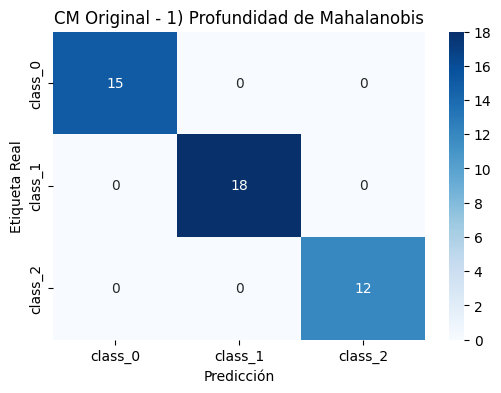

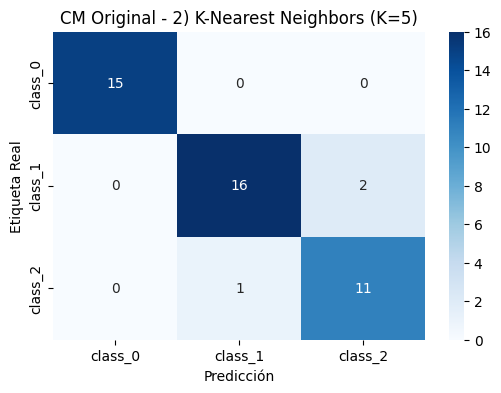

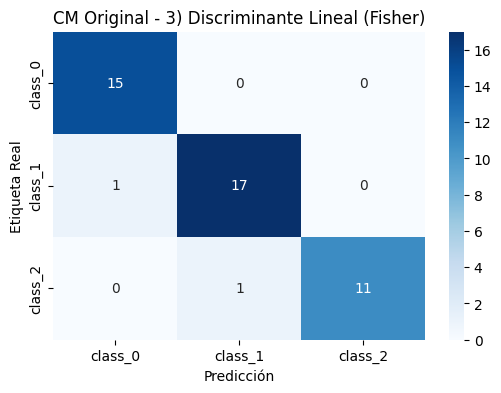

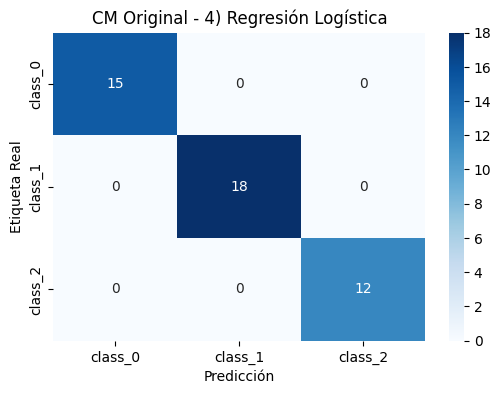

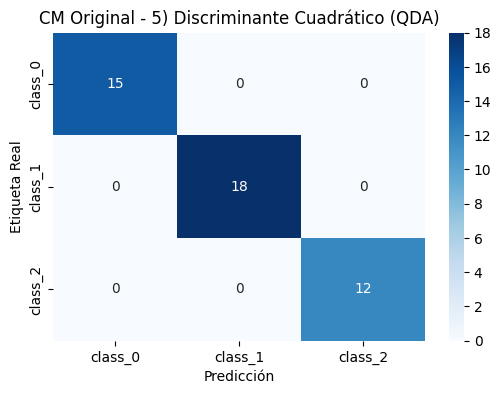


PARTE D: ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
Tabla de Varianza Explicada por Componente:


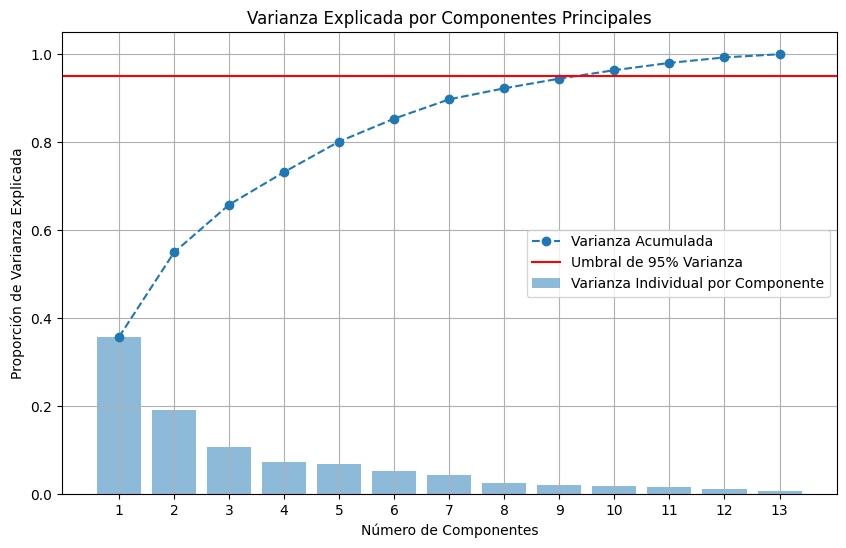


Se eligen 10 componentes para retener al menos el 95% de la varianza.
--------------------------------------------------------------------------------
EVALUACIÓN SOBRE DATOS REDUCIDOS CON PCA


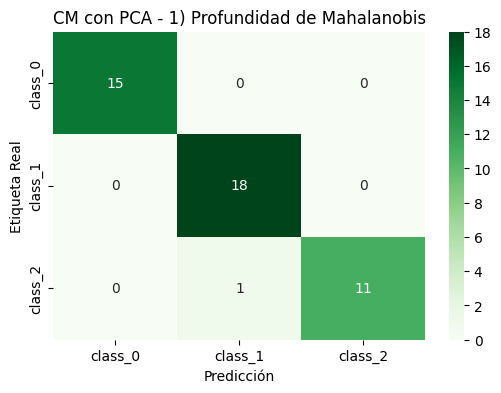

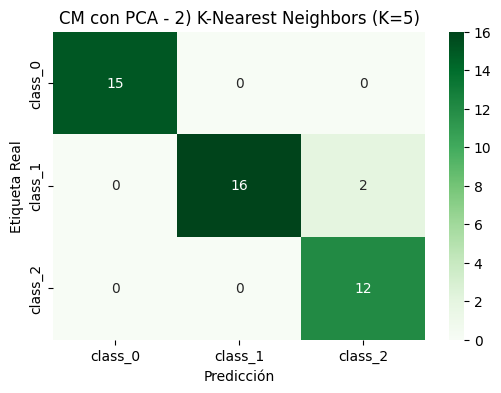

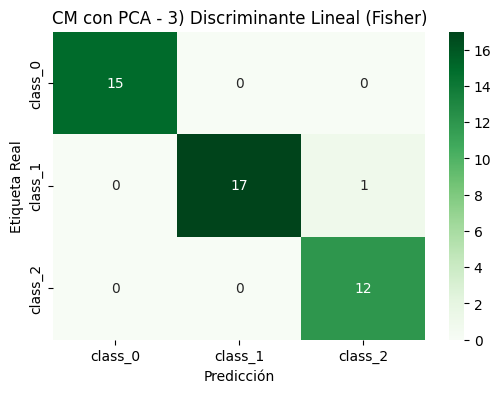

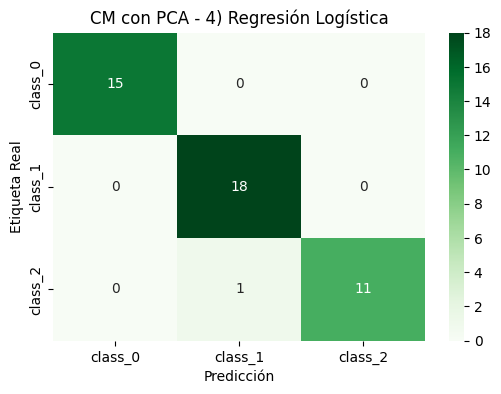

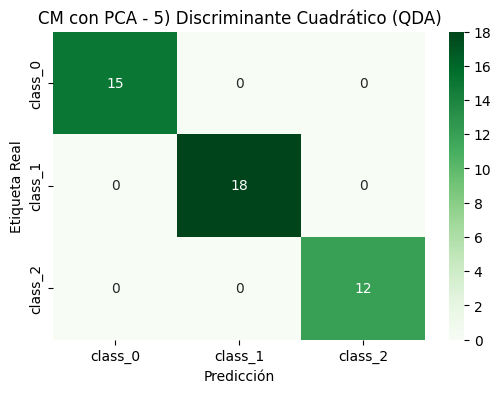


TABLA RESUMEN DE RENDIMIENTO DE CLASIFICADORES
Dimensiones Originales: 13 características
Dimensiones tras PCA (retención >= 95%): 10 componentes
--------------------------------------------------------------------------------


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

# Importar los modelos de clasificación estándar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# --- IMPLEMENTACIÓN DEL CLASIFICADOR DE PROFUNDIDAD DE MAHALANOBIS ---
class MahalanobisDepthClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = {}
        self.inv_covs_ = {}
        for c in self.classes_:
            X_c = X[y == c]
            self.means_[c] = np.mean(X_c, axis=0)
            cov = np.cov(X_c, rowvar=False)
            self.inv_covs_[c] = np.linalg.pinv(cov)
        return self

    def predict(self, X):
        dists = []
        for sample in X:
            mahal_dists = [(sample - self.means_[c]).T @ self.inv_covs_[c] @ (sample - self.means_[c]) for c in self.classes_]
            dists.append(mahal_dists)
        return self.classes_[np.argmin(dists, axis=1)]

# --- Configuración Inicial ---
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Definición de modelos y almacenamiento de resultados ---
classifiers = {
    "1) Profundidad de Mahalanobis": MahalanobisDepthClassifier(),
    "2) K-Nearest Neighbors (K=5)": KNeighborsClassifier(n_neighbors=5),
    "3) Discriminante Lineal (Fisher)": LinearDiscriminantAnalysis(),
    "4) Regresión Logística": LogisticRegression(random_state=42, max_iter=2000),
    "5) Discriminante Cuadrático (QDA)": QuadraticDiscriminantAnalysis()
}

results_summary = {}
num_test_samples = len(y_test)

# --- c. Clasificación en datos originales ---
print("\nPARTE C: EVALUACIÓN SOBRE DATOS ORIGINALES (ESCALADOS)")
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    errors = (1 - accuracy) * num_test_samples
    
    # Almacenar resultados
    results_summary[name] = {
        'Precisión (Original)': accuracy,
        'Errores (Original)': int(round(errors))
    }
    
    # CORRECCIÓN: Mostrar la matriz de confusión para la Parte C
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'CM Original - {name}')
    plt.xlabel('Predicción'); plt.ylabel('Etiqueta Real')
    plt.show()

# --- d. Análisis PCA y Clasificación ---
print("\n" + "=" * 80)
print("PARTE D: ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")
print("=" * 80)

# 1. Aplicar PCA para analizar todos los componentes
pca_analyzer = PCA(n_components=None)
pca_analyzer.fit(X_train_scaled)
explained_variance = pca_analyzer.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 2. Crear tabla de varianza explicada
pca_variance_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Varianza Individual': explained_variance,
    'Varianza Acumulada': cumulative_variance
})
print("Tabla de Varianza Explicada por Componente:")
display(pca_variance_df.style.format({
    'Varianza Individual': '{:.2%}',
    'Varianza Acumulada': '{:.2%}'
}).bar(subset=['Varianza Individual'], color='#5dade2').bar(subset=['Varianza Acumulada'], color='#d6b656'))

# 3. Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Varianza Acumulada')
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Varianza Individual por Componente')
plt.axhline(y=0.95, color='r', linestyle='-', label='Umbral de 95% Varianza')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 4. Seleccionar número de componentes y transformar datos
n_components_chosen = np.where(cumulative_variance >= 0.95)[0][0] + 1
original_dims = X_train_scaled.shape[1]
print(f"\nSe eligen {n_components_chosen} componentes para retener al menos el 95% de la varianza.")
print("-" * 80)

pca = PCA(n_components=n_components_chosen)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 5. Evaluar modelos con datos reducidos por PCA
print("EVALUACIÓN SOBRE DATOS REDUCIDOS CON PCA")
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_pred_pca = clf.predict(X_test_pca)
    
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    errors_pca = (1 - accuracy_pca) * num_test_samples

    # Actualizar el diccionario con los resultados de PCA
    results_summary[name]['Precisión (PCA)'] = accuracy_pca
    results_summary[name]['Errores (PCA)'] = int(round(errors_pca))
    
    # Mostrar matriz de confusión para la Parte D
    cm_pca = confusion_matrix(y_test, y_pred_pca)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'CM con PCA - {name}')
    plt.xlabel('Predicción'); plt.ylabel('Etiqueta Real')
    plt.show()

# --- TABLA RESUMEN FINAL ---
print("\n" + "=" * 80)
print("TABLA RESUMEN DE RENDIMIENTO DE CLASIFICADORES")
print("=" * 80)
print(f"Dimensiones Originales: {original_dims} características")
print(f"Dimensiones tras PCA (retención >= 95%): {n_components_chosen} componentes")
print("-" * 80)

# Crear y mostrar el DataFrame de pandas
summary_df = pd.DataFrame.from_dict(results_summary, orient='index')

# Formatear el DataFrame para mejor legibilidad
summary_df_styled = summary_df.style.format({
    'Precisión (Original)': '{:.3f}',
    'Precisión (PCA)': '{:.3f}'
}).background_gradient(
    cmap='viridis',
    subset=['Precisión (Original)', 'Precisión (PCA)']
).highlight_min(
    color='lightcoral',
    subset=['Errores (Original)', 'Errores (PCA)']
)

display(summary_df_styled)